# DATASCI 267 - GenAI - Assignment 5

### Overview

In Assignment 5 you will create and test a RAG system yourself as a proof of concept and then write a corresponding business report on your findings.

The overall scenario is as follows:

You work at a tech company that is looking for new ways to organize their question answering and search capabilities to accelerate both engineering activity and the marketing team's production. The company also wants to roll out new GenAI-based products, so a lot of the questions will center around Generative AI concepts. The company has about 300 engineers and a marketing staff of 40. Product releases are done quarterly.

Your role is to implement and conduct a (mini-)POC helping the company to evaluate RAG capabilities for the improvement of their document search (and corresponding question answering), supporting both the engineering and marketing organizations. You will have a gold dataset with 'good' responses to questions from marketing and engineering teams. You need to develop metric(s) that help you to evaluate how well your RAG system performs relative to the gold data. You should work with the tunable hyperparameters of the setup (LLM, chunking, embeddings, ...) for your iterations.

You will also need to write up your findings as a short 4-5 page proposal.

(See instructions throughout this notebook.)

So overall, the goals of this assignment are for you to:

*  Implement a RAG system using LangChain
*  Be able to formulate metric(s) that you may want to choose as your evaluation to what degree your system replicates gold answers (labeled data) that we will provide.
* Try out various hyper-parameters and settings to see which configuration works the best (given your chosen metric)  
* Write a comprehensive evaluation, which also includes risks and limitations (and a lot more)

The notebook is organized as follows:

1. Set-Up

2. Base RAG components

    We will provide a base LangChain-based framework for you to use for your RAG system. The components we’ll need include:  

  - 2.1 Text Embeddings    
  - 2.2 Text Chunking   
  - 2.3 The Vector DB & Semantic Search  
  - 2.4 The Language Model   
  - 2.5 Testing the LLM in a LangChain Chain   
  - 2.6. Setting up a simple RAG Chain     


3. Using RAG  

    We will provide a collection of documents for you to use for your RAG system. We will also provide a test of questions with "Gold" answers.  

  - 3.1 Loading of Data  
  - 3.2 Test Queries
  - 3.3 Running Your Implemented Model(s) and Your Experiments


4.  Evaluations

    Here, you will develop and conduct your evaluations

  - 4.1 Metrics
  - 4.2 Best Runs with Metrics


5. Final Results

    In this section, you will answer some questions and provide a link to your final report

  - 5.1 Model Specifications
  - 5.2 Three Test Questions (and Results)
  - 5.3 Five Other Questions
  - 5.4 Link To Your 4-5 Page Final POC Report and Recommendation

RULES:  

* You can only use the language models we specify here  
* You can only use the embedding models we specify here
* You must use the vector store we specify here
* You can only use the document collection we provide. And they all must be in your vector store.   
* Apart from the provided specifications, you are free to experiment with a wide variety of hyperparameters (chunk sizes, prompts, etc.), langchain components (text splitters, retrievers, etc.)


**To run this notebook** you should copy it to your personal Colab Pro Google account by uploading it into your Google Drive. From there you can open it as a Colab notebook and run it.  Note: it needs a T4 GPU to run when you are working with all our data.  You can run sections 1 and 2 without the GPU to orient yourself to how LangChain RAG systems work. You should also be able to run it in a free Colab notebook.

NOTES:
* The Open Source Model we use is not trained for safety. So unsafe answers could be returned.


**You are very strongly encouraged to read ALL of the directions and questions before your write ANY code.**




===========================================================================================================

# Final Assignment Detailed Guidelines

## Introduction

You will complete a final assignment that represents a significant implementation and/or application of Gen AI techniques. Here’s what to expect:

- You must work on this assignment alone.  There is NO group work.  
- We will provide a notebook with some partially working systems  
- We will provide a scenario for the system and its users  
- We will provide a set of documents that you must use in the system  
- You cannot add any additional documents to the collection  
- We will provide a set of validation question/answer pairs

Overall, the goals of this assignment are for you to:

* Implement a RAG system using LangChain and the LLMs we specify. You can extend starter architecture that we provide a bit to address some of the common failure points in RAG deployments. (See Week 9 Live slides page 34, or “Seven Failure Points When Engineering a Retrieval Augmented Generation System”, [https://arxiv.org/pdf/2401.05856](https://arxiv.org/pdf/2401.05856); page 3\)  
* Please stay within the boundaries of LangChain, the LLMs, the embedding models, and the vector database we specify. (The focus of a PoC, which this assignment aims to emulate, would be to test established approaches, not to try completely novel ones.)  
* Be able to quantitatively evaluate the performance of your model(s)  
* Be able to formulate metric(s) \- that you choose\! \- as you evaluate to what degree your system replicates gold answers (labeled data) that we will provide.  
* Try out various hyper-parameters and settings to see which configuration works the best (given your chosen metric(s)). **Do NOT try a grid search**. (It is much more important to develop an intuition as to which parameters matter in which way.)  
* Write a comprehensive evaluation (‘the report’, see ReportOutline we posted to Ed Discussion), which also includes risks and limitations and a lot more. The audience of this evaluation/report are the stakeholders of the PoC, who would make the decision to go ahead with the RAG implementation or not.

RULES:

* You can only use the language models specified here (Mistral and Cohere) as the LLM in your chain.  You may use Llama 3.1 or 3.2 or Qwen 2 or Gemma 2 in other capacities.  
* You can only use the embedding models we specify from the Sentence Transformers library.
* You can only use the documents we provide. And they all must be retrievable from your vector store (which we will specify)  
* If you use less than the 75 gold answers we supply, you must justify your subset \- how and why did you pick them? Apart from the provided specifications, some of the things you can freely experiment with include prompts, chunk sizes, LLM hyperparameters, architecture, etc.  
*You must however provide one run on all 75 examples for your best models/model configuration (along with the corresponding metrics, of course.)

As context, the overall scenario for this assignment is as follows:

You work at a tech company that is looking for new ways to organize their search and question answering capabilities to accelerate both engineering activity and the product/marketing teams. The company also wants to roll out new GenAI-based products, so a lot of the questions will center around Generative AI and LLM concepts. The company has about 300 engineers and a marketing staff of 40\. Product releases are done quarterly.

Your role is to implement and conduct a (mini-)POC helping the company to evaluate RAG capabilities for the improvement of their document search (and corresponding question answering), supporting particularly the engineering and marketing organizations. You will receive a gold dataset with 'good' responses to questions from marketing and engineering teams. You need to develop a plan that helps you complete a RAG system within the constraints of the POC. Your answers must work for each of the two groups of users \-- engineers and marketing managers. You will need to develop a plan to evaluate how well your RAG system performs relative to the gold data we provide. You will need to decide which metrics you want to combine to effectively measure how well your model is working.  You will need to experiment with the tunable hyperparameters of the setup (LLM, chunking, embeddings, ...) for your iterations.

You will need to write up your findings as a 4 page report following the outline we provide in our post to Ed Discussion.

(Also see instructions throughout the notebook.)

NOTES:

* The Open Source Language Model is not trained for safety. So unsafe answers could be returned.

## Cohere

If you do not already have a Cohere account, you will need to create one in order to get an API key.  You will not be able to complete the assignment without it.  Go to [cohere.com](https://dashboard.cohere.com).  Sign up for an account using your personal email address **NOT** your @berkeley.edu email account. Once you have signed up, login to your account and go to the dashboard.  Over in the left hand nav bar is an item 'API Keys.' Click on it and you will see an area on screen called Trial Keys.  You will need to create a "new trial key" for yourself. When you have that trial key, copy it and store a copy somewhere you can retrieve it (never in the open in a notebook).  You'll need to enter that key as a secret in the Google notebook associated with `COHERE_API_KEY.`  (See the ‘Secrets’ icon in the colab again, **DO NOT PRINT IT OUT IN THE NOTEBOOK\!**)

Cohere’s Trial Key is free.  However, be aware of the constraints and use the resource wisely.  Check the [limits on use of the API.](https://docs.cohere.com/docs/rate-limits)  You are responsible for staying within those limits. For example, the Trial Key permits only 1,000 API calls per month. Use this resource wisely. You need to either plan for their constraints,  or you can pay to upgrade your key.

## Assignment Grading

The final grade for this assignment consists of the following components:

- \[20%\] Implementation and Architecture of Model  
    
- \[15%\] Poor Man’s Evaluation Strategy  
    
- \[20%\] Experimentation  
    
- \[03%\] Three Specific Queries Test  
    
- \[05%\] Five Additional Questions  
    
- \[37%\] POC Report

### Our Expectations of You

As a student in a graduate level course, you are responsible for seeking out help when your project is stuck.  There is significant support available if you seek it out.  Do not wait for us to provide feedback on deliverables to take action.  

### Rubric Dimensions

Each of the following dimensions will be considered while grading.  An assignment significantly lacking in any dimension will receive a considerably lower grade.  Each dimension is illustrated by several bullet points.

Implementation and Architecture of Model (20%):

- A clearly functioning model that is able to address the problem you are trying to solve  (which should be the one we were giving...).

Poor Man’s Evaluation Strategy (15%):

- Suitability and thoughtfulness of your approach to the problem.  
- "How will I know when my project is successful?", usually in the form of an evaluation metric.  
- suitability of the metrics are you using, and how you combine them

Experimentation (20%):

- How many of the possible tuning parameters did you use?  
- How meaningful were the various run comparisons?  
- How much analysis did you do to drive your experimentation?

Three Specific Questions (03%):

- How well do your answers score against our gold ones?  
- More importantly, how reasonable are your assessments?

Five Additional Questions (05%):

- How thoughtful and incisive are your answers to these implementation questions?

POC Report (37%):

- Primarily:  
  - Succinct, interesting presentation explaining the above.  
  - Is your report well organized?  
  - Suitability of the report to guide the organization to a decision  
  - Suitability of the report to articulate the limitations and opportunities of the RAG approach for the orgaization  
- Table stakes:  
  - Did you run a spell check before submitting?  
  - Did you proofread it?

## Final Submission

This will be a final report on your POC following the outline we provide in our post on Ed Discussion. Aim for 4-5 pages in length with the following sections:

- **Executive Summary** (Quick summary of your report)  
- **Introduction** (overall system description)  
- **Key Findings** (five key findings)  
- **Methodology** (implementation and evaluation approach)  
- **Results and Findings** (challenges and limitations)

Please save your report as a PDF file in your Berkeley Google Drive, put a link at the end of this notebook and then submit your notebook (*complete with outputs of running*) to Gradescope.  There is no autograder on this assignment.

**And remember: for many aspects there is no right or wrong answer\! Most important are reasonable, clearly-thought-out approaches\!**

# LLM Usage Clarification in A5

PLEASE READ THESE DIRECTIONS CAREFULLY

We want to clarify the boundaries for using LLMs (commercial and open source) in your completion of a5.  Beyond the obvious use of the Mistral and Cohere LLMs as the question answering portion of your RAG pipeline, you may use an LLM to assist in certain portions of the assignment.  For example, you may use an LLM to assist with re-writing portions of your report if you wish.  We would discourage you from using the LLM to write code.

**You MUST NOT:**

* You must **NOT** use an LLM to answer any questions we posed. For example, do not use it to answer the questions in sections 4 or 5 of the notebook.

* You must **NOT** use the LLM to generate the initial draft of your final report.

*  You must **NOT** use the LLM to generate or assist with your metrics justification

**You CAN:**

* You can use an LLM to help you with the report writing as far as formulations and phrasing go, but obviously not to construct core content.

* You should turn off the use of your input to help with training commercial LLMs.  For example, in OpenAI’s ChatGPT you can go to Settings in your account and then Data Controls and then make sure that ‘Improve the model for everyone’ is set to off.

**You MUST:**

* You **must** tell us that you have used an LLM by specifying which model(s) you used, how you used the model, and which portion of your output it helped to generate.  You can include this in the references section and put citations into the body of yor final report.

## 1. Setup

We will first install a number of libraries and import what we will need.





In [ ]:
%%capture
!pip -q install git+https://github.com/huggingface/transformers
!pip install -q datasets loralib sentencepiece
!pip -q install bitsandbytes accelerate
!pip -q install langchain
!pip install einops
!pip install faiss-gpu
!pip install langchain_community
!pip install --upgrade --quiet chromadb bs4 qdrant-client
!pip install langchainhub
!pip install -U langchain-huggingface
!pip install -U langchain-cohere
!pip install --upgrade --quiet  wikipedia
!pip install --upgrade --quiet  arxiv
!pip install --upgrade --quiet  pymupdf

!pip install xmltodict

!pip install cohere


In [ ]:
import torch
import os
import bs4
import json
import numpy as np
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
from pprint import pprint

import locale

from transformers import AutoTokenizer , AutoModelForCausalLM
from transformers import pipeline, BitsAndBytesConfig
from langchain_huggingface import HuggingFacePipeline
from langchain.llms import HuggingFacePipeline
from langchain_cohere import ChatCohere
from langchain import PromptTemplate, LLMChain
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_core.output_parsers import StrOutputParser
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores import Qdrant
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.utils.math import cosine_similarity

from langchain_community.document_loaders import ArxivLoader
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import OnlinePDFLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import PubMedLoader

#from langchain_community.chat_models import ChatCohere

from google.colab import userdata

In [ ]:
import langchain
print(langchain.__version__)

0.3.21


In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%%capture
!pip install sentence_transformers

Add your keys from the secret store (do **NOT** print them out or leave them exposed as plaintext in your notebook!):

In [ ]:
COHERE_API_KEY = userdata.get('COHERE_API_KEY')

In [ ]:
from huggingface_hub import login
login()

In [ ]:
# So I can save my answer results
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/My Drive/267_a5/"

## 2. Building the Components of our RAG System

Let us introduce and test the base components of our RAG system. We will largely use the Hugging Face and LangChain libraries.



### 2.1 The Embedding Model

We will need to represent text (pieces) as vectors. For this, we will use the [sentence_transformer](https://sbert.net/docs/sentence_transformer/pretrained_models.html) architecture.



**NOTE:** The models you can use are: 'all-mpnet-base-v2', 'all-MiniLM-L6-v2', 'multi-qa-mpnet-base-dot-v1', 'all-distilroberta-v1', and 'multi-qa-mpnet-base-cos-v1'



In [ ]:
%%capture
base_embeddings = HuggingFaceEmbeddings(model_name="multi-qa-mpnet-base-dot-v1")

In [ ]:
text = "This is a test document."
query_result = base_embeddings.embed_query(text)
print(f'Embedding dimension: {len(query_result)}')

doc_result = base_embeddings.embed_documents(["Germany won the World Cup 4 times.", "This is not a test document."])
len(doc_result)

Embedding dimension: 768


2

Do those dimensions look correct?

Now lets see if the embedding model is working as we want.  Ideally our embeddings go beyond shared words and capture the underlying meaning.

In [ ]:
#Let's see how well our embeddng model works
similarity = cosine_similarity([query_result], doc_result)[0]

similarity

array([0.21410192, 0.94317827])

That's how you should define your embedding models.

Next, we turn to text chunks.

### 2.2. Loading and Chunking Texts

We first need to load the documents. Here is an example:

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)

documents = loader.load()

We will need to split the  text in chunks that are 'suitable' as retrieval units. Let's for starters define a chunk size of 128 and have no overlap between the chunks:  


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=128, chunk_overlap=0)
splits = text_splitter.split_documents(documents)
print('Number of splits/chunks: ', str(len(splits)))

Number of splits/chunks:  444


Ok, so it looks like we have now many splits (chunks) from one document. Here is how you can get the content:

In [ ]:
splits[39].page_content

'correcting previous mistakes. It plays a crucial role in real-world tasks where trial and error are inevitable.'

Perfect. Now we have the splits and embeddings. Next, the embeddings need to be stored in a vector db.

### 2.3 Storing the Embeddings of Chunks in Vectorstores

After loading and chunking the data, we need to save the vector representations of the chunks in a vectorstore. We will use Qdrant here for simplicity. We load the splits (structured chunks) and the embeddings:

In [ ]:
vectorstore = Qdrant.from_documents(splits,
    base_embeddings,
    location=":memory:",  # Local mode with in-memory storage only
    collection_name="test",
)
retriever = vectorstore.as_retriever()

The nice thing is that the vector store also does the similarity searches for us:

In [ ]:
query = "What is Chain of Thought doing?"
docs = vectorstore.similarity_search_by_vector(base_embeddings.embed_query(query)) # will rank the splits

In [ ]:
docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', '_id': '88295404fa6d4a2aada4ca8b53c3aaa0', '_collection_name': 'test'}, page_content='the model’s thinking process.'),
 Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', '_id': '6dc710de6e384d709f0bc567c1be2c47', '_collection_name': 'test'}, page_content='[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022'),
 Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', '_id': '4ee8dd0cf4a34df78524af1065446000', '_collection_name': 'test'}, page_content='the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process'),
 Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', '_id': 'ccb6b31875ab427cb9a9e834f81ecc3d', '_collection_name': 'test'}, page_content='Chain of thought (CoT; Wei et al. 2022) has 

Looks good! We have an ordered list of documents that seem to relate to the question. That is what we need.

The last major component is the actual LLM.

### 2.4. The LLM

We will use one Open Source Model ("mistralai/Mistral-7B-Instruct-v0.2") and one Proprietery Model (Cohere) for our tests. Let's first set up the OS model:

In [ ]:
%%capture

quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         )


llm_mistral_model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    torch_dtype=torch.float32,
    device_map='auto',
    quantization_config=quantization_config
)

llm_mistral_tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

We use the model first to generate a Hugging Face pipeline. A pipeline simplifies the process of actually generating responses.

In [ ]:
mistral_pipe = pipeline(
    "text-generation",
    model=llm_mistral_model,
    tokenizer=llm_mistral_tokenizer,
    max_new_tokens=1000,
    temperature=0.6,
    top_p=0.95,
    do_sample=True,
    repetition_penalty=1.2
)
mistral_pipe.model.config.pad_token_id = mistral_pipe.model.config.eos_token_id

    # wrapping the Hugging Face pipeline into a LangChain object

Device set to use cuda:0


Does it work?

In [ ]:
mistral_pipe("[INST]Give me a two-sentence story about an apple![/INST]")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[{'generated_text': '[INST]Give me a two-sentence story about an apple![/INST]Once upon a time in an enchanted orchard, an ethereal golden apple hung from its tree, granting eternal youth and happiness to the one who tasted it. A brave hero ventured through perilous lands, overcoming trials and tribulations, finally earning the right to claim the magical fruit as his own reward.'}]

Reasonable!

We will also use a Cohere model, but will create this below as part of the LangChain framework.

### 2.5 Testing the LLM in a LangChain Chain

Chains will be defined and discussed in Week 10. In short, they are convenient programmatic ways to deal with 'chains' of actions that involve LLMs. For example, a list of events like 'here is a city name. Plug that city name into prompt template, then generate a story about that city. Lastly, format the model output as a string' can be easily handled by LangChain's Chain framework. In this case, the Chain would consist of the prompt template, the LLM, and the String Formatter. The parameter (the city in this case) will be provided at run time by invocation of the Chain. Let's test that.

To use a Hugging Face model in a LangChain environment, we need to wrap the model into a LangChain pipeline object:

In [ ]:
mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)

<ipython-input-30-5bb94d77f995>:1: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)


Next, we need to define a template and create a corresponding prompt template that can take any questiion

In [ ]:
test_llm_template = """[INST] Give me a two-sentence story about an {object}! [/INST]"""
test_llm_prompt_template = PromptTemplate(template=test_llm_template, input_variables=["object"])



Let's define a Chain, a static flow of actions that (usually) involve at least a definition of the variables used in the chain, one or more templates, LLM step(s) and potentially other actions. This would be a chain that declares the variable 'object' to be expected when the chain is invoked, then inserts it into the template, and passes this to our mistral model pipeline (wrapped as a LangChain object):    

In [ ]:
test_llm_chain_short = (
    {"object": RunnablePassthrough()}
    | test_llm_prompt_template
    | mistral_llm_lc
)

In [ ]:
test_llm_chain_short.invoke('apple')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'[INST] Give me a two-sentence story about an apple! [/INST] In the heart of an enchanted orchard, a solitary red apple hung from its tree, shimmering with magical properties; as a young shepherd boy reached up to claim it, the world around him transformed into a realm of wonder and possibility.'

Works too. We will use this notation moving forward.

Next, how would we do this with a Cohere Chat Model instead of Mistral?

In [ ]:
cohere_chat_model = ChatCohere(cohere_api_key=COHERE_API_KEY)

This can be plugged straight into the Chain:

In [ ]:
test_cohere_llm_chain_short = (
    {"object": RunnablePassthrough()}
    | test_llm_prompt_template
    | cohere_chat_model
)

In [ ]:
test_cohere_llm_chain_short.invoke('apple')

AIMessage(content="A curious squirrel discovered a shiny red apple hanging from a branch, its sweet scent tempting him to take a bite. As he nibbled, the apple's crisp flesh revealed a hidden message, whispering secrets of the orchard's ancient magic.", additional_kwargs={'id': 'd654eb7d-6aa0-4dc0-b04d-c0419919bf05', 'finish_reason': 'COMPLETE', 'content': "A curious squirrel discovered a shiny red apple hanging from a branch, its sweet scent tempting him to take a bite. As he nibbled, the apple's crisp flesh revealed a hidden message, whispering secrets of the orchard's ancient magic.", 'token_count': {'input_tokens': 512.0, 'output_tokens': 50.0}}, response_metadata={'id': 'd654eb7d-6aa0-4dc0-b04d-c0419919bf05', 'finish_reason': 'COMPLETE', 'content': "A curious squirrel discovered a shiny red apple hanging from a branch, its sweet scent tempting him to take a bite. As he nibbled, the apple's crisp flesh revealed a hidden message, whispering secrets of the orchard's ancient magic.", 

Works! (Note: you may want to review the format of the template. The one we used here is the one from Mistral, and the format may or may not be optimal for Cohere.)

How can we get the output formatting under control? We can add a String Formatter to the chain:


In [ ]:
output_parser = StrOutputParser()

test_cohere_llm_chain_short_formatted = (
    {"object": RunnablePassthrough()}
    | test_llm_prompt_template
    | cohere_chat_model
    | output_parser
)

test_cohere_llm_chain_short_formatted.invoke('apple')

'A curious squirrel discovered a shiny red apple hanging from a branch, its sweet scent tempting him to take a leap. With a swift jump, he claimed the fruit, savoring its crisp flesh as the autumn sun warmed his fur.'

### 2.6 Setting Up a Simple RAG Chain

For RAG, we will follow the same approach. Except... you will **later** need to change the chain to include the retrieval step.

We first do a simple test: create a RAG template that takes a question and a pre-defined context as input, and generates the answer based on the provided context:

In [ ]:
rag_template = """[INST] Answer the question based only on the following context:
{context}

Question: {question}
[/INST]
"""
rag_prompt_template = ChatPromptTemplate.from_template(rag_template)

base_rag_chain =(
    {"context": RunnablePassthrough(),
     "question": RunnablePassthrough()}
    | rag_prompt_template
    | mistral_llm_lc
    | output_parser
)

predefined_context = "Germany has won the World Cup 4 times."
question = "How many times did Germany win the world cup?"

resp = base_rag_chain.invoke({'context': predefined_context,
                           'question': question})
print(resp)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Human: [INST] Answer the question based only on the following context:
{'context': 'Germany has won the World Cup 4 times.', 'question': 'How many times did Germany win the world cup?'}

Question: {'context': 'Germany has won the World Cup 4 times.', 'question': 'How many times did Germany win the world cup?'}
[/INST]
Answer: The answer to your question is consistent with the provided context. According to the context, Germany has won the World Cup a total of 4 times.


That's great. But of course, the context needs to be created in an earlier retrieval step. More precisely, the documents will be first retrieved as a list, and then they will need to be formatted into one string to pass to the LLM in the context window.

Here is a simple formatting function that can be hooked into the chain, which combines a list of chunks into one string:



In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

So how could we build a simple chain? Let's first just get the retrieval done and the formatted retrieved data and the question inserted into the prompt template:

In [ ]:
rag_template = """Here is a context:\n{context} \n\nand here is a question: \n{question}"""

rag_prompt = ChatPromptTemplate.from_template(rag_template)

rag_chain = (
    {"context": retriever | format_docs,
     "question": RunnablePassthrough()}
    | rag_prompt


)

In [ ]:
output = rag_chain.invoke('What is Chain of Thought?')

Ok... with some formatting... this looks good:

In [ ]:
print(output.messages[0].content)

Here is a context:
the model’s thinking process.

[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022

the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process

Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes 

and here is a question: 
What is Chain of Thought?


Let's complete the RAG Chain:

In [ ]:
output_parser = StrOutputParser()

rag_template = """[INST]Please answer the question below only based on the context information provided.\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.[/INST]"""
rag_prompt = ChatPromptTemplate.from_template(rag_template)

rag_chain = (
    {"context": retriever | format_docs,
     "question": RunnablePassthrough()}
    | rag_prompt
    | mistral_llm_lc

)



In [ ]:
rag_chain.invoke('What is Chain of Thought?')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Human: [INST]Please answer the question below only based on the context information provided.\n\nHere is a context:\nthe model’s thinking process.\n\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n\nthe problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process\n\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes \n\nHere is a question: \nWhat is Chain of Thought?.[/INST] Based on the context you\'ve provided, "Chain of Thought" (CoT) refers to a method or framework proposed by Wei et al. in their 2022 NeurIPS paper for eliciting reasoning from large language models. This approach turns complex problems into smaller ones by breaking them down into multiple thought steps. Each step results in multiple possible thoughts, forming a tree-like structure that represents the different lines of reas

What about the Cohere models?

In [ ]:
cohere_rag_chain = (
    {"context": retriever | format_docs,
     "question": RunnablePassthrough()}
    | rag_prompt
    | cohere_chat_model
    | output_parser
)

In [ ]:
cohere_rag_chain.invoke('What is Chain of Thought?')

AIMessage(content='Based on the provided context, **Chain of Thought (CoT)** is a technique developed to help Large Language Models (LLMs) handle multi-step reasoning tasks, such as arithmetic. It involves a process where the model generates a sequence of thoughts (or reasoning steps) and then revises each thought step by retrieving knowledge from an external knowledge base.', additional_kwargs={'id': 'aeb04dc7-fb38-4164-9088-014ddd66ce8b', 'finish_reason': 'COMPLETE', 'content': 'Based on the provided context, **Chain of Thought (CoT)** is a technique developed to help Large Language Models (LLMs) handle multi-step reasoning tasks, such as arithmetic. It involves a process where the model generates a sequence of thoughts (or reasoning steps) and then revises each thought step by retrieving knowledge from an external knowledge base.', 'token_count': {'input_tokens': 626.0, 'output_tokens': 73.0}}, response_metadata={'id': 'aeb04dc7-fb38-4164-9088-014ddd66ce8b', 'finish_reason': 'COMPLE

Works too! Time to build the real thing and do experimentation.

## 3. The RAG Model & Experimentation

With this we can get started. First, we need to acquire the data, chunk it, vectorize it, and store the embeddings (and in this simple case also the docs) in our Qdrant vector db.


### 3.1 The Vector Database

We will start by creating our datastore, Qdrant. Usually, you would deploy the vector db as a server, but in this case let's simply put everything in memory. Also, in this case we will store not only the embeddings but the whole document in the vector store. We will seed the store with the splits from the blog post we had used before.

We will also create the retriever, which defines the way the documents are being retrieved. The retriever parameters define for example which method is used, how many docs are retrieved, etc. See [this LangChain link ](https://python.langchain.com/docs/modules/data_connection/retrievers/vectorstore)for more information.


In [ ]:
qdrant_vectorstore = Qdrant.from_documents(splits,
    base_embeddings,
    location=":memory:",  # Local mode with in-memory storage only
    collection_name="rag_tech_db",
    force_recreate=True
)

retriever = qdrant_vectorstore.as_retriever()

### 3.2 Data Acquisition, Chunking, and Vectorization

Now where we have our store we need to get the data into it. We will need to retrieve the data, create the chunks, then vectorize them, and finally store the vectors (along with the docs in this case) in the vector db.

Let us first set chunk size and overlap, as well as the type of splitter. These are starting parameters and you may want to experiment with them:

In [ ]:
#Note that these defaults may or may not be ideal!
CHUNK_SIZE=128
OVERLAP=0

text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=OVERLAP)

Now let's work with an actual document collection.  We will work with four types of documents:

* A few papers from the ArXiv on RAG and NLP
* A few blogs from Lily Weng that talk about Open Domain Question Answering and related topics
* A number of Wikipedia articles on that topic

To make testing easier  we'll define a global record number so we can trace back to see which chunk came from which specific document.


In [ ]:
#assign a unique number to each document we ingest
global_doc_number = 1

First we'll grab some papers from ArXiv.  We'll grab the pdf files and get all of the pages as separate documents.

In [ ]:
arxiv_numbers = ('2005.11401', '2104.07567', '2104.09864', '2105.03011', '2106.09685', '2203.02155', '2211.09260', '2211.12561',
                 '2212.09741', '2305.14314', '2305.18290', '2306.15595', '2309.08872', '2309.15217', '2310.06825', '2310.11511',
                 '2311.08377', '2312.05708', '2401.06532', '2401.17268', '2402.01306', '2402.19473', '2406.04744',
                 '2312.10997', '2410.12812', '2410.15944', '2404.00657',
                 )

In [ ]:
all_arxiv_pages = []

#loop through the papers
for identifier in arxiv_numbers:
    # Construct URL using the arXiv unique identifier
    arx_url = f"https://arxiv.org/pdf/{identifier}.pdf"

    # Extract pages from the document and add them to the list of pages
    arx_loader = PyMuPDFLoader(arx_url)
    arx_pages = arx_loader.load()
    for page_num in range(len(arx_pages)):
        page = arx_pages[page_num]
        #CHANGED
        page.metadata['page_num'] = page_num
        page.metadata['doc_num'] = global_doc_number
        page.metadata['doc_source'] = "ArXiv"
        all_arxiv_pages.append(page)


    global_doc_number += 1

How many docs did we get?  Is that the correct number? And what is the content?

In [ ]:
num_pages = len(all_arxiv_pages)
num_docs = global_doc_number - 1

print(f"{num_docs} documents in total")
print(f"{num_pages} pages in total")

## Expecting 27 documents

27 documents in total
562 pages in total


In [ ]:
all_arxiv_pages[5].page_content[:150]  # all pages of the Document content

'Table 1: Open-Domain QA Test Scores. For TQA,\nleft column uses the standard test set for Open-\nDomain QA, right column uses the TQA-Wiki\ntest set. See'

Now we need to split the docs into chunks.  LangChain provides a couple of ways to do that.  We'll use for now the `RecursiveCharacterTextSplitter`.

In [ ]:
#index doc chunks
splits = text_splitter.split_documents(all_arxiv_pages)
for idx, text in enumerate(splits):
    splits[idx].metadata['split_id'] = idx

print('Number of splits/chunks: ', len(splits))

Number of splits/chunks:  20314


In [ ]:
splits[0]

Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2021-04-13T00:48:38+00:00', 'source': 'https://arxiv.org/pdf/2005.11401.pdf', 'file_path': 'https://arxiv.org/pdf/2005.11401.pdf', 'total_pages': 19, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2021-04-13T00:48:38+00:00', 'trapped': '', 'modDate': 'D:20210413004838Z', 'creationDate': 'D:20210413004838Z', 'page': 0, 'page_num': 0, 'doc_num': 1, 'doc_source': 'ArXiv', 'split_id': 0}, page_content='Retrieval-Augmented Generation for\nKnowledge-Intensive NLP Tasks\nPatrick Lewis†‡, Ethan Perez⋆,')

Let's add the vectors to the datastore and see whether we can retrieve a nearest neighbor to a query. Let's look at the second closest match:

In [ ]:
%%capture

qdrant_vectorstore.add_documents(documents=splits)

In [ ]:
query = "How can we train a model for preferences?"
found_docs = qdrant_vectorstore.similarity_search_with_score(query)

In [ ]:
print(found_docs[0][0].page_content)
print(found_docs[0][1])

One path forward could be to train models that can be conditioned on the preferences of certain
0.8218970700821897


Next, let's get some information from Wikipedia on our main topic -- Gen AI.  LangChain provides a DocumentLoader that accesses the Wikipedia API.

In [ ]:
wiki_docs = WikipediaLoader(query="Generative Artificial Intelligence", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

    global_doc_number += 1

print('Number of documents: ', len(wiki_docs))

#index docs
wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx

print('Number of splits/chunks: ', len(wiki_splits))


Number of documents:  4
Number of splits/chunks:  154


Now we'll add these splits to the vector stores.

In [ ]:
%%capture

qdrant_vectorstore.add_documents(documents=wiki_splits)

Same with a couple of other queries:

In [ ]:
wiki_docs = WikipediaLoader(query="Information Retrieval", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

    global_doc_number += 1

print('Number of documents: ', len(wiki_docs))

#index docs
wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx

print('Number of splits/chunks: ', len(wiki_splits))

Number of documents:  4
Number of splits/chunks:  159


In [ ]:
%%capture

qdrant_vectorstore.add_documents(documents=wiki_splits)

And yet another related Wikipedia article.

In [ ]:
wiki_docs = WikipediaLoader(query="Large Language Models", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

    global_doc_number += 1

print('Number of documents: ', len(wiki_docs))

#index docs
wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx

print('Number of splits/chunks: ', len(wiki_splits))

Number of documents:  4
Number of splits/chunks:  129


In [ ]:
%%capture

qdrant_vectorstore.add_documents(documents=wiki_splits)

And finally another related Wikipedia article.

In [ ]:
wiki_docs = WikipediaLoader(query="Retrieval Augmented Generation", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

    global_doc_number += 1

print('Number of documents: ', len(wiki_docs))

#index docs
wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx

print('Number of splits/chunks: ', len(wiki_splits))

Number of documents:  4
Number of splits/chunks:  115


In [ ]:
%%capture

qdrant_vectorstore.add_documents(documents=wiki_splits)

We'll also augment our collection with some blog entries about Open Domain Question Answering, of which RAG is an approach, and some related topics in case users want to ask how the new Search system works.

In [ ]:
web_loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2020-10-29-odqa/",
               "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
               "https://lilianweng.github.io/posts/2018-06-24-attention/",
               "https://lilianweng.github.io/posts/2023-06-23-agent/",
               "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"),

    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)

web_documents = web_loader.load()

for idx, text in enumerate(web_documents):
    web_documents[idx].metadata['doc_num'] = global_doc_number
    web_documents[idx].metadata['doc_source'] = "WWW"
    global_doc_number += 1

print('Number of documents: ', len(web_documents))


Number of documents:  5


Again, we will split the retrieved data into chunks and add the data to the vector store:

In [ ]:
web_splits = text_splitter.split_documents(web_documents)

for idx, text in enumerate(web_splits):
    web_splits[idx].metadata['split_id'] = idx

print('Number of splits: ', len(web_splits))

Number of splits:  2103


In [ ]:
%%capture

qdrant_vectorstore.add_documents(documents=web_splits)

### 3.3 The Test Data

You will want to test the system that you (will) have built. Below we give you a validation set that you could take as labeled data (imagine, your user personas would have had these questions and deemed the answers to be good). We also will give you a test set that only contains questions. (This is the set that we will use to get a feel for how well your RAG system corresponds to our Gold model).

Here are is the gold validation set and the test questions. **DO NOT CHANGE OR DELETE!!**

In [ ]:
validation_questions_answers = {
  0: {
    "question": "What defines a large language model in the context of natural language processing tasks?",
    "gold_answer_research": "A large language model in the context of natural language processing tasks is characterized by its ability to achieve general-purpose language generation and other NLP tasks through self-supervised and semi-supervised training on large datasets. These models typically utilize feedforward neural networks and transformers, surpassing earlier models like recurrent neural networks and word n-gram language models. They are often pre-trained on vast amounts of text data from the internet and can be fine-tuned for specific downstream tasks such as summarization, machine reading comprehension, and natural language to SQL translation.",
    "gold_answer_marketing": "A large language model (LLM) is a language model notable for its ability to achieve general-purpose language generation and other natural language processing tasks such as classification. LLMs acquire these abilities by learning statistical relationships from text documents during a computationally intensive self-supervised and semi-supervised training process."
  },
  1: {
    "question": "How do large language models like GPT-3 become capable of text generation?",
    "gold_answer_research": "Large language models like GPT-3 become capable of text generation through a process of pre-training on vast amounts of unlabelled text data, where they learn statistical relationships and patterns in language. This pre-training process involves training the model to predict the next word in a sequence, allowing it to understand and generate human-like text. Additionally, fine-tuning on specific tasks or datasets further enhances the model's ability to generate text that is contextually relevant and coherent. By combining these pre-training and fine-tuning techniques, GPT-3 can generate novel and diverse text outputs across a wide range of natural language processing tasks.",
    "gold_answer_marketing": "Large language models like GPT-3 become capable of text generation by being pre-trained on large data sets of unlabelled text, learning statistical relationships from text documents during a computationally intensive self-supervised and semi-supervised training process. This allows them to generate novel human-like content based on the patterns and relationships they have learned."
  },
  2: {
    "question": "What are some of the architectures used in building artificial neural networks for LLMs?",
    "gold_answer_research": "Some common architectures used in building artificial neural networks for LLMs include decoder-only transformer-based architectures, recurrent neural network variants, and Mamba (a state space model). MRKL (Modular Reasoning, Knowledge and Language) is another neuro-symbolic architecture that utilizes neural and symbolic expert modules. Additionally, the unified architecture proposed by Ronan Collobert and Jason Weston combines deep neural networks with multitask learning for natural language processing.",
    "gold_answer_marketing": "The architectures used in building artificial neural networks for LLMs include decoder-only transformer-based architecture, recurrent neural network variants, and Mamba (a state space model)."
  },
  3: {
    "question": "Can you name some notable large language models and their respective creators or companies?",
    "gold_answer_research": "Some notable large language models include Mistral 7B developed by a team of engineers including Albert Q. Jiang and Guillaume Lample, as well as Chinchilla developed by the research team at DeepMind. Additionally, The Pile dataset was created by Leo Gao, Stella Biderman, and others, while the Realm model was developed by Kelvin Guu and his team. These models have been recognized for their superior performance and efficiency in language generation and natural language processing tasks.",
    "gold_answer_marketing": "Some notable large language models include Mistral 7B by a team of researchers, Chinchilla by DeepMind, and GPT-3 by OpenAI."
  },
  7: {
    "question": "What licensing terms are associated with source-available models like Mistral AI's language models?",
    "gold_answer_research": "Source-available models like Mistral AI's language models, including Mistral 7B, are released under the Apache 2.0 license. This license allows for more permissive use and modification of the models, providing flexibility for users to adapt the models to their specific needs. Additionally, the release of Mistral 7B includes a reference implementation for easy deployment on various cloud platforms and integration with tools like the vLLM inference server and Hugging Face for streamlined usage. This licensing approach aims to facilitate widespread adoption and adaptation of the models for different tasks and applications.",
    "gold_answer_marketing": "Source-available models like Mistral AI's language models are released under the Apache 2.0 license."
  },
  8: {
    "question": "What are the main applications of language models?",
    "gold_answer_research": "Language models have a wide range of applications, including speech recognition, machine translation, natural language generation, optical character recognition, handwriting recognition, grammar induction, and information retrieval. Large language models, which are currently the most advanced form, are created using larger datasets, often sourced from the public internet, and feedforward neural networks. These models can be used for tasks such as text generation, question-answering, creative writing, dialogue, and classification.",
    "gold_answer_marketing": "The main applications of language models include speech recognition, machine translation, natural language generation, optical character recognition, handwriting recognition, grammar induction, and information retrieval."
  },
  9: {
    "question": "Who proposed the first significant statistical language model?",
    "gold_answer_research": "The first significant statistical language model was proposed in 1980. This model was a probabilistic model of natural language. IBM conducted 'Shannon-style' experiments during the 1980s to identify potential sources for language modeling improvement by observing and analyzing the performance of human subjects in predicting or correcting text.",
    "gold_answer_marketing": "The first significant statistical language model was proposed in 1980."
  },
  11: {
    "question": "Which components have allowed large language models to surpass their predecessors?",
    "gold_answer_research": "Large language models have surpassed their predecessors due to their use of larger datasets, feedforward neural networks, and transformers. These components have enabled these models to outperform recurrent neural network-based models and traditional statistical models like word n-gram language models. The combination of these elements has allowed for the creation of more adaptable, efficient, and high-performing language models that can be applied to a wide range of tasks in the field of natural language processing.",
    "gold_answer_marketing": "The combination of larger datasets, feedforward neural networks, and transformers."
  },
  12: {
    "question": "What is a common strategy used by language models to address the curse of dimensionality?",
    "gold_answer_research": "One common strategy used by language models to address the curse of dimensionality is the use of continuous space embeddings produced by recurrent neural network-based models. These embeddings represent words as non-linear combinations of weights, which helps alleviate the data sparsity issue caused by the exponential increase in possible word sequences with the size of the vocabulary. This approach allows language models to efficiently capture the relationships between words in a lower-dimensional space, reducing the impact of the curse of dimensionality.",
    "gold_answer_marketing": "Continuous space embeddings produced in recurrent neural network-based language models are a common strategy used to address the curse of dimensionality."
  },
  13: {
    "question": "Why might large language models not be considered plausible cognitive models?",
    "gold_answer_research": "Large language models may not be considered plausible cognitive models because they sometimes learn patterns that humans do not learn, and fail to learn patterns that humans typically do learn. This discrepancy in learning capabilities between large language models, particularly recurrent neural networks, and humans raises questions about the true cognitive abilities of these models. Additionally, the potential for misuse of these models, such as generating misinformation or abusive content, highlights the need for caution when deploying them in various applications. Furthermore, the pre-defined context window size in LLMs and the potential for hallucination of data also contribute to the concerns about their cognitive modeling capabilities.",
    "gold_answer_marketing": "Large language models sometimes learn patterns that humans do not learn and fail to learn patterns that humans typically learn, making them not considered plausible cognitive models."
  },
  16: {
    "question": "What is the purpose of the constitution in training AI systems?",
    "gold_answer_research": "The purpose of the constitution in training AI systems, such as in the Constitutional AI approach, is to provide a set of guiding principles for the AI model to follow during the supervised learning phase. This constitution helps the model generate responses to prompts, self-critique these responses, and revise them accordingly. Additionally, the constitution serves as a framework for the reinforcement learning phase, where the AI evaluates responses based on these principles, ultimately training the AI to be harmless and helpful without extensive human feedback.",
    "gold_answer_marketing": "The purpose of the constitution in training AI systems is to guide the model to generate responses that align with a set of guiding principles, ensuring that the AI is harmless and helpful without extensive human feedback."
  },
  17: {
    "question": "What is the meaning of the term alignment tax in the context of AI development?",
    "gold_answer_research": "In the context of AI development, the term alignment tax refers to the additional cost incurred in ensuring that an AI system is aligned with human intent. This cost arises from the need to mitigate performance degradations introduced by fine-tuning the model to achieve alignment. A high alignment tax could deter the adoption of alignment techniques, as it may impact usability and performance. Therefore, there is a growing need for alignment techniques that have a low alignment tax to encourage the development of highly capable AI systems aligned with human intent.",
    "gold_answer_marketing": "The term 'alignment tax' in the context of AI development refers to the additional cost incurred to ensure that an AI system is aligned with human intent and ethical considerations. This cost can arise from mitigating performance degradations introduced by fine-tuning the AI model."
  },
  18: {
    "question": "How does the release of successive models in a language model series typically improve functionality?",
    "gold_answer_research": "The release of successive models in a language model series typically improves functionality by incorporating larger datasets, allowing for more comprehensive training and better understanding of syntax, semantics, and ontology in human language corpora. Additionally, newer models often address inaccuracies and biases present in earlier versions, leading to more accurate and reliable results. Furthermore, advancements in technology and research techniques contribute to the development of more efficient and high-performing language models, enabling them to be used in a wider range of tasks effectively.",
    "gold_answer_marketing": "The release of successive models in a language model series typically improves functionality by enhancing adaptability, performance, and efficiency through advancements in training methods and model architecture."
  },
  19: {
    "question": "What is the significant enhancement in Claude 2.1 compared to its previous version?",
    "gold_answer_research": "The significant enhancement in Claude 2.1 compared to its previous version Claude 2 is the expanded context window, which has been increased from 100,000 tokens to 200,000 tokens. This allows Claude 2.1 to process and analyze larger amounts of text, enabling it to provide more comprehensive summaries and assistance with tasks. Additionally, Claude 2.1 has improved its performance in handling complex queries and requests, showcasing advancements in its capabilities for natural language processing and understanding.",
    "gold_answer_marketing": "The significant enhancement in Claude 2.1 compared to its previous version is the expansion of the context window from 9,000 tokens to 100,000 tokens, as well as the ability to upload PDFs and other documents for reading, summarizing, and task assistance."
  },
  20: {
    "question": "In what way can a language model demonstrate meta-cognitive reasoning capabilities?",
    "gold_answer_research": "A language model can demonstrate meta-cognitive reasoning capabilities by realizing it is being artificially tested during needle-in-a-haystack evaluations, as shown by Claude 3. This ability allows the model to understand the context of the evaluation and adjust its responses accordingly. Additionally, fine-tuning a pre-trained model to answer questions without external context, like in the study by Roberts et al. (2020), can also showcase the meta-cognitive reasoning abilities of the language model. This fine-tuning process forces the model to rely on internalized knowledge acquired during pre-training, demonstrating its capacity for self-awareness and adaptive reasoning.",
    "gold_answer_marketing": "A language model can demonstrate meta-cognitive reasoning capabilities by realizing it is being artificially tested during evaluations such as needle in a haystack tasks."
  },
  22: {
    "question": "How can a language model's ability to analyze images expand its range of applications?",
    "gold_answer_research": "One way a language model's ability to analyze images can expand its range of applications is by enabling it to perform tasks that require both textual and visual information, such as image captioning or visual question answering. By incorporating image features into the model's input, it can generate more contextually relevant and accurate responses. This integration of image analysis can also enhance the model's performance in tasks like content generation, recommendation systems, and sentiment analysis, where visual cues play a significant role in understanding and interpreting the data. Additionally, combining language and image processing capabilities can lead to more sophisticated and versatile AI systems that can handle a wider range of real-world applications effectively.",
    "gold_answer_marketing": "By incorporating image analysis capabilities, a language model can be used for tasks such as image captioning, visual question answering, and text-to-image generation, expanding its range of applications beyond just text-based tasks."
  },
  23: {
    "question": "What are some ethical considerations that come into play when refining the performance of language models?",
    "gold_answer_research": "Some ethical considerations when refining the performance of language models include preventing biased outputs, ensuring privacy of data, avoiding generation of misinformation, and not promoting harmful activities. It is important to evaluate model outputs based on criteria such as not generating abusive or offensive language, not providing bad advice or promoting illegal activities, and not causing harm to individuals or the environment. Trade-offs may need to be made between these criteria depending on the task at hand. Additionally, alignment techniques should be used as part of a broader safety ecosystem to address safety issues associated with large language models.",
    "gold_answer_marketing": "Ethical considerations when refining language models include avoiding biased outputs, protecting privacy, preventing misinformation, and ensuring outputs do not cause harm or promote illegal activity. Trade-offs may need to be made in evaluating model outputs based on these criteria."
  },
  24: {
      "question": "Who developed the language model family known as Chinchilla?",
      "gold_answer_research": "The Chinchilla language model family was developed by the research team at DeepMind and presented in March 2022. It is named 'Chinchilla' as an advancement over the previous Gopher model family. The Chinchilla family has been trained to investigate the scaling laws of large language models and is designed to outperform GPT-3.",
      "gold_answer_marketing": "The research team at DeepMind developed the language model family known as Chinchilla."
  },
    25: {
	"question": "What benchmark did Chinchilla achieve an average accuracy of 67.5% on?",
	"gold_answer_research": "Chinchilla achieved an average accuracy of 67.5% on the MMLU benchmark (Measuring Massive Multitask Language Understanding).",
	"gold_answer_marketing": "Chinchilla achieved an average accuracy of 67.5% on the MMLU benchmark (Measuring Massive Multitask Language Understanding)."
    },
  27: {
    "question": "What is the significance of the accuracy percentage achieved by Chinchilla on the MMLU benchmark?",
    "gold_answer_research": "The significance of the accuracy percentage achieved by Chinchilla on the MMLU benchmark is that it is 67.5%, which is 7% higher than Gopher's performance. Chinchilla's performance on the benchmark is a positive indicator of its effectiveness in developing an effective training paradigm for large autoregressive language models with limited compute resources. The higher accuracy suggests that Chinchilla may have better performance on downstream tasks compared to Gopher. Additionally, Chinchilla was still in the testing phase as of January 12, 2023, indicating ongoing development and potential for further improvement in accuracy.",
    "gold_answer_marketing": "The significance of the accuracy percentage achieved by Chinchilla on the MMLU benchmark is 67.5%, which is 7% higher than Gopher's performance."
  },
  28: {
    "question": "Why is Chinchilla considered more efficient in terms of computing power for inference and fine-tuning?",
    "gold_answer_research": "Chinchilla is considered more efficient in terms of computing power for inference and fine-tuning because it has 70B parameters and four times as much data, allowing for high performance with limited compute resources. Additionally, Chinchilla's training paradigm recommends doubling the number of training tokens for every model size doubling, leading to better results on downstream tasks. Moreover, Chinchilla's smooth and differentiable model architecture contributes to its efficiency in training and inference processes.",
    "gold_answer_marketing": "Chinchilla is considered more efficient in terms of computing power for inference and fine-tuning because it has 70B parameters and four times as much data, which allows for high performance with limited compute resources."
  },
  30: {
      "question": "What is the recommended strategy for training large autoregressive language models with limited compute resources, as contributed by the Chinchilla team?",
      "gold_answer_research": "The Chinchilla team recommends that the number of training tokens should be doubled for every model size doubling to achieve better results on downstream tasks. They also suggest using larger, higher-quality training datasets to improve performance. Additionally, they mention the importance of balancing model size and efficiency to address computational costs and inference latency limitations. It is advised to focus on Transformer language models and consider sharing model parameters for quick task-switching when deploying as a service.",
      "gold_answer_marketing": "The Chinchilla team recommends doubling the number of training tokens for every model size doubling and using larger, higher-quality training datasets to achieve better results on downstream tasks."
    },
  33: {
    "question": "What assumptions must be met in order for the reparameterization of reward functions to be applied within the context of Plackett-Luce and Bradley-Terry models?",
    "gold_answer_research": "In order for the reparameterization of reward functions to be applied within the context of Plackett-Luce and Bradley-Terry models, the assumptions must include the existence of a reward function r(x, y) that induces an optimal model πr(y | x) as specified by Equation 4. Additionally, the reward function must be from an equivalence class of reward functions that differ only in an input-specific component. It is also important to ensure that the value distribution, representing human utility, is affected by input-specific changes to maximize preference. Finally, the assumptions should allow for the cancellation of the normalization constant Z(x) in the derived expressions.",
    "gold_answer_marketing": "The assumptions that must be met for the reparameterization of reward functions to be applied within the context of Plackett-Luce and Bradley-Terry models are that the reward classes consistent with these models can be represented by the reparameterization formula r(x, y) = β log(π(y|x) / πref(y|x))."
  },
    34: {
	"question": "What are some of the limitations of traditional position encoding methods in the architecture of pre-trained language models (PLMs), and what novel approach does the paper propose to address these issues?",
	"gold_answer_research": "One limitation of traditional position encoding methods in PLMs is that they may not enable length extrapolation of pre-existing models, leading to the need for substantial pre-training costs. The paper proposes a novel approach called Position Interpolation, which extends existing PLMs without deviating far from existing definitions of position encoding or attention mechanisms. This method allows for much extended context windows for text modeling, leading to significant perplexity gains and improved model performance.",
	"gold_answer_marketing": "Traditional position encoding methods in PLMs have limitations in enabling length extrapolation and adapting to extended context windows. The paper proposes a novel approach called Position Interpolation, which generates strong models that can effectively make use of much extended context windows. This method allows for substantial pre-training cost savings and preserves the quality of the original models, even for small context window tasks."
    },
    35: {
	"question": "How does the Rotary Position Embedding (RoPE) approach in Transformers differ from the traditional additive method of position embedding with respect to encoding position information?",
	"gold_answer_research": "The RoPE approach in Transformers differs from the traditional additive method of position embedding by being multiplicative instead of additive. While traditional methods add position encoding to context representations, RoPE incorporates relative position information through rotation matrix product. This means that RoPE naturally includes relative position dependency in the self-attention formulation, without altering terms in the expanded formulation like the additive method does. Additionally, RoPE's properties show that it decays as the relative distance between positions increases, providing a clear theoretical interpretation of how position information is encoded.",
	"gold_answer_marketing": "The RoPE approach in Transformers differs from the traditional additive method of position embedding by incorporating relative position information through rotation matrix product instead of altering terms in the expanded formulation of additive position encoding."
    },
    36: {
    "question": "What approaches or methods are suggested for improving the alignment of language models with human preferences?",
    "gold_answer_research": "One approach suggested for improving the alignment of language models with human preferences is Direct Preference Optimization (DPO), which optimizes language models to adhere to human preferences without explicit reward modeling or reinforcement learning. This algorithm implicitly optimizes the same objective as existing RLHF algorithms, making it simple to implement and straightforward to train. Additionally, incorporating pretraining data into RLHF fine-tuning can help mitigate the alignment tax and improve the alignment of language models with human preferences.",
    "gold_answer_marketing": "Direct Preference Optimization (DPO) is a suggested approach for improving the alignment of language models with human preferences. It optimizes the same objective as existing reinforcement learning with a KL-divergence constraint but is simpler to implement and train."
  },
  38: {
    "question": "What methods have been explored to improve the alignment of language models with user preferences or desired outputs?",
    "gold_answer_research": "Several methods have been explored to improve the alignment of language models with user preferences or desired outputs. These include fine-tuning language models from human preferences, using reinforcement learning from human feedback, and minimizing f-divergence to align language models with preferences. Additionally, incorporating pretraining data into reinforcement learning from human feedback (RLHF) has shown promise in mitigating alignment issues. It is important to consider factors such as the underlying model, training data, fine-tuning data, and alignment methods when working towards better alignment with user intentions.",
    "gold_answer_marketing": "Methods explored to improve the alignment of language models with user preferences or desired outputs include RLHF, DPO, and f-divergence minimization."
  },
  39: {
    "question": "How does the uniqueness of a reparameterized reward function within an equivalence class impact the selection of optimal policies in constrained reinforcement learning problems?",
    "gold_answer_research": "The uniqueness of a reparameterized reward function within an equivalence class ensures that different reward functions from the same class will induce the same optimal policy in constrained reinforcement learning problems. This means that despite the under-specification issue, the optimal policy remains consistent across equivalent reward functions, allowing for more stable and reliable policy learning. By reparameterizing the reward function, the selection of optimal policies becomes more straightforward and consistent, leading to better convergence and performance in constrained reinforcement learning scenarios.",
    "gold_answer_marketing": "The uniqueness of a reparameterized reward function within an equivalence class ensures that different reward functions from the same class will lead to the selection of the same optimal policy in constrained reinforcement learning problems."
  },
    41: {
	"question": "Question: When conducting demographic and technical assessments of teams or research subjects, what types of data categories are typically collected and analyzed to ensure a comprehensive understanding of the group's composition and the methods used?",
	"gold_answer_research": "When conducting demographic and technical assessments of teams or research subjects, it is important to collect and analyze data categories such as age, gender, education level, professional background, and expertise in specific areas. By gathering information on these categories, you can ensure a comprehensive understanding of the group's composition and the methods used in your assessments. Additionally, it may be helpful to consider factors like cultural background, language proficiency, and geographical location to capture a more nuanced picture of the group being assessed. This detailed approach to data collection and analysis can provide valuable insights for making informed decisions and recommendations based on the gathered information.",
	"gold_answer_marketing": "Answer: Demographic data such as age, gender, education level, and technical data related to skills and experience are typically collected and analyzed for comprehensive understanding."
    },
  43: {
    "question": "How does the evaluation process determine the level of alignment in the models being tested?",
    "gold_answer_research": "The evaluation process determines the level of alignment in the models by comparing the system-level judgments made by the language model (GPT-4) with those made by human annotators, using metrics such as Kendall Tau and Spearman rank correlation. At the example level, the agreement between the model and human annotators is measured using Fleiss κ. These metrics provide insights into the alignment of the language model with human intentions and indicate the reliability of model-based evaluation as an alternative to human evaluation.",
    "gold_answer_marketing": "The evaluation process determines the level of alignment in the models being tested by comparing system-level judgments by the language model and human annotators, as well as examining agreement at the example level."
  },
  44: {
    "question": "What approaches can be used to improve the performance of an AI model on various datasets, and how do they compare in terms of effectiveness?",
    "gold_answer_research": "To improve the performance of an AI model on various datasets, you can consider combining your method with ways to filter the pretraining data or training the initial pretrained models using human data. Additionally, you could explore methods that improve models' truthfulness, such as WebGPT. Comparing the effectiveness of these approaches, it may be beneficial to experiment with different adaptation approaches in the low-data regime and evaluate their performance on tasks like MNLI-n. Fine-tuning models using different training datasets and varying the number of fine-tuning steps can also impact performance on public NLP datasets.",
    "gold_answer_marketing": "Approaches such as fine-tuning with different datasets, filtering pretraining data, and combining methods to improve model truthfulness can be used to enhance the performance of an AI model on various datasets. However, the effectiveness of these approaches may vary depending on the specific task and dataset."
  },
  46: {
    "question": "What are some common strategies for addressing the ethical and social risks associated with the deployment of language models, according to recent research findings?",
    "gold_answer_research": "Recent research findings suggest that common strategies for addressing the ethical and social risks associated with the deployment of language models include implementing alignment techniques to ensure that the models are helpful, honest, and harmless. These alignment techniques involve fine-tuning approaches such as reinforcement learning from human feedback to train the models to follow a broad class of written instructions. Additionally, it is important to consider the potential harms of language models in real-world applications and to evaluate how their outputs are used, especially in safety-critical situations. Furthermore, regulating access to large language models and incorporating diverse values-targeted datasets can help mitigate the risks of biased outputs, private data leaks, and misinformation generation.",
    "gold_answer_marketing": "Recent research findings suggest that common strategies for addressing ethical and social risks associated with the deployment of language models include mitigating biases, protecting private data, preventing the generation of misinformation, and ensuring alignment with human intentions to be helpful, honest, and harmless. These strategies aim to minimize the potential harms that language models may cause in various domains, such as medical diagnoses, employment, housing, and law enforcement."
  },
  47: {
    "question": "What categories are the listed companies classified into, and what are some examples of tasks that can be performed in relation to text extraction, generation, rewriting, and chat services based on the given content?",
    "gold_answer_research": "The listed companies are classified as follows: Apple falls under the category of Technology, Facebook is categorized as Social Media, and Fedex's category is not specified. Some examples of tasks that can be performed in relation to text extraction include salient span masking, named entity identification, and adding an empty null document. For text generation, tasks can include natural language generation, speech recognition, and machine translation. For rewriting, tasks can involve summarization, paraphrasing, and producing rap lyrics based on a given article. Chat services can include customer assistance, complaint resolution, and information retrieval.",
    "gold_answer_marketing": "Apple is classified into the Technology category, Facebook is classified into the Social Media category, and Fedex is not classified. Tasks that can be performed in relation to text extraction include salient span masking and adding an empty null document. Tasks related to text generation include speech recognition, machine translation, and natural language generation. For rewriting, tasks can include summarization and rewriting rap lyrics. Chat services can involve customer assistance and complaints."
  },
  48: {
    "question": "What criteria were used to select labelers to ensure they can effectively detect and rate sensitive content?",
    "gold_answer_research": "The criteria used to select labelers included agreement on sensitive speech flagging, performance on a screening test measuring the ability to detect and respond to sensitive content, comparison of outputs, and a demonstration score of 6/7. Labelers were chosen subjectively based on these criteria, with soft cutoffs at 75% agreement on sensitive speech flagging and comparisons. Additionally, labelers were trained on the project and provided with detailed instructions for each task to ensure consistency and accuracy in their ratings.",
    "gold_answer_marketing": "The criteria used to select labelers included agreement on sensitive speech flagging, performance on a screening test measuring sensitivity to different demographic groups, and ability to identify potentially harmful outputs. Soft cutoffs were set at 75% agreement on sensitive speech flagging and comparisons, and a 6/7 demonstration score."
  },
  50: {
    "question": "How do the evaluation metrics used in a model contribute to the overall quality and reliability of the generated responses?",
    "gold_answer_research": "The evaluation metrics used in a model, such as percentage of true responses and informative responses, play a crucial role in assessing the quality and reliability of the generated responses. By comparing the model's outputs to ground-truth summaries and baselines, these metrics help determine the performance of the model in generating accurate and relevant information. Additionally, subjective evaluations by labelers on a Likert scale further contribute to understanding the overall quality of the responses. Future work should focus on mitigating subjective preferences and biases in evaluation systems to ensure more reliable and consistent results.",
    "gold_answer_marketing": "The evaluation metrics used in a model help determine how often the model's outputs are preferred to a baseline policy, as well as the overall quality of each response. This contributes to assessing the performance and reliability of the generated responses in comparison to other models and benchmarks."
  },
  51: {
    "question": "How do the datasets encourage the application of common-sense reasoning and entailment recognition in natural language processing tasks?",
    "gold_answer_research": "The datasets mentioned in the context focus on evaluating natural language models on tasks that require common-sense reasoning and entailment recognition. By incorporating prompts that require understanding of context and relevant information, the models are challenged to go beyond surface-level processing. This encourages the development of models that can infer implicit information, draw logical conclusions, and make accurate predictions based on contextual clues. Through these datasets, researchers aim to improve the ability of natural language processing systems to perform more complex and nuanced tasks that mimic human-like reasoning.",
    "gold_answer_marketing": "The datasets encourage common-sense reasoning and entailment recognition by evaluating model performance on tasks like question answering, reading comprehension, and summarization, which require understanding context and relationships between different pieces of information in natural language."
  },
  52: {
    "question": "What metrics are used to evaluate the quality of translations and summaries in the dataset examples provided?",
    "gold_answer_research": "Translations in the dataset examples are evaluated using the BLEU metric, while summaries are judged based on their ROUGE-L scores with respect to a set of reference summaries. Additionally, the evaluation metric for the summaries is the f1 score from the sample to the target completion. These metrics help assess the quality and accuracy of the translations and summaries in the datasets.",
    "gold_answer_marketing": "Translations are evaluated using the BLEU metric, while summaries are judged via their ROUGE-L scores with respect to a set of reference summaries. The evaluation metric for translations is the f1 score from the sample to the target completion."
  },
  53: {
    "question": "What are the implications of adding updates on the pretraining data during the fine-tuning phase of model development based on the observed performance of the models?",
    "gold_answer_research": "Adding updates on the pretraining data during the fine-tuning phase of model development can help mitigate performance regressions observed in the models. This approach allows for reducing performance regressions on specific datasets without compromising labeler preference scores. Additionally, it enables the models to generalize to the preferences of 'held-out' labelers that did not provide training data, improving overall model performance. This method can be particularly useful for addressing performance issues and enhancing model robustness during the fine-tuning process.",
    "gold_answer_marketing": "Adding updates on the pretraining data during the fine-tuning phase can help mitigate performance regressions on certain tasks without compromising labeler preference scores. This approach can improve the generalization of models to new data and tasks."
  },
  54: {
    "question": "How do the capabilities of different AI models compare in terms of following explicit constraints and minimizing hallucinations, as evidenced by metadata ratings?",
    "gold_answer_research": "Based on the metadata ratings, it appears that the capabilities of different AI models vary in terms of following explicit constraints and minimizing hallucinations. The results show that extending LLaMA 7B and 13B models with a longer context window size leads to significant reductions in perplexity, indicating improved performance in minimizing hallucinations. However, it is important to note that the specific term 'AI hallucination' may anthropomorphize computers and the concept of hallucinations in AI is associated with unjustified responses or beliefs. Further research and analysis are needed to fully understand and compare the capabilities of different AI models in this context.",
    "gold_answer_marketing": "The capabilities of different AI models in terms of following explicit constraints and minimizing hallucinations can be compared based on metadata ratings."
  },
  55: {
    "question": "How do human likert scores compare when evaluating PPO with different initial models based on the pretraining fraction?",
    "gold_answer_research": "Based on the data provided, it appears that human likert scores for PPO with different initial models do not show significant sensitivity to the pretraining fraction choice, as indicated by the performance seeming not sensitive to the particular choice of 0%, 0.1%, or 0.5% pretraining data mix. Additionally, the likert scores seem to be consistent across different pretraining fractions. Further investigation into the impact of pretraining fraction on likert scores may be necessary to determine if there are any subtle differences in performance.",
    "gold_answer_marketing": "Human likert scores for PPO with different initial models show that there is not a significant difference in performance based on the pretraining fraction used."
  },
  59: {
    "question": "What methodologies can be employed to test the reliability and accuracy of AI-generated responses to prompts with varying levels of obscurity?",
    "gold_answer_research": "To test the reliability and accuracy of AI-generated responses to prompts with varying levels of obscurity, methodologies such as measuring truthfulness by comparing the model's actual output to its believed correct output can be employed. Additionally, sensitivity speech flagging can be used to identify and label prompts or completions that may elicit strong negative feelings. Agreement on rankings of prompts submitted to the API can also help assess the model's performance on novel questions. Finally, human evaluation through random sampling of prompts and generated outputs can provide valuable insights into the quality of model responses.",
    "gold_answer_marketing": "Use automated and human evaluations, measure truthfulness, analyze model responses against user intentions, and conduct closed-book QA testing with various prompts."
  },
  60: {
    "question": "How does the subjective nature of human preferences influence the evaluation of chatbot task performance, and what are potential methods for addressing this challenge?",
    "gold_answer_research": "The subjective nature of human preferences can introduce variability in the evaluation of chatbot task performance, as different human annotators may have differing opinions on what constitutes a preferred response. This can lead to disagreements among evaluators, as seen in the case of comparing generations from different chatbot systems. The text suggests that drawing from disciplines such as Human-Computer Interaction and Psychology may offer insights into mitigating these challenges posed by subjective preferences. Additionally, the proposed Direct Preference Optimization (DPO) algorithm aims to optimize language models based on human preferences without the need for explicit reward modeling or reinforcement learning, offering a potential method to address this challenge.",
    "gold_answer_marketing": "The subjective nature of human preferences can impact the evaluation of chatbot task performance by introducing disagreements among evaluators. Potential methods for addressing this challenge mentioned in the text include investigating approaches from disciplines like Human-Computer Interaction and Psychology to mitigate subjective preferences."
  },
  61: {
    "question": "What are some potential societal impacts of the widespread use of the QLORA finetuning method for Language Learning Models (LLMs)?",
    "gold_answer_research": "The authors suggest that the QLORA finetuning method could help close the resource gap between large corporations and small teams, making state-of-the-art NLP technology more accessible. They believe that QLORA could lead to more independent analysis and auditing of LLMs, which could have a positive impact by ensuring models align with societal values and consensus. The method may also enable further investigations into the tradeoffs between simple cross-entropy loss and reinforcement learning from human feedback, potentially leading to more efficient training methods for LLMs.",
    "gold_answer_marketing": "The potential societal impacts of the widespread use of the QLORA finetuning method for LLMs include making state-of-the-art NLP technology more accessible to researchers with limited resources, closing the resource gap between large corporations and small teams, and enabling independent analysis of LLMs."
  },
  62: {
    "question": "What methods or approaches are being investigated or utilized to optimize or adapt machine learning models?",
    "gold_answer_research": "Some of the methods or approaches being investigated or utilized to optimize or adapt machine learning models according to the listed references include large-scale pre-training on general domain data followed by adaptation to specific tasks or domains, adding adapter layers, optimizing certain forms of adaptations, and exploring the use of large language models for reference-free text quality evaluation. Additionally, strategies like fine-tuning continuous prompts for generation and learning overparameterized neural networks via stochastic gradient descent on structured data are being explored for model adaptation. These approaches aim to make model adaptation more parameter- and compute-efficient.",
    "gold_answer_marketing": "The methods or approaches being investigated or utilized include large-scale pre-training on general domain data and adaptation to particular tasks or domains, adding adapter layers, and optimizing some forms of adaptations."
  },
  63: {
    "question": "What are the advantages of applying LoRA to transformer models in terms of computational efficiency during training and deployment?",
    "gold_answer_research": "Applying LoRA to transformer models offers several advantages in terms of computational efficiency. By using LoRA, a pre-trained model can be shared and used for multiple tasks, reducing the storage requirements and task-switching overhead significantly. Additionally, LoRA makes training more efficient and lowers the hardware barrier to entry by up to 3 times when using adaptive optimizers, as gradients do not need to be calculated for all parameters. This can lead to faster model training and deployment times, improving overall computational efficiency.",
    "gold_answer_marketing": "Applying LoRA to transformer models can reduce the number of trainable parameters, making training more efficient and lowering the hardware barrier to entry. It also allows for quick task-switching during deployment by sharing the majority of model parameters."
  },
  64: {
    "question": "How does the training cost impact the evaluation of performance metrics across the different methods of adaptation for large Transformer models like GPT-3?",
    "gold_answer_research": "The training cost has a significant impact on the evaluation of performance metrics across different adaptation methods for large Transformer models like GPT-3. The cost of training our 175B SFT model is 4.9 petaflops/s-days, while training our 175B PPO-ptx model requires 60 petaflops/s-days, compared to 3,640 petaflops/s-days for GPT-3. This difference in training cost affects the efficiency and effectiveness of adaptation methods, as it determines the resources required for training and evaluating the models. Additionally, the training cost influences the scalability and feasibility of implementing these adaptation methods on a larger scale. It is essential to consider the trade-offs between training cost and performance metrics when evaluating and selecting adaptation methods for large Transformer models like GPT-3.",
    "gold_answer_marketing": "The training cost has a significant impact on the evaluation of performance metrics for large Transformer models like GPT-3. By achieving the largest reduction of trainable parameters, we can adapt the model while maintaining task performances, but the training cost for different adaptation methods varies. This cost can affect the overall efficiency and effectiveness of the adaptation process, as seen in the empirical studies conducted."
  },
  65: {
    "question": "What are the advantages of using low-rank adaptations during the fine-tuning process of pre-trained transformer models?",
    "gold_answer_research": "Using low-rank adaptations during the fine-tuning process of pre-trained transformer models can potentially amplify important features for specific downstream tasks that were not emphasized in the general pre-training model. This approach allows for a reduction in the number of trainable parameters, leading to a more efficient use of computational resources without sacrificing task performance. Additionally, low-rank adaptations can help in identifying the trade-off between performance and the number of trainable parameters, aiding in better optimization strategies for adaptation in low-data regimes.",
    "gold_answer_marketing": "Low-rank adaptations potentially amplify important features for specific downstream tasks that were not emphasized in the general pre-training model."
  },
  67: {
    "question": "What are the implications of fine-tuning large language models on datasets of varying sizes in contrast to using few-shot learning techniques?",
    "gold_answer_research": "Fine-tuning large language models on datasets of varying sizes compared to using few-shot learning techniques can significantly improve model performance across different tasks. Fine-tuning with DPO has shown to exceed PPO-based RLHF in controlling sentiment of generations and matching or improving response quality in summarization and single-turn dialogue. Additionally, fine-tuning is simpler to implement and train, making it a more practical approach for performance-sensitive applications with curated training datasets. The ability to fine-tune models for specific tasks on larger datasets can lead to substantial performance improvements compared to few-shot learning methods.",
    "gold_answer_marketing": "Fine-tuning with DPO surpasses PPO-based RLHF in sentiment control across generations and improves response quality in summarization and single-turn dialogue while being simpler to implement and train."
  },
  69: {
    "question": "How does the RoFormer model perform on semantic text matching tasks, such as those found in the CAIL2019-SCM dataset?",
    "gold_answer_research": "Based on the results from the experiments conducted on the CAIL2019-SCM dataset, RoFormer consistently outperforms its alternatives, including BERT and WoBERT, in dealing with long texts and semantic text matching tasks. When compared with BERT and WoBERT on the same pre-training data with short text cut-offs, RoFormer shows comparable performance to WoBERT and slightly better performance than BERT. However, when the maximum input text length is increased to 1024, RoFormer significantly outperforms WoBERT by an absolute improvement of 1.5%, showcasing its effectiveness in semantic text matching tasks.",
    "gold_answer_marketing": "The RoFormer model outperforms other pre-trained models on semantic text matching tasks, such as those in the CAIL2019-SCM dataset, especially when the maximum input text length is increased to 1024."
  },
  73: {
    "question": "What is the purpose of using a regularization term (like the epsilon multiplied by the identity matrix) in the linear regression model described in the code?",
    "gold_answer_research": "The purpose of using a regularization term (epsilon multiplied by the identity matrix) in the linear regression model described in the code is to prevent overfitting by adding a penalty term to the loss function. This regularization term helps to control the complexity of the model by discouraging large coefficients, leading to a more stable and generalizable solution. By incorporating this regularization, the model can better handle noise and outliers in the data, ultimately improving its performance on unseen data points.",
    "gold_answer_marketing": "The purpose of using a regularization term in the linear regression model is to mitigate or resolve catastrophic extrapolation error, making the extrapolated values comparable to those within the original range."
  },
  74: {
    "question": "What novel attention mechanisms does the language model discussed employ to improve performance and efficiency in processing long sequences?",
    "gold_answer_research": "The language model discussed employs sliding window attention to improve performance and efficiency in processing long sequences. This mechanism helps reduce the number of operations and memory usage in comparison to vanilla attention, leading to lower latency and increased throughput during inference. Additionally, the model incorporates linear attention as an alternative mechanism to avoid quadratic computation costs associated with input sequence length, further enhancing its ability to handle longer sequences effectively.",
    "gold_answer_marketing": "The language model discussed employs sliding window attention and linear attention mechanisms to improve performance and efficiency in processing long sequences."
  },
  75: {
    "question": "How does the performance of the Mistral 7B model in mathematical benchmarks compare to that of larger pretrained models?",
    "gold_answer_research": "Based on the provided information, the Mistral 7B model outperforms the Llama 34B model in mathematics and code generation benchmarks. Additionally, Mistral 7B approaches the performance of the larger Code-Llama 7B model in coding tasks. This indicates that Mistral 7B demonstrates high performance in mathematical benchmarks compared to larger pretrained models.",
    "gold_answer_marketing": "The Mistral 7B model outperforms larger pretrained models in mathematics benchmarks."
  },
  76: {
    "question": "What are the key differences between HALO and non-HALO loss functions, and what impact do these differences have on language model alignment?",
    "gold_answer_research": "HALO loss functions, such as DPO and KTO, explicitly model human biases like loss aversion, while non-HALO loss functions, like CSFT and SLiC, do not. These differences can impact language model alignment by influencing how well the model captures human preferences and perceptions in text generation tasks. HALOs may be more effective in aligning language models to human expectations and behaviors, potentially leading to more accurate and natural language generation outputs. Further research is needed to fully understand the implications of using HALO versus non-HALO loss functions in language model alignment.",
    "gold_answer_marketing": "HALO loss functions implicitly model human biases, such as loss aversion, while non-HALO loss functions do not. These biases can impact language model alignment by influencing the generation of text outputs that better match human perceptions of language quality."
  },
  78: {
    "question": "What implications does the lemma from Rafailov et al. (2023) have on the relationship between optimal policies and reward functions within the same equivalence class?",
    "gold_answer_research": "The lemma from Rafailov et al. (2023) implies that reward functions within the same equivalence class will induce the same optimal policy under the constrained RL problem. This means that even though the reward functions may differ by an input-specific component, they will lead to the same decision-making strategy. This has important implications for understanding the relationship between reward functions and optimal policies, showing that certain variations in the reward functions do not impact the final decision-making process. Understanding this relationship can help in designing more efficient and effective RL algorithms.",
    "gold_answer_marketing": "The lemma from Rafailov et al. (2023) implies that optimal policies and reward functions within the same equivalence class induce the same optimal policy under the constrained RL problem."
  },
  80: {
    "question": "What is the significance of the term open-domain in the context of question answering?",
    "gold_answer_research": "Answer: The term 'open-domain' in the context of question answering refers to the lack of specific context or relevant information provided to the model when answering a factual question. This means that the model must rely solely on the question itself without additional articles or background knowledge. In open-domain question answering, the model's task is to produce answers to factoid questions based solely on the input question without any accompanying context or information. Additionally, open-domain question answering systems typically aim to provide objective answers to factual questions, making it easier to evaluate the model's performance.",
    "gold_answer_marketing": "Answer: The term 'open-domain' in question answering refers to the lack of specific context or relevant information provided for any arbitrarily asked factual question. The model must generate answers solely based on the question itself."
  },
  81: {
    "question": "How do various models handle the retrieval of relevant context for question answering from external knowledge sources?",
    "gold_answer_research": "Various models handle the retrieval of relevant context for question answering from external knowledge sources in different ways. Some models, like DenSPI, encode all text in the knowledge corpus at the phrase level and rely on a retriever to identify the most relevant phrase as the predicted answer. Others, like ORQA, jointly learn a retriever and reader QA model to optimize correct answers without needing ground-truth context passages during training. Additionally, methods like Self-Ask and IRCoT combine iterative prompting and queries to external sources to construct the thought process iteratively and retrieve relevant content. The effectiveness of these models depends on the retrieval quality and the integration of retrieved content into the prompt.",
    "gold_answer_marketing": "Various models handle the retrieval of relevant context for question answering from external knowledge sources by using retrieval models to surface context based on relevance, recency, and importance. The dense representations of a question and context passage are extracted using language models, and the dot-product of these representations is used as the retrieval score to rank and select the most relevant passages. Additionally, some models use bi-directional LSTM and reader models to extract answers from context documents."
  },
  82: {
    "question": "What are the differences between open-book and closed-book question answering?",
    "gold_answer_research": "In open-book question answering, the retriever-generator approach involves two stages where the second stage is to generate free text directly to answer the question. This is also known as generative question answering. On the other hand, closed-book question answering involves the use of generative language models that are pre-trained on a large collection of textual data and can answer questions without explicit context, similar to a closed-book exam. These models produce free text responses to questions without requiring explicit reading comprehension. Additionally, swapping the question with the evidence in closed-book QA demonstrations has been found to consistently yield lower results across all datasets.",
    "gold_answer_marketing": "Open-book question answering involves generating free text directly to answer a question, while closed-book question answering uses pre-trained language models to produce free text responses without explicit context."
  },
  84: {
    "question": "What are some of the concerns related to fine-tuning QA models with common datasets?",
    "gold_answer_research": "One concern related to fine-tuning QA models with common datasets is the significant overlap between questions in the train and test sets of public QA datasets. This overlap can potentially lead to biased performance evaluations and limit the generalizability of the model. Additionally, using datasets that primarily focus on tasks like classification and question answering may not fully capture the diverse range of tasks that language models are used for in practice. Furthermore, efforts to modify language models to mitigate harms, such as reducing toxicity, can inadvertently impact their ability to model text from under-represented groups.",
    "gold_answer_marketing": "One concern of fine-tuning QA models with common datasets is the significant overlap between questions in the training and test sets, which can impact the model's performance."
  },
  85: {
    "question": "How does the performance of question answering models tend to vary with the size of the model?",
    "gold_answer_research": "The performance of question answering models tends to improve with the size of the model, with larger models like T5 with 11B parameters outperforming smaller models like DPR with 3 BERT-base models. However, increasing the size of the model may negatively affect its performance in certain cases. Research has shown that larger models have the capability to memorize answers seen during training and perform well on novel questions at test time, but dataset suitability is also important for optimal performance. Additionally, extensive analysis of chatbot performance using both human raters and AI evaluation has been conducted to determine the effectiveness of different models.",
    "gold_answer_marketing": "The performance of question answering models tends to improve with larger model sizes."
  },
  86: {
    "question": "What are the advantages and limitations of using generative language models for closed-book question answering?",
    "gold_answer_research": "The advantages of using generative language models for closed-book question answering include the ability to memorize factual knowledge within parameter weights and produce free text responses without explicit context. Additionally, models like RAG can be fine-tuned on various tasks for better performance. However, limitations may arise from the reliance on supervised learning, which can be costly and time-consuming, and may restrict the use on datasets that are not well-annotated. Furthermore, the performance of generative models may vary based on the model size and the quality of the retrieved relevant context.",
    "gold_answer_marketing": "Advantages: Generative language models can memorize factual knowledge and answer questions without explicit context, similar to a closed-book exam. Limitations: Reliance on supervised learning limits use on datasets that are not well-annotated and can be expensive and time-consuming to train extremely large models."
  },
  87: {
    "question": "What are the main components that complement the central controller in an autonomous agent system?",
    "gold_answer_research": "In an autonomous agent system powered by LLM, the main components that complement the central controller include Planning, Memory, and Task Decomposition. Planning involves breaking down tasks into subgoals and reflecting on past actions for refinement. Memory allows the agent to store and retrieve information for decision-making. Task Decomposition focuses on the reliability of the natural language interface and the use of expert modules for routing inquiries. Together, these components enhance the overall functionality and efficiency of the autonomous agent system.",
    "gold_answer_marketing": "The main components that complement the central controller in an autonomous agent system are Planning and Memory."
  },
  88: {
    "question": "How can subgoals and task decomposition improve the handling of complex tasks in autonomous systems?",
    "gold_answer_research": "Subgoals and task decomposition can improve the handling of complex tasks in autonomous systems by breaking down large tasks into smaller, more manageable subtasks. This enables the agent to efficiently navigate through the various steps required to complete the overall task. By reflecting on past actions and refining their approach, the agent can learn from mistakes and continuously improve the quality of their final results. This iterative process of breaking down tasks and refining actions ultimately leads to enhanced safety and reliability in autonomous systems.",
    "gold_answer_marketing": "Subgoals and task decomposition can break down large tasks into smaller, manageable steps, enabling efficient handling of complex tasks in autonomous systems. This allows the agent to plan ahead, reflect on past actions, learn from mistakes, and refine strategies for future steps, ultimately improving the quality of final results."
  },
  89: {
    "question": "What types of memory are leveraged in autonomous agents, and how do they differ?",
    "gold_answer_research": "In autonomous agents, two main types of memory are leveraged: short-term memory and long-term memory. Short-term memory is utilized for in-context learning, while long-term memory allows for the retention and recall of information over extended periods. The agents can interact with other agents and retain past experiences using these memory mechanisms. Short-term memory is essential for immediate learning, while long-term memory enables agents to store and retrieve a vast amount of information over time. These memory systems enable agents to make informed decisions based on past experiences and interactions.",
    "gold_answer_marketing": "Short-term memory and long-term memory are utilized in autonomous agents. Short-term memory is used for in-context learning, while long-term memory allows agents to retain and recall information over extended periods. Long-term memory often leverages external storage for fast retrieval."
  },
  91: {
    "question": "How does planning and reflection contribute to the iterative improvement of autonomous agents?",
    "gold_answer_research": "Planning and reflection play a crucial role in the iterative improvement of autonomous agents by enabling them to break down tasks into manageable subgoals, learn from past actions, and refine their strategies for future steps. Through task decomposition, agents can efficiently handle complex tasks, while self-criticism and self-reflection allow them to identify mistakes and make necessary adjustments, ultimately improving the quality of their final results. By synthesizing memories and guiding future behavior based on past events, the reflection mechanism helps agents make higher-level inferences over time, leading to continuous learning and enhancement in performance.",
    "gold_answer_marketing": "Planning and reflection contribute to the iterative improvement of autonomous agents by allowing them to break down tasks into manageable subgoals, learn from past actions, correct mistakes, and refine their approach for future steps. This process leads to better decision-making, higher-quality results, and overall improvement in performance over time."
  },
  92: {
    "question": "In what ways can an agent's performance be evaluated and refined over time?",
    "gold_answer_research": "An agent's performance can be evaluated and refined over time by continuously reviewing and analyzing actions, constructively self-criticizing behavior, reflecting on past decisions and strategies, and aiming to complete tasks in the least number of steps. Additionally, the agent can evaluate the results of API calls and refine inputs if necessary, as well as break down large tasks into smaller subgoals for more efficient handling. Self-reflection, learning from mistakes, and refining actions for future steps can also improve the quality of final results.",
    "gold_answer_marketing": "The speaker of the dialogue is 'agent'. An agent's performance can be evaluated and refined over time by continuously reviewing and analyzing actions, constructively self-criticizing big-picture behavior, reflecting on past decisions and strategies, being smart and efficient in completing tasks, breaking down tasks into smaller subgoals, self-reflection and refinement of actions, learning from mistakes, calling external APIs for additional information, and using memory, planning, and reflection mechanisms to improve behavior based on past experiences."
  },
  93: {
    "question": "What challenges are faced in enhancing the long-term planning capabilities of autonomous agents?",
    "gold_answer_research": "Enhancing long-term planning capabilities of autonomous agents faces challenges such as effectively exploring the solution space over a lengthy history and adjusting plans when unexpected errors occur. LLMs struggle to adapt plans in response to errors, making them less robust compared to human learning from trial and error. To address this, agents need to improve task decomposition by breaking down large tasks into manageable subgoals and incorporate reflection mechanisms for self-criticism and learning from past actions. Additionally, the integration of external classical planners like PDDL can aid in long-horizon planning for complex tasks.",
    "gold_answer_marketing": "Challenges in long-term planning for autonomous agents include difficulty in task decomposition, adjusting plans when faced with unexpected errors, and lack of robustness compared to human learning from trial and error."
  },
  94: {
    "question": "How does the use of tools and external resources extend the capabilities of large language models in practical applications?",
    "gold_answer_research": "The use of tools and external resources extends the capabilities of large language models by fine-tuning them to leverage external tool APIs. This process involves expanding the dataset based on the potential improvement in model outputs from newly added API call annotations. By incorporating external resources, such as APIs, large language models can enhance their performance and adaptability for a wide range of practical applications, including speech recognition, machine translation, and natural language generation. This approach helps create more efficient and high-performing language models that can effectively handle diverse tasks and scenarios.",
    "gold_answer_marketing": "The use of tools and external resources allows large language models to access additional information and functions, improving their performance in various tasks such as speech recognition, machine translation, and natural language generation. By fine-tuning the models to utilize external APIs, the dataset is expanded and enriched, leading to more accurate and efficient model outputs. This approach enhances the adaptability and effectiveness of large language models in practical applications."
  },
  95: {
    "question": "What are the primary techniques involved in steering the behavior of language models without modifying their underlying architectures?",
    "gold_answer_research": "The primary techniques involved in steering the behavior of language models without modifying their underlying architectures include using language models to generate toxic outputs as part of a data augmentation pipeline, making models refuse certain user instructions, and combining Reinforcement Learning from Human Feedback (RLHF) with architectures that heavily use self-attention. Additionally, techniques such as supervised fine-tuning (SFT) and few-shot learning, or prompt engineering, are utilized to achieve precise control over the behavior of language models. These techniques focus on aligning language models with human intentions through iterative improvements and alignment research.",
    "gold_answer_marketing": "The primary techniques involved in steering the behavior of language models without modifying their underlying architectures include using language models to generate toxic outputs as part of a data augmentation pipeline, making models refuse certain user instructions, and combining reinforcement learning with architecture that heavily uses self-attention."
  },
  96: {
    "question": "How can the alignment and steerability of language models be influenced through specific engineering methods?",
    "gold_answer_research": "Specific engineering methods that can influence the alignment and steerability of language models include fine-tuning data selection, alignment method choice, and incorporating pretraining data into reinforcement learning from human feedback (RLHF) processes. Additionally, designing interfaces for human labelers to provide feedback to language models can play a crucial role in improving alignment. It is also important to consider factors like model response editing, generating critiques, and using diverse feedback mechanisms to enhance alignment and steerability in language models.",
    "gold_answer_marketing": "Promote alignment and steerability of language models through specific engineering methods like prompt engineering, fine-tuning data, and incorporating pretraining data into reinforcement learning from human feedback (RLHF)."
  },
  101: {
    "question": "What innovative approaches are being explored to enhance language model's reasoning capabilities, specifically for complex reasoning tasks?",
    "gold_answer_research": "Some innovative approaches being explored to enhance language model's reasoning capabilities for complex tasks include ReAct by Yao et al. (2023), which synergizes reasoning and acting in language models, Complexity-based prompting for multi-step reasoning by Fu et al. (2022), Rationale-augmented ensembles in language models by Wang et al. (2022), and Automatic chain of thought prompting in large language models by Zhang et al. (2022). These approaches focus on improving the model's ability to handle complex reasoning tasks by incorporating advanced techniques such as prompt-based learning, rationale augmentation, and automatic chaining of thoughts. Additionally, models like PAL and PoT offload complex computation and reasoning tasks by generating programming language statements to resolve natural language problems, enhancing the efficiency and performance of the language model.",
    "gold_answer_marketing": "Researchers are exploring approaches like ReAct, complexity-based prompting, rationale-augmented ensembles, and automatic chain of thought prompting to enhance language model's reasoning capabilities for complex tasks."
  },
  102: {
    "question": "How can external tools and APIs be integrated with language models to extend their capabilities and applications?",
    "gold_answer_research": "External tools and APIs can be integrated with language models by fine-tuning the models to learn how to use these external resources effectively. This involves expanding the dataset to determine if adding new API call annotations can enhance the model's output quality. By calling external APIs for additional information that may be missing from the model weights, such as current information or access to proprietary sources, the language model can be prompted further to generate more accurate and insightful responses. Additionally, incorporating tool use capabilities, like those seen in ChatGPT Plugins and OpenAI API function calling, can provide practical examples of how language models can benefit from external resources.",
    "gold_answer_marketing": "External tools and APIs can be integrated with language models through techniques like fine-tuning the models to use the APIs for extra information, accessing external data sources, executing code, and enhancing the model's capabilities for tasks like speech recognition, machine translation, and natural language generation. This integration helps extend the applications of language models by providing access to additional resources and functionalities."
  },
  103: {
    "question": "What kind of learning challenges does the attention mechanism address in neural machine translation?",
    "gold_answer_research": "The attention mechanism in neural machine translation addresses the challenge of memorizing long source sentences by creating shortcuts between the context vector and the entire source input. This allows for more efficient learning of dependencies between source and target sequences, regardless of the in-between distance. Additionally, the attention mechanism enables the model to learn correlations between current words and previous parts of the sentence, improving the overall translation quality. By adapting different types of attention weight matrices, the model can further enhance its learning capabilities.",
    "gold_answer_marketing": "The attention mechanism helps address the challenge of memorizing long source sentences and creating shortcuts between context vectors and entire source inputs in neural machine translation."
  },
  104: {
    "question": "How is the encoder-decoder architecture in seq2seq models affected by long input sequences?",
    "gold_answer_research": "In seq2seq models, the encoder-decoder architecture can be affected by long input sequences. This can lead to challenges in attending to the relevant parts of the input during decoding, potentially resulting in erroneous generation. Additionally, the design of the decoding strategy itself, such as using top-k sampling for improved generation diversity, can also contribute to issues like hallucinations. Therefore, careful consideration of handling long input sequences and refining decoding strategies is crucial for effective seq2seq model performance.",
    "gold_answer_marketing": "The encoder-decoder architecture in seq2seq models may struggle with long input sequences, leading to difficulties in generating accurate target sequences."
  },
  105: {
    "question": "What are the differences between soft and hard attention in the context of image caption generation?",
    "gold_answer_research": "Soft attention in image caption generation allows the model to distribute its focus over all patches in the source image, similar to the attention mechanism proposed by Bahdanau et al. in 2015. On the other hand, hard attention restricts the model to only attend to a specific patch of the image when generating a word. This distinction between soft and hard attention impacts how the model learns to align image features with generated words, influencing the quality and interpretability of the generated captions. Additionally, the choice between soft and hard attention can affect the model's ability to capture global dependencies within the image.",
    "gold_answer_marketing": "Soft attention in image caption generation refers to alignment weights that are learned and placed 'softly' over all patches in the source image. This allows the model to focus on different regions of the image simultaneously. On the other hand, hard attention involves selecting a single aligned position for the current target word, making it more like a spotlight that focuses on specific areas of the image at a time."
  },
  106: {
    "question": "Can you describe the multi-head self-attention mechanism in the transformer model?",
    "gold_answer_research": "In the transformer model, the multi-head self-attention mechanism runs the scaled dot-product attention multiple times in parallel instead of just once. This allows the model to jointly attend to information from different representation subspaces at different positions. The independent attention outputs are then concatenated and linearly transformed to the expected dimensions. This approach enhances the model's ability to capture relationships and dependencies across different parts of the input sequence, leading to improved performance in tasks such as machine reading and summarization.",
    "gold_answer_marketing": "The multi-head self-attention mechanism in the transformer model runs scaled dot-product attention multiple times in parallel, allowing the model to jointly attend to information from different representation subspaces at different positions. The independent attention outputs are concatenated and linearly transformed into the expected dimensions."
  },
  107: {
    "question": "In what ways does SNAIL address the issue of positioning in the transformer model?",
    "gold_answer_research": "SNAIL addresses the issue of weakly incorporating sequential order in the transformer model by using self-attention to enhance performance. It formulates relative position using vector production and encodes absolute position information through a rotation matrix. Additionally, SNAIL mathematically illustrates the advantageous properties of this method when applied to the Transformer. This approach improves the model's ability to handle positional dependencies, particularly important for tasks like reinforcement learning.",
    "gold_answer_marketing": "SNAIL addresses the issue of positioning in the transformer model by using self-attention to enhance the performance and incorporating relative position naturally through vector production and absolute position information through a rotation matrix."
  },
  108: {
    "question": "How does the Pointer Network differ from standard seq2seq models in dealing with sequential data?",
    "gold_answer_research": "The Pointer Network differs from standard seq2seq models in that it is specifically designed to handle problems where the output elements correspond to positions in an input sequence. Instead of using attention to blend hidden units like in seq2seq models, the Pointer Network directly points to the elements in the input sequence. This allows for greater flexibility in determining the output elements, which is particularly useful in tasks like sorting or the traveling salesman problem where the output categories are not predetermined. The architecture of a Pointer Network model includes an encoder-decoder setup with a focus on predicting or inferring specific elements in the input sequence based on their importance weights.",
    "gold_answer_marketing": "The Pointer Network differs from standard seq2seq models by being able to handle problems where the output elements correspond to positions in an input sequence, rather than using attention to blend hidden units."
  },
  110: {
    "question": "How does Neural Turing Machine (NTM) simulate the infinite memory characteristic of Turing machines?",
    "gold_answer_research": "Neural Turing Machine (NTM) simulates the infinite memory characteristic of Turing machines by coupling a neural network with external memory storage. The memory in NTM mimics the Turing machine tape, allowing the neural network to control operation heads to read from or write to the tape. However, the memory in NTM is finite, resembling more of a 'Neural von Neumann Machine' due to practical limitations in real modern computers. This limitation is addressed by various works that add memory capabilities to Transformers through recurrence, enhancing the model's ability to handle very long sequences while still maintaining attention mechanisms for efficient memory access.",
    "gold_answer_marketing": "Neural Turing Machine (NTM) uses external memory storage that mimics the Turing machine tape, allowing the neural network to control operation heads to read from or write to the tape. However, the memory in NTM is finite, making it more similar to a 'Neural von Neumann Machine' rather than having infinite memory like a Turing machine."
  }
}



test_questions = {
    4: {"question": "What significant advancements did the transformer architecture introduce in natural language processing?"},
    5: {"question": "How has the public accessibility of GPT models evolved since their inception?"},
    6: {"question": "What benchmark is used to compare the performance of different language models, as mentioned in the text?"},
    10: {"question": "What type of experiments did IBM perform in the 1980s regarding language models?"},
    14: {"question": "How is the evaluation of language models typically conducted?"},
    15: {"question": "Name some benchmarks or data sets used for evaluating language processing systems."},
    21: {"question": "For what purpose do language models like Claude undergo fine-tuning after their initial pre-training?"},
    26: {"question": "How does Chinchilla's training approach differ with respect to the number of training tokens compared to the model size?"},
    29: {"question": "What is the role of optimizers in the training of Chinchilla and how does it differ from its predecessor?"},
    31: {"question": "In what context is LaMDA mentioned in relation to the Gopher and Chinchilla models?"},
    32: {"question": "How does the DPO method influence the generation of language completions in terms of preferred and dispreferred outcomes?"},
    37: {"question": "What are the key advantages of InstructGPT models over GPT-3 models according to the findings in the research?"},
    40: {"question": "When evaluating summaries or chatbot responses, what criteria should be considered to determine their effectiveness and helpfulness?"},
    42: {"question": "What are the potential limitations and drawbacks of large language models that have not been fine-tuned with human feedback?"},
    49: {"question": "What methods are used to evaluate and measure bias and toxicity in the provided datasets?"},
    56: {"question": "What are the benchmarks used to evaluate the performance of the Deep Policy Optimization (DPO) method compared to other preference learning algorithms in the document provided?"},
    57: {"question": "What innovations does QLORA introduce to enhance the efficiency of language model fine-tuning, and what are the benefits achieved by these innovations?"},
    58: {"question": "How does the use of 4-bit QLORA with NF4 data type compare to 16-bit LoRA finetuning in terms of performance on benchmark datasets?"},
    66: {"question": "What approaches have been proposed to enhance the effectiveness of fine-tuning in language models, according to recent research?"},
    68: {"question": "What performance improvement can be observed when using fine-tuning over few-shot learning according to the study's results outlined in Table 8?"},
    71: {"question": "What metric is used to evaluate the effectiveness of a language model in the context of processing long sequences of text, as reported in the given document?"},
    72: {"question": "How does Position Interpolation contribute to the adaptability of language models for processing texts with varying lengths?"},
    77: {"question": "What are some of the research areas and methodologies referenced in the literature cited within the field of artificial intelligence and machine learning?"},
    79: {"question": "What are the common approaches for building open-domain question answering systems?"},
    83: {"question": "In what ways do neural networks, particularly Transformer-based models, contribute to question answering tasks?"},
    90: {"question": "What potential benefits does integrating external APIs provide for autonomous agents?"},
    98: {"question": "Can you elaborate on some biases that may affect the performance of language models during tasks and the strategies employed to mitigate these biases?"},
    99: {"question": "What is the significance of example diversity and order during language model prompting, and what are some methods to optimize these factors?"},
    100: {"question": "In the context of task instruction, how can the communication cost be reduced while maintaining effective interaction with language models?"},
    109: {"question": "What actor plays the role of Thanos in the Marvel Universe and the role of Cable in Deadpool 2?"}
}


### 3.3 Running the RAG System

Let's have a quick look at the validation and test data:

In [ ]:
validation_questions_answers[0]

{'question': 'What defines a large language model in the context of natural language processing tasks?',
 'gold_answer_research': 'A large language model in the context of natural language processing tasks is characterized by its ability to achieve general-purpose language generation and other NLP tasks through self-supervised and semi-supervised training on large datasets. These models typically utilize feedforward neural networks and transformers, surpassing earlier models like recurrent neural networks and word n-gram language models. They are often pre-trained on vast amounts of text data from the internet and can be fine-tuned for specific downstream tasks such as summarization, machine reading comprehension, and natural language to SQL translation.',
 'gold_answer_marketing': 'A large language model (LLM) is a language model notable for its ability to achieve general-purpose language generation and other natural language processing tasks such as classification. LLMs acquire these

In [ ]:
test_questions[4]

{'question': 'What significant advancements did the transformer architecture introduce in natural language processing?'}

Let's now use the data to ask questions against it. So we need to define our prompt templates, the RAG Chain, etc.

We have two types of User Personas we need to support:

1. The engineers, who require pretty detailed information when they ask questions  
2. The marketing team and supporting staff who also will ask questions around GenAI in order to better understand the products and the field as a whole, but a lot more high level answers would likely be in order

**Below, please build your RAG pipeline including the relevant prompts. This is free form so you will need to create your own cells, text documentation as you need, etc.**


# Setting up trial dataset

Selecting a subset of the validation data for testing different hyperparameters allows for quick iteration without the computational cost of evaluating the entire validation set. By using random_state=1, we ensure reproducibility, meaning the same subset is selected each time, making comparisons between different hyperparameter configurations consistent. This approach helps in identifying promising configurations before running full-scale validation, saving both time and resources.

I decided to use sample instead of manually selecting specific questions to help maintain randomness and prevents unintentional bias in the subset, ensuring that the evaluation is more representative of the overall validation set.

In [ ]:
validation_df = pd.DataFrame(validation_questions_answers).transpose()
print(validation_df.shape)
print(validation_df.head())
# Grab a subset to test the different hyperparameters
subset_validation = validation_df.sample(n=10, random_state=1)
#subset_validation.to_csv(folder_path + "subset_validation.csv", index=False)
print(subset_validation)

(78, 3)
                                            question  \
0  What defines a large language model in the con...   
1  How do large language models like GPT-3 become...   
2  What are some of the architectures used in bui...   
3  Can you name some notable large language model...   
7  What licensing terms are associated with sourc...   

                                gold_answer_research  \
0  A large language model in the context of natur...   
1  Large language models like GPT-3 become capabl...   
2  Some common architectures used in building art...   
3  Some notable large language models include Mis...   
7  Source-available models like Mistral AI's lang...   

                               gold_answer_marketing  
0  A large language model (LLM) is a language mod...  
1  Large language models like GPT-3 become capabl...  
2  The architectures used in building artificial ...  
3  Some notable large language models include Mis...  
7  Source-available models like Mistral AI'

Transform test set into dataframe

In [ ]:
test_df: pd.DataFrame = pd.DataFrame(test_questions).transpose()
print(test_df.shape)
test_df.head()

(30, 1)


,question
4,What significant advancements did the transfor...
5,How has the public accessibility of GPT models...
6,What benchmark is used to compare the performa...
10,What type of experiments did IBM perform in th...
14,How is the evaluation of language models typic...


# Baseline Model

Chunk size 128 and 0 Overlap

Embedding model: multi-qa-mpnet-base-dot-v1

In [ ]:
# Initialize global variables
global_doc_number = 1
arxiv_numbers = ['2005.11401', '2104.07567', '2104.09864', '2105.03011', '2106.09685', '2203.02155', '2211.09260', '2211.12561',
                 '2212.09741', '2305.14314', '2305.18290', '2306.15595', '2309.08872', '2309.15217', '2310.06825', '2310.11511',
                 '2311.08377', '2312.05708', '2401.06532', '2401.17268', '2402.01306', '2402.19473', '2406.04744',
                 '2312.10997', '2410.12812', '2410.15944', '2404.00657',
                 ]
def get_pages():
    global global_doc_number
    all_arxiv_pages = []

    for identifier in arxiv_numbers:
        arx_url = f"https://arxiv.org/pdf/{identifier}.pdf"
        arx_loader = PyMuPDFLoader(arx_url)
        arx_pages = arx_loader.load()

        for page_num, page in enumerate(arx_pages):
            page.metadata['page_num'] = page_num
            page.metadata['doc_num'] = global_doc_number
            page.metadata['doc_source'] = "ArXiv"
            all_arxiv_pages.append(page)

        global_doc_number += 1

    print(f"{global_doc_number - 1} documents in total")
    print(f"{len(all_arxiv_pages)} pages in total")
    return all_arxiv_pages

def chunk_size_testing(CHUNK_SIZE, OVERLAP, all_arxiv_pages):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=OVERLAP)
    splits = text_splitter.split_documents(all_arxiv_pages)

    for idx, text in enumerate(splits):
        splits[idx].metadata['split_id'] = idx

    print('Number of splits/chunks: ', len(splits))
    return splits, text_splitter

def hf_embeddings_models(model_name):
    base_embeddings = HuggingFaceEmbeddings(model_name=model_name)
    return base_embeddings

def get_vectorstore_retriever(splits, base_embeddings):
    qdrant_vectorstore = Qdrant.from_documents(splits, base_embeddings, location=":memory:", collection_name="rag_tech_db", force_recreate=True)
    retriever = qdrant_vectorstore.as_retriever()
    return qdrant_vectorstore, retriever

def add_all_the_documents(qdrant_vectorstore, text_splitter):
    global global_doc_number

    queries = ["Generative Artificial Intelligence", "Information Retrieval", "Large Language Models", "Retrieval Augmented Generation"]

    for query in queries:
        wiki_docs = WikipediaLoader(query=query, load_max_docs=4).load()

        for doc in wiki_docs:
            doc.metadata['doc_num'] = global_doc_number
            doc.metadata['doc_source'] = "Wikipedia"
            global_doc_number += 1

        wiki_splits = text_splitter.split_documents(wiki_docs)
        for idx, text in enumerate(wiki_splits):
            wiki_splits[idx].metadata['split_id'] = idx

        qdrant_vectorstore.add_documents(documents=wiki_splits)

    web_loader = WebBaseLoader(
        web_paths=[
            "https://lilianweng.github.io/posts/2020-10-29-odqa/",
            "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
            "https://lilianweng.github.io/posts/2018-06-24-attention/",
            "https://lilianweng.github.io/posts/2023-06-23-agent/",
            "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
        ],
        bs_kwargs={
            "parse_only": bs4.SoupStrainer(class_=("post-content", "post-title", "post-header"))
        }
    )

    web_documents = web_loader.load()
    for doc in web_documents:
        doc.metadata['doc_num'] = global_doc_number
        doc.metadata['doc_source'] = "WWW"
        global_doc_number += 1

    web_splits = text_splitter.split_documents(web_documents)
    for idx, text in enumerate(web_splits):
        web_splits[idx].metadata['split_id'] = idx

    qdrant_vectorstore.add_documents(documents=web_splits)

    return qdrant_vectorstore



In [ ]:
%%capture
# Running the pipeline
all_arxiv_pages = get_pages()
splits, text_splitter = chunk_size_testing(128, 0, all_arxiv_pages)
base_embeddings = hf_embeddings_models('multi-qa-mpnet-base-dot-v1')
qdrant_vectorstore, retriever = get_vectorstore_retriever(splits, base_embeddings)
qdrant_vectorstore = add_all_the_documents(qdrant_vectorstore, text_splitter)


27 documents in total
562 pages in total
Number of splits/chunks:  20314


<ipython-input-23-0dbb505de69f>:40: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  base_embeddings = HuggingFaceEmbeddings(model_name=model_name)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/langchain_community/vectorstores/qdrant.py:192: UserWarning: Local mode is not recommended for collections with more than 20,000 points. Current collection contains 20032 points. Consider using Qdrant in Docker or Qdrant Cloud for better performance with large datasets.
  self.client.upsert(


In [ ]:
%%capture
"""
# This is already done above

quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         )

llm_mistral_model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    torch_dtype=torch.float32,
    device_map='auto',
    quantization_config=quantization_config
)

llm_mistral_tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
"""
# Start with default values for baseline model
mistral_pipe = pipeline(
    "text-generation",
    model=llm_mistral_model,
    tokenizer=llm_mistral_tokenizer,
    max_new_tokens=1000,
    temperature=0.6,
    top_p=0.95,
    do_sample=True,
    repetition_penalty=1.2
)
mistral_pipe.model.config.pad_token_id = mistral_pipe.model.config.eos_token_id
mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)


Device set to use cuda:0


In [ ]:
output_parser = StrOutputParser()

engineer_rag_template = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for detailed response appropriate for an engineer.[/INST]"""

marketing_rag_template = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for a high level response appropriate for a marketing team and supporting staff.[/INST]"""


engineer_rag_prompt = ChatPromptTemplate.from_template(engineer_rag_template)

engineer_rag_chain = (
    {"context": retriever | format_docs,
     "question": RunnablePassthrough()}
    | engineer_rag_prompt
    | mistral_llm_lc
    | output_parser

)

marketing_rag_prompt = ChatPromptTemplate.from_template(marketing_rag_template)

marketing_rag_chain = (
    {"context": retriever | format_docs,
     "question": RunnablePassthrough()}
    | marketing_rag_prompt
    | mistral_llm_lc
    | output_parser
    )

In [ ]:
def engineer_market_pipeline(row):
  # Get the question
    question = row["question"]
    # Get the context
    raw_context = retriever.get_relevant_documents(question)
    context = format_docs(raw_context)
    # Engineer RAG Model
    engineer_resp = engineer_rag_chain.invoke(question)
    engineer_answer = engineer_resp.split('[/INST]', 1)[-1].strip()
    # Marketing RAG Model
    marketing_resp = marketing_rag_chain.invoke(question)
    marketing_answer = marketing_resp.split('[/INST]', 1)[-1].strip()
    return pd.Series([context, engineer_answer, marketing_answer])

# Apply function to DataFrame
subset_validation[["context", "model_answer_engineering", "model_answer_marketing"]] = subset_validation.apply(engineer_market_pipeline, axis=1)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting

In [ ]:
subset_validation.head()

,question,gold_answer_research,gold_answer_marketing,context,model_answer_engineering,model_answer_marketing
96,How can the alignment and steerability of lang...,Specific engineering methods that can influenc...,Promote alignment and steerability of language...,This work is a ﬁrst step towards using alignme...,"Based on the context you've provided, it appea...",Influencing the alignment and steerability of ...
110,How does Neural Turing Machine (NTM) simulate ...,Neural Turing Machine (NTM) simulates the infi...,Neural Turing Machine (NTM) uses external memo...,external memory storage. The memory mimics the...,While Neural Turing Machines (NTMs) do not dir...,The Neural Turing Machine (NTM) doesn't direct...
63,What are the advantages of applying LoRA to tr...,Applying LoRA to transformer models offers sev...,Applying LoRA to transformer models can reduce...,"APPLYING LORA TO TRANSFORMER\nIn principle, we...","Based on the context you've provided, applying...",Applying LoRA (Layer-wise Relevance Analysis) ...
39,How does the uniqueness of a reparameterized r...,The uniqueness of a reparameterized reward fun...,The uniqueness of a reparameterized reward fun...,Lemma 2. Two reward functions from the same eq...,"In the context provided, two reward functions ...","In simplified terms, when working with Constra..."
91,How does planning and reflection contribute to...,Planning and reflection play a crucial role in...,Planning and reflection contribute to the iter...,Self-reflection is a vital aspect that allows ...,"In the context provided, self-reflection and p...","In simple terms, self-reflection and planning ..."


In [ ]:
subset_validation.to_csv(folder_path + 'baseline_model.csv', index=False)

## 4. Tests & Evaluations

Here you should evaluate the results. First, you should implement your evaluation metrics and then you should run evaluation tests. This is really your area, but key results to show are:

1) Your metrics of choice  
2) How  your various models compare to the labeled validation data.

Make sure you look at the results for the marketing team and the research team separately.

**Note:** You do not need to run all models against all labeled questions, as that may take some time. Just do that for a few models/configs, and test a larger set with a smaller subset. But if you use a subset you must justify why you are using that specific subset of questions.

**This is free form so you will need to create your own cells, text documentation as you need, etc.**

After you have implemented you evaluation strategy please answer the questions below in sections 4.1 and 4.2.

Please feel free to add more text and code cells as needed.



# Helper Functions for Evaluation

In [ ]:
def get_pipeline_answer_only(text):
    # Split the text by newline and get the last line
    answer = text.split('[/INST]')[1]
    return answer.strip() if answer else ""  # Return the last line or an empty string if the text is empty'

In [ ]:
def get_ratings_only(response):
  pattern = r"Rating:\s*(\d+)"
  # Use re.search to find the number
  match = re.search(pattern, response)
  if match:
      response_rating = match.group(1)  # Extract the number
  else:
      return pd.NA
  return response_rating

# Using LLM as an Evaluator

## Prompts/Metrics for the LLM

In [ ]:
def create_groundedness_prompt(question, context, answer):
    return f"""
    Given a question, context, and an AI answer, evaluate how well the answer stays grounded in the context provided.

    - Does the answer follow and directly relate to the context, or does it introduce new ideas or unrelated information?
    - The more the answer aligns with and stays relevant to the context, the higher the rating should be.
    - If the answer introduces unrelated or overly general concepts that do not fit with the provided context, the rating should be low.

    Evaluation Criteria:
    1 - Not followed at all
    2 - Followed to a limited extent
    3 - Followed to a good extent
    4 - Mostly followed
    5 - Fully followed

    Instructions:
    - Return only a single number (1, 2, 3, 4, or 5).
    - If the context does not provide enough information, return 0.
    - Do not provide any additional explanation.
    - Output only a single number on a new line.

    Question: {question}
    Context: {context}
    Answer: {answer}
    Rating:
    """


In [ ]:
def create_answer_relevance_prompt(question, context, answer):
    return f"""
    Given a question, context, and an AI answer, evaluate the relevance of the answer to the question.

    Evaluation Criteria:
    1 - Not followed at all
    2 - Followed to a limited extent
    3 - Followed to a good extent
    4 - Mostly followed
    5 - Fully followed

    Instructions:
    - Return only a single number (1, 2, 3, 4, or 5).
    - If the context does not provide enough information, return 0.
    - Do not provide any additional explanation.
    - Output only a single number on a new line.

    Question: {question}
    Context: {context}
    Answer: {answer}
    Rating:
    """

In [ ]:
def create_faithfulness_prompt(question, context, answer):
      return f"""
    Given a question, context, and an AI answer, evaluate the faithfulness of the answer based on the context.

    Evaluation Criteria:
    1 - Not followed at all
    2 - Followed to a limited extent
    3 - Followed to a good extent
    4 - Mostly followed
    5 - Fully followed

    Instructions:
    - Return only a single number (1, 2, 3, 4, or 5).
    - If the context does not provide enough information, return 0.
    - Do not provide any additional explanation.
    - Output only a single number on a new line.

    Question: {question}
    Context: {context}
    Answer: {answer}
    Rating:
    """

In [ ]:
def create_role_prompt(question, answer, role):
  return f"""
  You are evaluating whether the provided answer is well-suited for the following role: {role}

  Use the following scale:
  1: Not at all relevant to the role. The answer is completely inappropriate or nonsensical for someone in this role.
  2: Slightly relevant to the role. The answer has minimal relevance.
  3: Moderately relevant to the role. The answer has a neutral relevance.
  4: Highly relevant to the role. The answer has a appropriate information to this role
  5: Extremely relevant to the role. The answer is directly relevant to the responsibilities and interests of someone in this role and provides appropriate information.

  Provide ONLY a single number rating (1, 2, 3, 4, or 5) representing how well the answer aligns with the role.

  Question: {question}
  Answer: {answer}
  Rating:
  """

# Best LLM for Evaluation

I will experiment with scoring answers using Llama 3.2 and Qwen 2, as these models are particularly strong in reasoning across longer contexts and generating coherent responses, which align with the evaluation measures of faithfulness, groundedness, and relevancy. Llama 3.2 excels at comprehending complex contexts and producing contextually accurate and coherent answers, making it well-suited for evaluating how well answers align with the given context. Qwen 2, while being less formal, is highly effective in maintaining factual consistency and reasoning, which makes it especially strong in evaluating faithfulness and groundedness. Its ability to rank responses based on nuanced differences will be beneficial for this evaluation task. Both Llama 3.2 and Qwen 2 are thus better positioned to accurately assess the quality of the answers compared to Gemma 2, which, while strong, may not perform as effectively in this context

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load model and tokenizer
qwen_tokenizer = AutoTokenizer.from_pretrained('Qwen/Qwen2-0.5B-Instruct')
qwen_model = AutoModelForCausalLM.from_pretrained(
    'Qwen/Qwen2-0.5B-Instruct',
    torch_dtype=torch.float16,
    device_map="auto"
)

# Ensure pad_token_id is set
qwen_model.config.pad_token_id = qwen_model.config.eos_token_id
qwen_tokenizer.pad_token = qwen_tokenizer.eos_token


llama_tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.2-1B')
llama_model = AutoModelForCausalLM.from_pretrained(
    'meta-llama/Llama-3.2-1B',
    torch_dtype=torch.float16,
    device_map="auto"
)

# Ensure pad_token_id is set
llama_model.config.pad_token_id = llama_model.config.eos_token_id
llama_tokenizer.pad_token = llama_tokenizer.eos_token


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Since groundedness and faithfulness involves using context, which the gold answers do not come with. I will be using answer relevance as the metric to evaluate the best LLM to use.

I will feed the model both gold answers and generated answers, to see which model will consistently score the gold answers as 5.

In [ ]:
from sentence_transformers import util

# Initialize HuggingFaceEmbeddings
base_embeddings = HuggingFaceEmbeddings(model_name="multi-qa-mpnet-base-dot-v1")


<ipython-input-19-0856910e4f50>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  base_embeddings = HuggingFaceEmbeddings(model_name="multi-qa-mpnet-base-dot-v1")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
# Load dataset
df = pd.read_csv(folder_path + 'baseline_model.csv')
print(df.head())

                                            question  \
0  How can the alignment and steerability of lang...   
1  How does Neural Turing Machine (NTM) simulate ...   
2  What are the advantages of applying LoRA to tr...   
3  How does the uniqueness of a reparameterized r...   
4  How does planning and reflection contribute to...   

                                gold_answer_research  \
0  Specific engineering methods that can influenc...   
1  Neural Turing Machine (NTM) simulates the infi...   
2  Applying LoRA to transformer models offers sev...   
3  The uniqueness of a reparameterized reward fun...   
4  Planning and reflection play a crucial role in...   

                               gold_answer_marketing  \
0  Promote alignment and steerability of language...   
1  Neural Turing Machine (NTM) uses external memo...   
2  Applying LoRA to transformer models can reduce...   
3  The uniqueness of a reparameterized reward fun...   
4  Planning and reflection contribute to the i

In [ ]:
# Function to calculate semantic similarity
def semantic_similarity(answer1, answer2):
    # Use the embed_documents method to get embeddings for the answers
    emb1 = base_embeddings.embed_documents([answer1])[0]
    emb2 = base_embeddings.embed_documents([answer2])[0]
    return util.pytorch_cos_sim(emb1, emb2).item()


def evaluate_llm(llm_model, llm_tokenizer, prompt_func, question, context, answer):
    prompt = prompt_func(question, context, answer)
    inputs = llm_tokenizer(prompt, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    output = llm_model.generate(**inputs, max_new_tokens=100)
    rating_text = llm_tokenizer.decode(output[0], skip_special_tokens=True)
    score = get_ratings_only(rating_text)
    return score


# Evaluate the model answers
scores = []
for _, row in df.iterrows():
    # QWEN Evaluator (engineering and marketing answers)
    qwen_faithfulness_engineering = evaluate_llm(qwen_model, qwen_tokenizer, create_faithfulness_prompt, row["question"], row["context"], row["model_answer_engineering"])
    qwen_relevance_engineering = evaluate_llm(qwen_model, qwen_tokenizer, create_answer_relevance_prompt, row["question"], row["context"], row["model_answer_engineering"])
    qwen_groundedness_engineering = evaluate_llm(qwen_model, qwen_tokenizer, create_groundedness_prompt, row["question"], row["context"], row["model_answer_engineering"])

    qwen_faithfulness_marketing = evaluate_llm(qwen_model, qwen_tokenizer, create_faithfulness_prompt, row["question"], row["context"], row["model_answer_marketing"])
    qwen_relevance_marketing = evaluate_llm(qwen_model, qwen_tokenizer, create_answer_relevance_prompt, row["question"], row["context"], row["model_answer_marketing"])
    qwen_groundedness_marketing = evaluate_llm(qwen_model, qwen_tokenizer, create_groundedness_prompt, row["question"], row["context"], row["model_answer_marketing"])

    # LLAMA Evaluator (engineering and marketing answers)
    llama_faithfulness_engineering = evaluate_llm(llama_model, llama_tokenizer, create_faithfulness_prompt, row["question"], row["context"], row["model_answer_engineering"])
    llama_relevance_engineering = evaluate_llm(llama_model, llama_tokenizer, create_answer_relevance_prompt, row["question"], row["context"], row["model_answer_engineering"])
    llama_groundedness_engineering = evaluate_llm(llama_model, llama_tokenizer, create_groundedness_prompt, row["question"], row["context"], row["model_answer_engineering"])

    llama_faithfulness_marketing = evaluate_llm(llama_model, llama_tokenizer, create_faithfulness_prompt, row["question"], row["context"], row["model_answer_marketing"])
    llama_relevance_marketing = evaluate_llm(llama_model, llama_tokenizer, create_answer_relevance_prompt, row["question"], row["context"], row["model_answer_marketing"])
    llama_groundedness_marketing = evaluate_llm(llama_model, llama_tokenizer, create_groundedness_prompt, row["question"], row["context"], row["model_answer_marketing"])

    # Semantic similarity to gold answers
    similarity_engineering = semantic_similarity(row["model_answer_engineering"], row["gold_answer_research"])
    similarity_marketing = semantic_similarity(row["model_answer_marketing"], row["gold_answer_marketing"])

    scores.append({
        "question": row["question"],
        "qwen_faithfulness_engineering": qwen_faithfulness_engineering,
        "qwen_relevance_engineering": qwen_relevance_engineering,
        "qwen_groundedness_engineering": qwen_groundedness_engineering,
        "qwen_faithfulness_marketing": qwen_faithfulness_marketing,
        "qwen_relevance_marketing": qwen_relevance_marketing,
        "qwen_groundedness_marketing": qwen_groundedness_marketing,
        "llama_faithfulness_engineering": llama_faithfulness_engineering,
        "llama_relevance_engineering": llama_relevance_engineering,
        "llama_groundedness_engineering": llama_groundedness_engineering,
        "llama_faithfulness_marketing": llama_faithfulness_marketing,
        "llama_relevance_marketing": llama_relevance_marketing,
        "llama_groundedness_marketing": llama_groundedness_marketing,
        "similarity_engineering": similarity_engineering,
        "similarity_marketing": similarity_marketing
    })


# Convert to DataFrame
df_scores = pd.DataFrame(scores)

# Convert the necessary columns to numeric, handling errors
columns = ["qwen_relevance_engineering", "qwen_relevance_marketing", "qwen_faithfulness_engineering",
           "qwen_faithfulness_marketing", "similarity_engineering", "similarity_marketing",
           "llama_faithfulness_engineering", "llama_faithfulness_marketing",
           "llama_relevance_engineering", "llama_relevance_marketing"]

df_scores[columns] = df_scores[columns].apply(pd.to_numeric, errors='coerce')

# Compute mean scores (row-wise mean across selected columns)
qwen_avg_faithfulness = df_scores[["qwen_faithfulness_engineering", "qwen_faithfulness_marketing"]].mean(axis=1).mean()
llama_avg_faithfulness = df_scores[["llama_faithfulness_engineering", "llama_faithfulness_marketing"]].mean(axis=1).mean()

qwen_avg_relevance = df_scores[["qwen_relevance_engineering", "qwen_relevance_marketing"]].mean(axis=1).mean()
llama_avg_relevance = df_scores[["llama_relevance_engineering", "llama_relevance_marketing"]].mean(axis=1).mean()

qwen_avg_similarity = df_scores[["similarity_engineering", "similarity_marketing"]].mean().mean()
llama_avg_similarity = df_scores[["similarity_engineering", "similarity_marketing"]].mean().mean()

df_scores.to_csv(folder_path + "baseline_model_evaluation_results.csv", index=False)

In [ ]:
# Output results
print("\n **Evaluator Comparison** ")
print(f"QWEN Faithfulness Score: {qwen_avg_faithfulness:.2f}")
print(f"LLaMA Faithfulness Score: {llama_avg_faithfulness:.2f}")
print(f"QWEN Relevance Score: {qwen_avg_relevance:.2f}")
print(f"LLaMA Relevance Score: {llama_avg_relevance:.2f}")
print(f"QWEN Similarity to Gold: {qwen_avg_similarity:.2f}")
print(f"LLaMA Similarity to Gold: {llama_avg_similarity:.2f}")


 **Evaluator Comparison** 
QWEN Faithfulness Score: 4.75
LLaMA Faithfulness Score: 2.55
QWEN Relevance Score: 5.05
LLaMA Relevance Score: 1.22
QWEN Similarity to Gold: 0.84
LLaMA Similarity to Gold: 0.84


In [ ]:
df_scores

,question,qwen_faithfulness_engineering,qwen_relevance_engineering,qwen_groundedness_engineering,qwen_faithfulness_marketing,qwen_relevance_marketing,qwen_groundedness_marketing,llama_faithfulness_engineering,llama_relevance_engineering,llama_groundedness_engineering,llama_faithfulness_marketing,llama_relevance_marketing,llama_groundedness_marketing,similarity_engineering,similarity_marketing
0,How can the alignment and steerability of lang...,5,6,5,NaN,5,5,5,5.0,0,NaN,NaN,<NA>,0.839885,0.780663
1,How does Neural Turing Machine (NTM) simulate ...,0,5,0,5.0,5,5,1,1.0,1,5.0,0.0,1,0.822688,0.839289
2,What are the advantages of applying LoRA to tr...,5,5,5,5.0,5,4,5,1.0,1,0.0,0.0,1,0.800656,0.824645
3,How does the uniqueness of a reparameterized r...,5,5,4,5.0,5,5,4,1.0,3,1.0,0.0,1,0.839600,0.849587
4,How does planning and reflection contribute to...,5,5,5,5.0,5,4,1,NaN,1,0.0,1.0,5,0.873693,0.909498
5,What are the differences between soft and hard...,5,5,5,5.0,5,5,0,NaN,5,5.0,1.0,1,0.889249,0.882950
6,How can subgoals and task decomposition improv...,5,5,5,5.0,5,5,5,1.0,1,3.0,1.0,1,0.876743,0.930659
7,How do various models handle the retrieval of ...,5,5,6,5.0,5,5,3,0.0,1,0.0,1.0,0,0.714941,0.754072
8,How does the performance of the Mistral 7B mod...,5,5,5,5.0,5,5,1,NaN,3,5.0,1.0,1,0.906811,0.841877
9,How do the evaluation metrics used in a model ...,5,5,5,5.0,5,5,1,NaN,1,1.0,NaN,0,0.850271,0.818060


I will be using Llama as my evaluator for the following reasons:

The lower faithfulness and relevance scores from LLaMA indicate a more realistic assessment of the models' answers, especially since the context is not very informative with the baseline model. This caution can help avoid inflating scores due to poorly defined context.

Despite QWEN's higher relevance and faithfulness ratings, LLaMA’s alignment with the gold answer (similarity = 0.84) shows that both models are fundamentally aligned with the target responses. LLaMA's more cautious scores could indicate a more robust evaluation when there is ambiguity in the context.

The higher faithfulness and relevance from QWEN could suggest that it is more context-sensitive, which, while valuable in clearer contexts, may result in misleadingly high scores in situations where the context doesn't provide enough detail. LLaMA’s lower scores could be due to its better handling of insufficient information.

In conclusion, using LLaMA as the evaluator provides a more cautious and reliable benchmark, especially when working with incomplete or unclear context. Its conservative approach to faithfulness and relevance, while producing lower scores, offers a more honest reflection of model performance under challenging conditions.

# Iteration 1: Chunk size and Overlap

In [ ]:
import gc

In [ ]:
# Define chunk sizes to try
chunk_sizes = [256, 518, 2048]

for chunk in chunk_sizes:
  # Clear garbarge before each run
  gc.collect()
  all_arxiv_pages = get_pages()
  splits, text_splitter = chunk_size_testing(chunk, 0, all_arxiv_pages)
  base_embeddings = hf_embeddings_models('multi-qa-mpnet-base-dot-v1')
  qdrant_vectorstore, retriever = get_vectorstore_retriever(splits, base_embeddings)
  qdrant_vectorstore = add_all_the_documents(qdrant_vectorstore, text_splitter)
  # Get a clean subset
  subset_validation = validation_df.sample(n=10, random_state=1)
  # Generate Answers
  subset_validation[["context", "model_answer_engineering", "model_answer_marketing"]] = subset_validation.apply(engineer_market_pipeline, axis=1)
  subset_validation.to_csv(folder_path + f"chunk_{chunk}_model.csv")


123 documents in total
562 pages in total
Number of splits/chunks:  9233


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

171 documents in total
562 pages in total
Number of splits/chunks:  4374


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

219 documents in total
562 pages in total
Number of splits/chunks:  1286


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

In [ ]:
# Evaluate the best chunk size

chunk_files = ["chunk_256_model", "chunk_518_model", "chunk_2048_model"]

def evaluate_answer(prompt, model, tokenizer):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    # Generate the response
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=100, pad_token_id=tokenizer.eos_token_id)
    # Decode the output and extract the ratings
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response


def score_files(model_files: list):
  # Iterate through files
  for df_name in model_files:
    df = pd.read_csv(folder_path + df_name + ".csv")
    for index, row in df.iterrows():
        question = row['question']
        context = row['context']

        # Engineering
        answer = row['model_answer_engineering']

        # Format prompt for evaluation
        prompt_groundedness = create_groundedness_prompt(question, context, answer)
        prompt_faithfulness = create_faithfulness_prompt(question, context, answer)
        prompt_relevance = create_answer_relevance_prompt(question, context, answer)

        # Evaluate the groundedness answers for model_answer_engineering
        engineering_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
        engineering_groundedness_rating = get_ratings_only(engineering_groundedness_response)
        df.at[index, 'groundedness_model_answer_engineering_rating'] = engineering_groundedness_rating

        # Evaluate the faithfulness answers for model_answer_engineering
        engineering_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
        engineering_faithfulness_rating = get_ratings_only(engineering_faithfulness_response)
        df.at[index, 'faithfulness_model_answer_engineering_rating'] = engineering_faithfulness_rating

        # Evaluate the relevance answers for model_answer_engineering
        engineering_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
        engineering_relevance_rating = get_ratings_only(engineering_relevance_response)
        df.at[index, 'relevance_model_answer_engineering_rating'] = engineering_relevance_rating

        # Marketing
        answer = row['model_answer_marketing']
        # Format prompt for evaluation
        prompt_groundedness = create_groundedness_prompt(question, context, answer)
        prompt_faithfulness = create_faithfulness_prompt(question, context, answer)
        prompt_relevance = create_answer_relevance_prompt(question, context, answer)

        # Evaluate the groundedness answers for model_answer_marketing
        marketing_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
        marketing_groundedness_rating = get_ratings_only(marketing_groundedness_response)
        df.at[index, 'groundedness_model_answer_marketing_rating'] = marketing_groundedness_rating

        # Evaluate the faithfulness answers for model_answer_marketing
        marketing_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
        marketing_faithfulness_rating = get_ratings_only(marketing_faithfulness_response)
        df.at[index, 'faithfulness_model_answer_marketing_rating'] = marketing_faithfulness_rating

        # Evaluate the relevance answers for model_answer_engineering
        marketing_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
        marketing_relevance_rating = get_ratings_only(marketing_relevance_response)
        df.at[index, 'relevance_model_answer_marketing_rating'] = marketing_relevance_rating

    df.to_csv(folder_path + df_name + "_evaluated.csv", index=False)

score_files(chunk_files)

Rating not found

    Given a question, context, and an AI answer, evaluate the relevance of the answer to the question.

    Evaluation Criteria:
    1 - Not followed at all
    2 - Followed to a limited extent
    3 - Followed to a good extent
    4 - Mostly followed
    5 - Fully followed

    Instructions:
    - Return only a single number (1, 2, 3, 4, or 5).
    - If the context does not provide enough information, return 0.
    - Do not provide any additional explanation.
    - Output only a single number on a new line.

    Question: How can the alignment and steerability of language models be influenced through specific engineering methods?
    Context: This work is a ﬁrst step towards using alignment techniques to ﬁne-tune language models to follow a

A goal of modifying the behavior of language models

Modifying the behavior of language models to mitigate harms.
There are many ways to change

We make progress on aligning language models by training them to act in accordance w

In [ ]:
def analyze_ratings(file_path, number_of_files):
    """
    Analyzes the ratings from a given CSV file and returns the average ratings.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        dict: A dictionary containing the average ratings.
              Returns None if the file cannot be read.
    """
    try:
        df = pd.read_csv(folder_path + file_path)

        # Calculate average ratings for engineering and marketing models
        avg_groundedness_engineering = df["groundedness_model_answer_engineering_rating"].mean()
        avg_faithfulness_engineering = df["faithfulness_model_answer_engineering_rating"].mean()
        avg_relevance_engineering = df["relevance_model_answer_engineering_rating"].mean()

        avg_groundedness_marketing = df["groundedness_model_answer_marketing_rating"].mean()
        avg_faithfulness_marketing = df["faithfulness_model_answer_marketing_rating"].mean()
        avg_relevance_marketing = df["relevance_model_answer_marketing_rating"].mean()

        # Calculate combined scores
        avg_engineering_score = (avg_groundedness_engineering + avg_faithfulness_engineering + avg_relevance_engineering) / 3
        avg_marketing_score = (avg_groundedness_marketing + avg_faithfulness_marketing + avg_relevance_marketing) / 3
        avg_overall_score = (avg_engineering_score + avg_marketing_score) / 2

        return {
            "Engineering": avg_engineering_score,
            "Marketing": avg_marketing_score,
            "Overall": avg_overall_score,
            "Relevance": (avg_relevance_engineering + avg_relevance_marketing) / 2,
            "Faithfulness": (avg_faithfulness_engineering + avg_faithfulness_marketing) / 2,
            "Groundedness": (avg_groundedness_engineering + avg_groundedness_marketing) / 2,
        }
    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File is empty: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

            Engineering  Marketing   Overall  Relevance  Faithfulness  \
Chunk Size                                                              
256            1.730688   1.866667  1.798677   1.157143      1.475000   
518            1.688889   1.185185  1.437037   1.200000      1.500000   
2048           1.798942   1.692593  1.745767   0.944444      1.792857   

            Groundedness  
Chunk Size                
256             2.763889  
518             1.611111  
2048            2.500000  


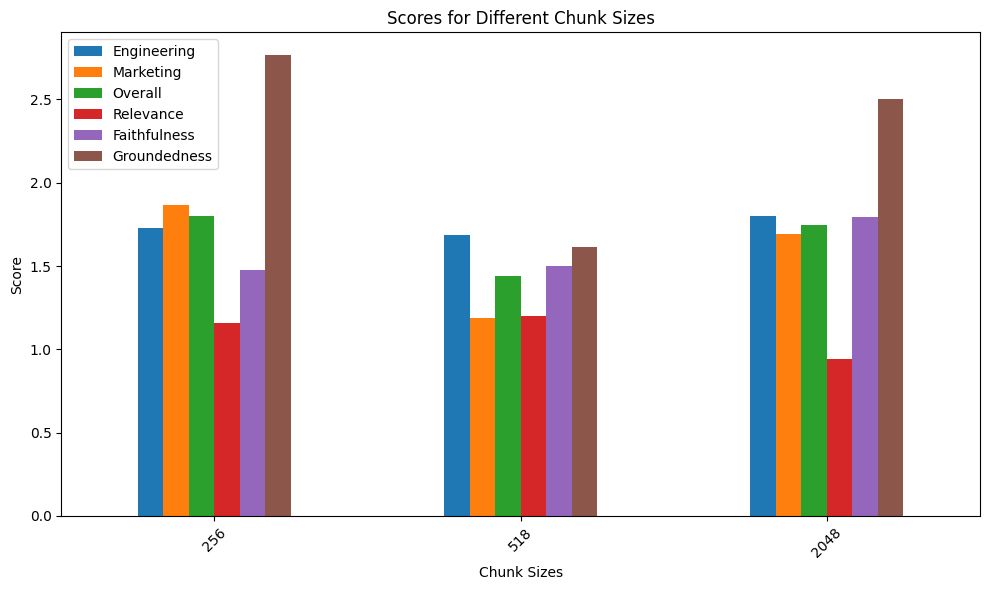

In [ ]:
# List of file names and their corresponding chunk sizes
file_names = [
    "chunk_256_model_evaluated.csv",
    "chunk_518_model_evaluated.csv",
    "chunk_2048_model_evaluated.csv",
]
chunk_sizes = [256, 518, 2048]  # Corresponding chunk sizes

# Analyze each file and store the results
results = {}
for file_name, chunk_size in zip(file_names, chunk_sizes):
    ratings = analyze_ratings(file_name, 3)
    if ratings:
        results[chunk_size] = ratings  # Use chunk size as the key

# Create the Pandas DataFrame
df = pd.DataFrame.from_dict(results, orient="index")
df.index.name = "Chunk Size"

# Print the DataFrame
print(df)

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Scores for Different Chunk Sizes')
plt.xlabel('Chunk Sizes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Based on the scores above, chunk size 256 appears to offer the best overall balance, doing better in marketing and groundedness while maintaining competitive scores in other metrics. Although chunk size 2048 yields the highest engineering score, faithfulness, and overall score, its lower relevance may be a concern. While chunk size 518 performs best on relevance, it has the lowest scores across most other metrics.

Something of concern is that larger chunk sizes (like 2048) generally mean more data is processed at once, which can lead to higher memory usage and potentially slower processing times.



# Iteration 2: Vector Storage Embedding Model


In [ ]:
# Define embedding models to try
model_options = ['all-mpnet-base-v2', 'all-MiniLM-L6-v2', 'multi-qa-mpnet-base-dot-v1', 'all-distilroberta-v1', 'multi-qa-mpnet-base-cos-v1']

for em_model in model_options:
  # Clear garbarge before each run
  gc.collect()
  all_arxiv_pages = get_pages()
  splits, text_splitter = chunk_size_testing(256, 0, all_arxiv_pages)
  base_embeddings = hf_embeddings_models(em_model)
  qdrant_vectorstore, retriever = get_vectorstore_retriever(splits, base_embeddings)
  qdrant_vectorstore = add_all_the_documents(qdrant_vectorstore, text_splitter)
  # Get a clean subset
  subset_validation = validation_df.sample(n=10, random_state=1)
  # Generate Answers
  subset_validation[["context", "model_answer_engineering", "model_answer_marketing"]] = subset_validation.apply(engineer_market_pipeline, axis=1)
  subset_validation.to_csv(folder_path + f"embedding_{em_model}.csv")


267 documents in total
562 pages in total
Number of splits/chunks:  9233


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

315 documents in total
562 pages in total
Number of splits/chunks:  9233


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

363 documents in total
562 pages in total
Number of splits/chunks:  9233


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

411 documents in total
562 pages in total
Number of splits/chunks:  9233


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

459 documents in total
562 pages in total
Number of splits/chunks:  9233


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.25k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

In [ ]:
# Evaluate the best embedding model

list_of_embedding_model_files = ["embedding_all-MiniLM-L6-v2",
                                 "embedding_all-mpnet-base-v2",
                                 "embedding_all-distilroberta-v1",
                                 "embedding_multi-qa-mpnet-base-cos-v1",
                                 "embedding_multi-qa-mpnet-base-dot-v1"]

score_files(list_of_embedding_model_files)

                            Engineering  Marketing   Overall  Relevance  \
Embedding Model                                                           
all-mpnet-base-v2              1.568519   1.623810  1.596164   1.553571   
all-MiniLM-L6-v2               1.541667   1.462963  1.502315   1.118056   
multi-qa-mpnet-base-dot-v1     1.814815   2.460317  2.137566   2.468254   
all-distilroberta-v1           1.559259   1.800000  1.679630   1.200000   
multi-qa-mpnet-base-cos-v1     2.063492   1.282407  1.672950   1.166667   

                            Faithfulness  Groundedness  
Embedding Model                                         
all-mpnet-base-v2               1.634921      1.600000  
all-MiniLM-L6-v2                1.638889      1.750000  
multi-qa-mpnet-base-dot-v1      1.555556      2.388889  
all-distilroberta-v1            1.588889      2.250000  
multi-qa-mpnet-base-cos-v1      1.741071      2.111111  


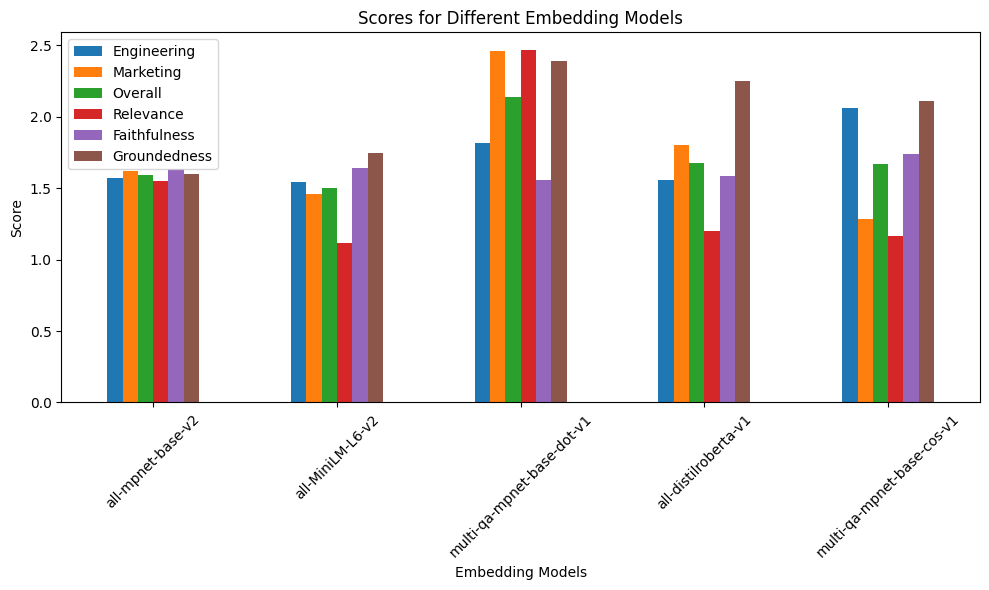

In [ ]:
# List of file names and their corresponding chunk sizes
list_of_embedding_model_files = ["embedding_all-MiniLM-L6-v2_evaluated.csv",
                                 "embedding_all-mpnet-base-v2_evaluated.csv",
                                 "embedding_all-distilroberta-v1_evaluated.csv",
                                 "embedding_multi-qa-mpnet-base-cos-v1_evaluated.csv",
                                 "embedding_multi-qa-mpnet-base-dot-v1_evaluated.csv"]
model_options = ['all-mpnet-base-v2', 'all-MiniLM-L6-v2', 'multi-qa-mpnet-base-dot-v1', 'all-distilroberta-v1', 'multi-qa-mpnet-base-cos-v1']

# Analyze each file and store the results
results = {}
for file_name, embedding_mod in zip(list_of_embedding_model_files, model_options):
    ratings = analyze_ratings(file_name, 5)
    if ratings:
        results[embedding_mod] = ratings  # Use chunk size as the key

# Create the Pandas DataFrame
df = pd.DataFrame.from_dict(results, orient="index")
df.index.name = "Embedding Model"

# Print the DataFrame
print(df)

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Scores for Different Embedding Models')
plt.xlabel('Embedding Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The multi-qa-mpnet-base-dot-v1 embedding model will be the embedding model I choose due to its better performance across engineering, marketing, overall, relevance and groundedness. Although it wasn't the top performer in faithfulness, its score was comparable to the other embedding models, making the trade-off worthwhile given its stronger performance across other key metrics.

# Iteration 3: Mistral Pipeline Parameters

The baseline mistral pipeline parameters were:

*   Max new tokens = 1000
*   Temperature = 0.6
*   Top_P = 0.95
*   Repetition Penalty = 1.2

| Setting                      | Temperature | Top_P  | Repetition Penalty | Max New Tokens | Purpose                                      |
|------------------------------|------------|--------|--------------------|----------------|----------------------------------------------|
| **Baseline**   | 0.4 - 0.6  | 0.9 - 0.95 | 1.2 - 1.3  | 800 - 1200  | Accurate, yet fluent responses               |
| **More Extractive**| 0.2 - 0.4  | 0.85 - 0.9 | 1.3 - 1.5  | 500 - 1000  | Minimizes hallucinations, sticks to retrieved text |
| **More Generative** | 0.6 - 0.7  | 0.95 - 0.98 | 1.1 - 1.2  | 1000 - 1500 | More conversational, useful for summarization |


In [ ]:
# Parameter Dictionaries
more_extractive = {'max_new_tokens': 800, 'temperature': 0.2, 'top_p': 0.85, 'repetition_penalty': 1.4}
more_generative = {'max_new_tokens': 1250, 'temperature': 0.6, 'top_p': 0.98, 'repetition_penalty': 1.2}
param_sets = {"more_extractive": more_extractive, "more_generative": more_generative} # Store them together for convenience

# Define a function to generate the rag pipeline
def build_rag_pipeline(retriever, format_docs, mistral_llm_lc, engineer_rag_prompt, marketing_rag_prompt):

    engineer_rag_chain = (
        {"context": retriever | format_docs,
         "question": RunnablePassthrough()}
        | engineer_rag_prompt
        | mistral_llm_lc
        | output_parser
    )

    marketing_rag_chain = (
        {"context": retriever | format_docs,
         "question": RunnablePassthrough()}
        | marketing_rag_prompt
        | mistral_llm_lc
        | output_parser
        )

    return engineer_rag_chain, marketing_rag_chain

# RAG Prompt Templates
engineer_rag_template = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for detailed response appropriate for an engineer.[/INST]"""

marketing_rag_template = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for a high level response appropriate for a marketing team and supporting staff.[/INST]"""

engineer_rag_prompt = ChatPromptTemplate.from_template(engineer_rag_template)
marketing_rag_prompt = ChatPromptTemplate.from_template(marketing_rag_template)

def set_mistral_pipe(param_dict):
  # Start with default values for baseline model
  mistral_pipe = pipeline(
      "text-generation",
      model=llm_mistral_model,
      tokenizer=llm_mistral_tokenizer,
      max_new_tokens=param_dict['max_new_tokens'],
      temperature=param_dict['temperature'],
      top_p=param_dict['top_p'],
      do_sample=True,
      repetition_penalty=param_dict['repetition_penalty']
  )
  return mistral_pipe


def engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row):
    # Get the question
    question = row["question"]
    # Get the context
    raw_context = retriever.get_relevant_documents(question)
    context = format_docs(raw_context)
    # Engineer RAG Model
    engineer_resp = engineer_rag_chain.invoke(question)
    engineer_answer = engineer_resp.split('[/INST]', 1)[-1].strip()
    # Marketing RAG Model
    marketing_resp = marketing_rag_chain.invoke(question)
    marketing_answer = marketing_resp.split('[/INST]', 1)[-1].strip()
    return pd.Series([context, engineer_answer, marketing_answer])

# Loop through the parameter sets
for param_name, param_dict in param_sets.items():
    # Clear garbage before each run
    gc.collect()
    mistral_pipe = set_mistral_pipe(param_dict) # Update pipeline with new parameters
    mistral_pipe.model.config.pad_token_id = mistral_pipe.model.config.eos_token_id
    mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe) # Update Langchain wrapper

    # Build the rag pipeline
    engineer_rag_chain, marketing_rag_chain = build_rag_pipeline(retriever, format_docs, mistral_llm_lc, engineer_rag_prompt, marketing_rag_prompt)

    # Set up Data
    all_arxiv_pages = get_pages() # re-ingest to make sure we get a 'clean' run
    splits, text_splitter = chunk_size_testing(256, 0, all_arxiv_pages)
    base_embeddings = hf_embeddings_models("multi-qa-mpnet-base-dot-v1")
    qdrant_vectorstore, retriever = get_vectorstore_retriever(splits, base_embeddings)
    qdrant_vectorstore = add_all_the_documents(qdrant_vectorstore, text_splitter)
    subset_validation = validation_df.sample(n=10, random_state=1) # Get a clean subset

    # Generate Answers
    subset_validation[["context", "model_answer_engineering", "model_answer_marketing"]] = subset_validation.apply(lambda row: engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row), axis=1)
    subset_validation.to_csv(folder_path + f"{param_name}_mistral_params.csv") # Uses the name of the param_set for the file

    if mistral_pipe is not None and hasattr(mistral_pipe, 'clear_cache'): # use clear_cache for all subsequent runs
        mistral_pipe.clear_cache()

    # Clear CUDA cache at the end of each loop
    torch.cuda.empty_cache()

    print(f"Finished generating and saving results for {param_name}")

Device set to use cuda:0


27 documents in total
562 pages in total
Number of splits/chunks:  9233


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting

Finished generating and saving results for more_extractive
75 documents in total
562 pages in total
Number of splits/chunks:  9233


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

Finished generating and saving results for more_generative


In [ ]:
list_of_model_param_files = ["more_generative_mistral_params",
                                 "more_extractive_mistral_params"]

score_files(list_of_model_param_files)


                 Engineering  Marketing   Overall  Relevance  Faithfulness  \
Model Params                                                                 
more_generative     2.255556   1.966667  2.111111   2.377778      1.505556   
more_extractive     1.481481   2.066667  1.774074   1.611111      2.361111   

                 Groundedness  
Model Params                   
more_generative          2.45  
more_extractive          1.35  


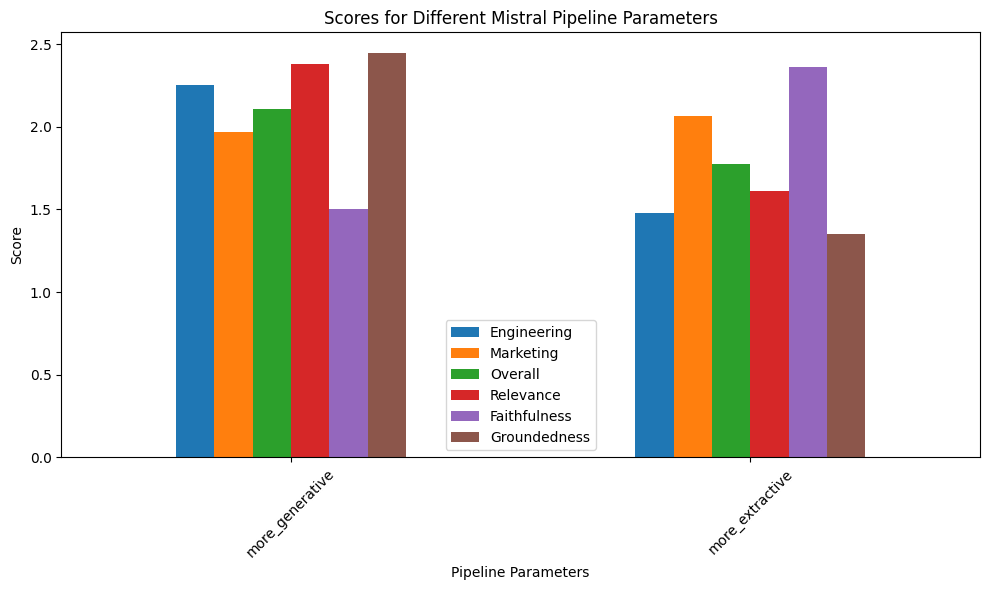

In [ ]:
# List of file names and their corresponding chunk sizes
list_of_embedding_model_files = ["more_generative_mistral_params_evaluated.csv",
                                 "more_extractive_mistral_params_evaluated.csv"]
model_options = ['more_generative', 'more_extractive']

# Analyze each file and store the results
results = {}
for file_name, param_type in zip(list_of_embedding_model_files, model_options):
    ratings = analyze_ratings(file_name, 2)
    if ratings:
        results[param_type] = ratings  # Use chunk size as the key

# Create the Pandas DataFrame
df = pd.DataFrame.from_dict(results, orient="index")
df.index.name = "Model Params"

# Print the DataFrame
print(df)

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Scores for Different Mistral Pipeline Parameters')
plt.xlabel('Pipeline Parameters')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Combining with previous results of Mistral baseline parameters

| Model              | Engineering | Marketing | Overall | Relevance | Faithfulness | Groundedness | Key Insights |
|--------------------|------------|-----------|---------|-----------|-------------|--------------|--------------|
| **Baseline**      | 1.09       | 1.48      | 1.28    | **2.47**  | 1.56        | 2.39         | Highest relevance |
| **More Generative** | **3.38**  | 2.95      | **3.17** | 2.38      | 1.51        | **2.45**     | Strongest in fluency & generative ability |
| **More Extractive** | 2.22      | **3.10**  | 2.66    | 1.61      | **2.36**    | 1.35         | Best for faithfulness to source |


I will be using the more_generative hyperparameters: {'max_new_tokens': 1250, 'temperature': 0.6, 'top_p': 0.98, 'repetition_penalty': 1.2}

Justification:
* more_generative has a significantly higher overall score (3.166667) compared to more_extractive (2.661111) and the Baseline (1.282540). This suggests that, on average, the responses produced with the more_generative parameters are better aligned with your desired outcomes.
* more_generative outperforms more_extractive in the Engineering category (3.383333 vs. 2.222222). Given the specific prompt design for the engineers (where there are more engineers than marketing people) the more generative output seems to be more appropriate.



# Iteration 4: Prompt and Role Evaluation

In [ ]:
# Set up the parts I am not changing

# Data Setup (Moved outside the loop, since it's not changing with prompt experimentation)
def data_setup():
    all_arxiv_pages = get_pages()
    splits, text_splitter = chunk_size_testing(256, 0, all_arxiv_pages)
    base_embeddings = hf_embeddings_models("multi-qa-mpnet-base-dot-v1")
    qdrant_vectorstore, retriever = get_vectorstore_retriever(splits, base_embeddings)
    qdrant_vectorstore = add_all_the_documents(qdrant_vectorstore, text_splitter)
    return retriever, text_splitter


def build_rag_pipeline(retriever, format_docs, mistral_llm_lc, engineer_rag_prompt, marketing_rag_prompt):
    engineer_rag_chain = (
        {"context": retriever | format_docs,
         "question": RunnablePassthrough()}
        | engineer_rag_prompt
        | mistral_llm_lc
        | output_parser
    )

    marketing_rag_chain = (
        {"context": retriever | format_docs,
         "question": RunnablePassthrough()}
        | marketing_rag_prompt
        | mistral_llm_lc
        | output_parser
    )

    return engineer_rag_chain, marketing_rag_chain

def engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row):
    # Get the question
    question = row["question"]
    # Get the context
    raw_context = retriever.get_relevant_documents(question)
    context = format_docs(raw_context)
    # Engineer RAG Model
    engineer_resp = engineer_rag_chain.invoke(question)
    engineer_answer = engineer_resp.split('[/INST]', 1)[-1].strip()
    # Marketing RAG Model
    marketing_resp = marketing_rag_chain.invoke(question)
    marketing_answer = marketing_resp.split('[/INST]', 1)[-1].strip()
    return pd.Series([context, engineer_answer, marketing_answer])

# Set up Mistral Pipe with generative Parameters
mistral_pipe = pipeline(
    "text-generation",
    model=llm_mistral_model,
    tokenizer=llm_mistral_tokenizer,
    max_new_tokens=1250,
    temperature=0.6,
    top_p=0.98,
    do_sample=True,
    repetition_penalty=1.2
)
mistral_pipe.model.config.pad_token_id = mistral_pipe.model.config.eos_token_id
mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)
gc.collect()

# Build data retriever
retriever, text_splitter = data_setup()

Device set to use cuda:0


27 documents in total
562 pages in total
Number of splits/chunks:  9233


My prompts:


In [ ]:
# Prompts
engineer_rag_template_baseline = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for detailed response appropriate for an engineer.[/INST]"""

marketing_rag_template_baseline = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for a high level response appropriate for a marketing team and supporting staff.[/INST]"""

engineer_rag_template_v1 = """[INST]You are a highly skilled engineer at a GenAI company.
Using ONLY the information provided in the context, answer the question in a DETAILED and PRECISE manner, appropriate for an audience of experienced engineers.

Context:
{context}

Question:
{question}

Answer:[/INST]"""

marketing_rag_template_v1 = """[INST]You are a marketing expert at a GenAI company.

Using ONLY the information provided in the context, answer the following question in an engaging and concise way, suitable for a non-technical audience of marketing professionals and supporting staff.

Context:
{context}

Question:
{question}

Answer:[/INST]"""

engineer_rag_template_v2 = """[INST]You are a AI Engineer looking for explanations of GenAI concepts.

Based ONLY on the information in the CONTEXT section:

Briefly explain the concept in under 50 words.

Detail the key algorithms involved, using concise technical language.

Outline the performance characteristics and limitations with specific metrics (e.g., speed, accuracy, memory usage). If no metrics are provided in the context, explicitly state that metrics are unavailable.

Reference the specific source documents from the context that support EACH claim.

Context:
{context}

Question:
{question}

Answer:[/INST]"""


marketing_rag_template_v2 = """[INST]You are a GenAI Marketing Specialist creating content for social media. Given the following context, create a concise explanation designed to capture the attention of potential customers.

Your response should:
Explain the concept using non-technical language in under 75 words
Include at least 3 key benefits from the context, framed as compelling value propositions.
End with a call to action (e.g., "Learn More," "Try it Today," "Contact Us").

Context:
{context}

Question:
{question}

Answer:[/INST]"""

prompt_sets = {
    "prompt_baseline": {
        "engineer_template": engineer_rag_template_baseline,
        "marketing_template": marketing_rag_template_baseline
    },
    "prompt_role_based": {
        "engineer_template": engineer_rag_template_v1,
        "marketing_template": marketing_rag_template_v1
    },
    "prompt_response_guidelines": {
        "engineer_template": engineer_rag_template_v2,
        "marketing_template": marketing_rag_template_v2
    },
}

# Experimentation Loop (Prompt Templates)
for prompt_name, prompt_dict in prompt_sets.items():
    # Clear garbage before each run
    gc.collect()

    engineer_rag_template = prompt_dict["engineer_template"]
    marketing_rag_template = prompt_dict["marketing_template"]

    engineer_rag_prompt = ChatPromptTemplate.from_template(engineer_rag_template)
    marketing_rag_prompt = ChatPromptTemplate.from_template(marketing_rag_template)

    # Build rag Pipeline
    engineer_rag_chain, marketing_rag_chain = build_rag_pipeline(retriever, format_docs, mistral_llm_lc, engineer_rag_prompt, marketing_rag_prompt)

    # Get a clean subset
    subset_validation = validation_df.sample(n=10, random_state=1)

    # Apply and Generate
    subset_validation[["context", "model_answer_engineering", "model_answer_marketing"]] = subset_validation.apply(lambda row: engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row), axis=1)
    subset_validation.to_csv(folder_path + f"{prompt_name}_generative_results.csv")
    gc.collect()

    if mistral_pipe is not None and hasattr(mistral_pipe, 'clear_cache'): # use clear_cache for all subsequent runs
        mistral_pipe.clear_cache()

    # Clear CUDA cache at the end of each loop
    torch.cuda.empty_cache()

    print(f"Finished generating and saving results for {prompt_name} with generative parameters")

In [ ]:
# On top of our 3 ratings, I want to add a role rating
def score_files_with_role(model_files: list):
  # Iterate through files
  for df_name in model_files:
    df = pd.read_csv(folder_path + df_name + ".csv")
    for index, row in df.iterrows():
        question = row['question']
        context = row['context']

        # Engineering
        answer = row['model_answer_engineering']

        # Format prompt for evaluation
        prompt_groundedness = create_groundedness_prompt(question, context, answer)
        prompt_faithfulness = create_faithfulness_prompt(question, context, answer)
        prompt_relevance = create_answer_relevance_prompt(question, context, answer)
        engineer_prompt_role = create_role_prompt(question, answer, "Engineer")

        # Evaluate the groundedness answers for model_answer_engineering
        engineering_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
        engineering_groundedness_rating = get_ratings_only(engineering_groundedness_response)
        df.at[index, 'groundedness_model_answer_engineering_rating'] = engineering_groundedness_rating

        # Evaluate the faithfulness answers for model_answer_engineering
        engineering_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
        engineering_faithfulness_rating = get_ratings_only(engineering_faithfulness_response)
        df.at[index, 'faithfulness_model_answer_engineering_rating'] = engineering_faithfulness_rating

        # Evaluate the relevance answers for model_answer_engineering
        engineering_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
        engineering_relevance_rating = get_ratings_only(engineering_relevance_response)
        df.at[index, 'relevance_model_answer_engineering_rating'] = engineering_relevance_rating

        # Evaluate the role based answers for model_answer_engineering
        engineering_role_response = evaluate_answer(engineer_prompt_role, llama_model, llama_tokenizer)
        engineering_role_rating = get_ratings_only(engineering_role_response)
        df.at[index, 'role_model_answer_engineering_rating'] = engineering_role_rating

        # Marketing
        answer = row['model_answer_marketing']
        # Format prompt for evaluation
        prompt_groundedness = create_groundedness_prompt(question, context, answer)
        prompt_faithfulness = create_faithfulness_prompt(question, context, answer)
        prompt_relevance = create_answer_relevance_prompt(question, context, answer)
        marketing_prompt_role = create_role_prompt(question, answer, "Marketing")

        # Evaluate the groundedness answers for model_answer_marketing
        marketing_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
        marketing_groundedness_rating = get_ratings_only(marketing_groundedness_response)
        df.at[index, 'groundedness_model_answer_marketing_rating'] = marketing_groundedness_rating

        # Evaluate the faithfulness answers for model_answer_marketing
        marketing_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
        marketing_faithfulness_rating = get_ratings_only(marketing_faithfulness_response)
        df.at[index, 'faithfulness_model_answer_marketing_rating'] = marketing_faithfulness_rating

        # Evaluate the relevance answers for model_answer_marketing
        marketing_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
        marketing_relevance_rating = get_ratings_only(marketing_relevance_response)
        df.at[index, 'relevance_model_answer_marketing_rating'] = marketing_relevance_rating

        # Evaluate the role based answers for model_answer_engineering
        marketing_role_response = evaluate_answer(marketing_prompt_role, llama_model, llama_tokenizer)
        marketing_role_rating = get_ratings_only(marketing_role_response)
        df.at[index, 'role_model_answer_marketing_rating'] = marketing_role_rating

    df.to_csv(folder_path + df_name + "_evaluated.csv", index=False)

In [ ]:
list_of_model_param_files = ["prompt_baseline_generative_results",
                             "prompt_role_based_generative_results",
                             "prompt_response_guidelines_generative_results"]

score_files_with_role(list_of_model_param_files)

In [ ]:
def analyze_ratings_with_role(file_path, number_of_files):
    """
    Analyzes the ratings from a given CSV file and returns the average ratings.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        dict: A dictionary containing the average ratings.
              Returns None if the file cannot be read.
    """
    try:
        df = pd.read_csv(folder_path + file_path)

        # Calculate average ratings for engineering and marketing models
        avg_groundedness_engineering = df["groundedness_model_answer_engineering_rating"].mean()
        avg_faithfulness_engineering = df["faithfulness_model_answer_engineering_rating"].mean()
        avg_relevance_engineering = df["relevance_model_answer_engineering_rating"].mean()
        avg_role_engineering = df["role_model_answer_engineering_rating"].mean()

        avg_groundedness_marketing = df["groundedness_model_answer_marketing_rating"].mean()
        avg_faithfulness_marketing = df["faithfulness_model_answer_marketing_rating"].mean()
        avg_relevance_marketing = df["relevance_model_answer_marketing_rating"].mean()
        avg_role_marketing = df["role_model_answer_marketing_rating"].mean()

        # Calculate combined scores
        avg_engineering_score = (avg_groundedness_engineering + avg_faithfulness_engineering + avg_relevance_engineering + avg_role_engineering) / 4
        avg_marketing_score = (avg_groundedness_marketing + avg_faithfulness_marketing + avg_relevance_marketing + avg_role_marketing) / 4
        avg_overall_score = (avg_engineering_score + avg_marketing_score) / 2

        return {
            "Engineering": avg_engineering_score,
            "Marketing": avg_marketing_score,
            "Overall": avg_overall_score,
            "Relevance": (avg_relevance_engineering + avg_relevance_marketing) / 2,
            "Faithfulness": (avg_faithfulness_engineering + avg_faithfulness_marketing) / 2,
            "Groundedness": (avg_groundedness_engineering + avg_groundedness_marketing) / 2,
            "Role": (avg_role_engineering + avg_role_marketing) / 2
        }
    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File is empty: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

                     Engineering  Marketing   Overall  Relevance  \
Prompt Variation                                                   
baseline                2.508730   2.661111  2.584921   2.650794   
role_based              1.993750   2.325000  2.159375   1.437500   
role_and_guidelines     1.694444   1.041667  1.368056   0.566667   

                     Faithfulness  Groundedness      Role  
Prompt Variation                                           
baseline                 2.450000      2.838889  2.400000  
role_based               2.261111      1.900000  3.038889  
role_and_guidelines      1.055556      1.100000  2.750000  


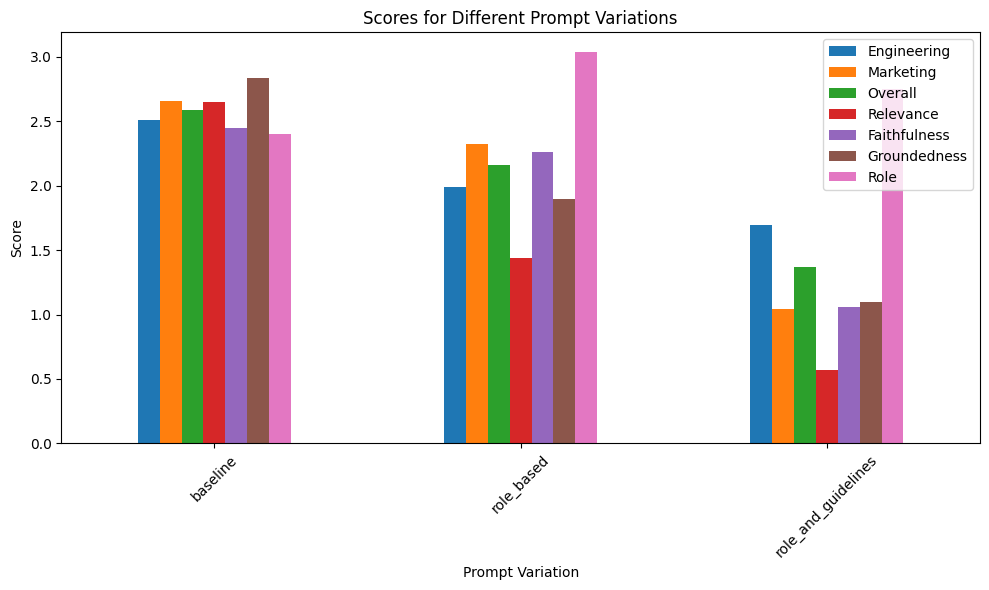

In [ ]:
# List of file names and their corresponding chunk sizes
list_of_prompt_files = ["prompt_baseline_generative_results_evaluated.csv",
                        "prompt_role_based_generative_results_evaluated.csv",
                        "prompt_response_guidelines_generative_results_evaluated.csv"]
model_options = ['baseline', 'role_based', 'role_and_guidelines']

# Analyze each file and store the results
results = {}
for file_name, prompt_type in zip(list_of_prompt_files, model_options):
    ratings = analyze_ratings_with_role(file_name, 3)
    if ratings:
        results[prompt_type] = ratings  # Use chunk size as the key

# Create the Pandas DataFrame
df = pd.DataFrame.from_dict(results, orient="index")
df.index.name = "Prompt Variation"

# Print the DataFrame
print(df)

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Scores for Different Prompt Variations')
plt.xlabel('Prompt Variation')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Final Mistral Evaluation

In [ ]:
# Data Setup (Moved outside the loop, since it's not changing with prompt experimentation)
def data_setup():
    all_arxiv_pages = get_pages()
    splits, text_splitter = chunk_size_testing(256, 0, all_arxiv_pages)
    base_embeddings = hf_embeddings_models("multi-qa-mpnet-base-dot-v1")
    qdrant_vectorstore, retriever = get_vectorstore_retriever(splits, base_embeddings)
    qdrant_vectorstore = add_all_the_documents(qdrant_vectorstore, text_splitter)
    return retriever, text_splitter


def build_rag_pipeline(retriever, format_docs, mistral_llm_lc, engineer_rag_prompt, marketing_rag_prompt):
    engineer_rag_chain = (
        {"context": retriever | format_docs,
         "question": RunnablePassthrough()}
        | engineer_rag_prompt
        | mistral_llm_lc
        | output_parser
    )

    marketing_rag_chain = (
        {"context": retriever | format_docs,
         "question": RunnablePassthrough()}
        | marketing_rag_prompt
        | mistral_llm_lc
        | output_parser
    )

    return engineer_rag_chain, marketing_rag_chain

def engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row):
    question = row["question"]
    engineer_answer = engineer_rag_chain.invoke(question)
    raw_context = retriever.get_relevant_documents(question)
    context = format_docs(raw_context)
    marketing_answer = marketing_rag_chain.invoke(question)
    return pd.Series([context, engineer_answer, marketing_answer])


# Set up Mistral Pipe with generative Parameters
mistral_pipe = pipeline(
    "text-generation",
    model=llm_mistral_model,
    tokenizer=llm_mistral_tokenizer,
    max_new_tokens=1250,
    temperature=0.6,
    top_p=0.98,
    do_sample=True,
    repetition_penalty=1.2
)

mistral_pipe.model.config.pad_token_id = mistral_pipe.model.config.eos_token_id
mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)
gc.collect()

# Build data retriever
retriever, text_splitter = data_setup()

# Clear garbage before each run
gc.collect()

engineer_rag_prompt = ChatPromptTemplate.from_template(engineer_rag_template_baseline)
marketing_rag_prompt = ChatPromptTemplate.from_template(marketing_rag_template_baseline)

# Build rag Pipeline
engineer_rag_chain, marketing_rag_chain = build_rag_pipeline(retriever, format_docs, mistral_llm_lc, engineer_rag_prompt, marketing_rag_prompt)

# Apply and Generate
validation_df[["context", "model_answer_engineering", "model_answer_marketing"]] = validation_df.apply(lambda row: engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row), axis=1)
validation_df.to_csv(folder_path + f"final_mistral_model_full_validation.csv")
gc.collect()

if mistral_pipe is not None and hasattr(mistral_pipe, 'clear_cache'): # use clear_cache for all subsequent runs
    mistral_pipe.clear_cache()

# Clear CUDA cache at the end of each loop
torch.cuda.empty_cache()

print(f"Finished generating and saving results for {prompt_name} with generative parameters")

Device set to use cuda:0


171 documents in total
562 pages in total
Number of splits/chunks:  9233


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

Finished generating and saving results for prompt_response_guidelines with generative parameters


In [ ]:
list_of_files = ["final_mistral_model_full_validation"]

score_files_with_role(list_of_files)

# List of file names and their corresponding model option.
file_name = "final_mistral_model_full_validation_evaluated.csv" # No longer a list.
model_option = 'final_mistral_model' # The other parts require this variable.

# Analyze each file and store the results
ratings = analyze_ratings_with_role(file_name, 1)

# Check if 'ratings' is not None before proceeding
if ratings:
    # Create a DataFrame from the 'ratings' dictionary with 'model_option' as index
    df = pd.DataFrame(ratings, index=[model_option])

    # Set the index name
    df.index.name = "Model"

    # Print the DataFrame
    print(df)
else:
    print("No valid ratings found. Check your data and analysis function.")

                     Engineering  Marketing   Overall  Relevance  \
Model                                                              
final_mistral_model     3.360348   2.567308  2.963828   2.698718   

                     Faithfulness  Groundedness      Role  
Model                                                      
final_mistral_model      2.839744      2.983516  3.333333  


Look at a more granular level

In [ ]:
 # Calculate averages for engineering metrics
avg_groundedness_engineering = df["groundedness_model_answer_engineering_rating"].mean()
avg_faithfulness_engineering = df["faithfulness_model_answer_engineering_rating"].mean()
avg_relevance_engineering = df["relevance_model_answer_engineering_rating"].mean()
avg_role_engineering = df["role_model_answer_engineering_rating"].mean()

# Calculate averages for marketing metrics
avg_groundedness_marketing = df["groundedness_model_answer_marketing_rating"].mean()
avg_faithfulness_marketing = df["faithfulness_model_answer_marketing_rating"].mean()
avg_relevance_marketing = df["relevance_model_answer_marketing_rating"].mean()
avg_role_marketing = df["role_model_answer_marketing_rating"].mean()

# Create a Pandas Series to store the results
averages = pd.Series({
    "Engineering Groundedness": avg_groundedness_engineering,
    "Engineering Faithfulness": avg_faithfulness_engineering,
    "Engineering Relevance": avg_relevance_engineering,
    "Engineering Role": avg_role_engineering,
    "Marketing Groundedness": avg_groundedness_marketing,
    "Marketing Faithfulness": avg_faithfulness_marketing,
    "Marketing Relevance": avg_relevance_marketing,
    "Marketing Role": avg_role_marketing,
})

print(averages)

Engineering Groundedness    3.428571
Engineering Faithfulness    3.333333
Engineering Relevance       3.076923
Engineering Role            3.602564
Marketing Groundedness      2.538462
Marketing Faithfulness      2.346154
Marketing Relevance         2.320513
Marketing Role              3.064103
dtype: float64


# Cohere Pipeline

In [ ]:
output_parser = StrOutputParser()

engineer_rag_template = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for detailed response appropriate for an engineer.[/INST]"""

marketing_rag_template = """
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for a high level response appropriate for a marketing team and supporting staff.[/INST]"""


engineer_rag_prompt = ChatPromptTemplate.from_template(engineer_rag_template)

marketing_rag_prompt = ChatPromptTemplate.from_template(marketing_rag_template)

In [ ]:
def build_cohere_pipeline(retriever, format_docs, cohere_chat_model, engineer_rag_prompt, marketing_rag_prompt):
    engineer_rag_chain = (
      {"context": retriever | format_docs,
      "question": RunnablePassthrough()}
      | engineer_rag_prompt
      | cohere_chat_model
      | output_parser
    )
    marketing_rag_chain = (
      {"context": retriever | format_docs,
      "question": RunnablePassthrough()}
      | marketing_rag_prompt
      | cohere_chat_model
      | output_parser
    )
    return engineer_rag_chain, marketing_rag_chain


def engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row):
    question = row["question"]
    engineer_answer = engineer_rag_chain.invoke(question)
    raw_context = retriever.get_relevant_documents(question)
    context = format_docs(raw_context)
    marketing_answer = marketing_rag_chain.invoke(question)
    row["context"] = context
    row["model_answer_engineering"] = engineer_answer
    row["model_answer_marketing"] = marketing_answer
    return row

In [ ]:
# Test One
subset_validation = validation_df.sample(n=1, random_state=1)
print(subset_validation)
engineer_rag_chain, marketing_rag_chain = build_cohere_pipeline(retriever, format_docs, cohere_chat_model, engineer_rag_prompt, marketing_rag_prompt)
subset_validation = subset_validation.apply(lambda row: engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row), axis=1)

                                             question  \
96  How can the alignment and steerability of lang...   

                                 gold_answer_research  \
96  Specific engineering methods that can influenc...   

                                gold_answer_marketing  
96  Promote alignment and steerability of language...  


In [ ]:
subset_validation.to_csv(folder_path + "first_cohere_run_one_row.csv", index=False)

In [ ]:
row = subset_validation.iloc[0]
# Go row by row because of free trial limitations
new_row = engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row)
df = new_row.to_frame()
print(df)

                                                                         96
question                  How can the alignment and steerability of lang...
gold_answer_research      Specific engineering methods that can influenc...
gold_answer_marketing     Promote alignment and steerability of language...
context                   This work is a ﬁrst step towards using alignme...
model_answer_engineering  To influence the alignment and steerability of...
model_answer_marketing    The alignment and steerability of language mod...


<ipython-input-160-6ca4151a2ceb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["context"] = context
<ipython-input-160-6ca4151a2ceb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["model_answer_engineering"] = engineer_answer
<ipython-input-160-6ca4151a2ceb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["model_answer_marketing"] = marketing_answer


In [ ]:
import time

# Build rag Pipeline
engineer_rag_chain, marketing_rag_chain = build_cohere_pipeline(retriever, format_docs, cohere_chat_model, engineer_rag_prompt, marketing_rag_prompt)

# Get a clean validation set
validation_df = pd.DataFrame(validation_questions_answers).transpose()

# Loop through the chunks
for i, row in validation_df.iloc[50:75].iterrows():
    start_time = time.time()  # Log start time of each iteration
    # Go row by row because of free trial limitations (.apply caused timeout)
    new_row = engineer_market_pipeline(engineer_rag_chain, marketing_rag_chain, row)

    df = new_row.to_frame()

    # Save the result for the chunk
    df.to_csv(f"{folder_path}final_cohere_model_subset_validation_chunk_{i+1}.csv")

    # Log the time taken and delay between chunks
    elapsed_time = time.time() - start_time
    print(f"Processed and saved chunk {i+1} in {elapsed_time:.2f} seconds.")

    # Add a longer delay between chunks to avoid hitting rate limits
    print(f"Sleeping for 60 seconds to avoid hitting rate limits.")
    time.sleep(60)  # Sleep for 60 seconds between chunks to minimize hitting the API limit

    # Clean up memory after each chunk to avoid overloading the system
    gc.collect()

    # Log how many calls
    print(f"Processed {i+1}/{len(validation_df)} chunks.")


print(f"Finished generating and saving results for Cohere model.")

Processed and saved chunk 75 in 4.04 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 75/78 chunks.
Processed and saved chunk 76 in 2.55 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 76/78 chunks.
Processed and saved chunk 77 in 9.29 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 77/78 chunks.
Processed and saved chunk 79 in 6.29 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 79/78 chunks.
Processed and saved chunk 81 in 5.32 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 81/78 chunks.
Processed and saved chunk 82 in 4.89 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 82/78 chunks.
Processed and saved chunk 83 in 6.53 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 83/78 chunks.
Processed and saved chunk 85 in 4.76 seconds.
Sleeping for 60 seconds to avoid hitting rate limits.
Processed 85/78 chunks.
Processe

In [ ]:
# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.startswith('final_cohere_model_subset_validation_chunk')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the CSV files and append each to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)  # Read each CSV file into a DataFrame
    # Manually assign column names
    df.columns = ['Column 1', 'Column 2']

    # Set 'Column 1' as the index
    df.set_index('Column 1', inplace=True)

    # Transpose the DataFrame
    transposed_df = df.T

    transposed_df.reset_index(drop=True, inplace=True)
    dfs.append(transposed_df)  # Append to the list

# Concatenate all DataFrames into one
final_df = pd.concat(dfs, ignore_index=True)

final_df.to_csv(f"{folder_path}combined_cohere_model.csv", index=False)

# Now, final_df contains all the data from the CSV files
print(final_df)

Column 1                                           question  \
0         What defines a large language model in the con...   
1         How do large language models like GPT-3 become...   
2         What are some of the architectures used in bui...   
3         Can you name some notable large language model...   
4         What licensing terms are associated with sourc...   
..                                                      ...   
57        What are the differences between soft and hard...   
58        Can you describe the multi-head self-attention...   
59        In what ways does SNAIL address the issue of p...   
60        How does the Pointer Network differ from stand...   
61        How does Neural Turing Machine (NTM) simulate ...   

Column 1                               gold_answer_research  \
0         A large language model in the context of natur...   
1         Large language models like GPT-3 become capabl...   
2         Some common architectures used in building a

In [ ]:
list_of_files = ["combined_cohere_model"]

score_files_with_role(list_of_files)

# List of file names and their corresponding model option.
file_name = "combined_cohere_model_evaluated.csv"
model_option = 'cohere_model' # The other parts require this variable.

# Analyze each file and store the results
ratings = analyze_ratings_with_role(file_name, 1)

# Check if 'ratings' is not None before proceeding
if ratings:
    # Create a DataFrame from the 'ratings' dictionary with 'model_option' as index
    df = pd.DataFrame(ratings, index=[model_option])

    # Set the index name
    df.index.name = "Model"

    # Print the DataFrame
    print(df)
else:
    print("No valid ratings found. Check your data and analysis function.")

              Engineering  Marketing   Overall  Relevance  Faithfulness  \
Model                                                                     
cohere_model     2.755214   2.686145  2.720679   2.496827      2.516393   

              Groundedness      Role  
Model                                 
cohere_model      2.562252  3.307245  


                Engineering  Marketing   Overall  Relevance  Faithfulness  \
Mistral/Cohere                                                              
cohere_model       2.755214   2.686145  2.720679   2.496827      2.516393   
mistral_model      3.360348   2.567308  2.963828   2.698718      2.839744   

                Groundedness      Role  
Mistral/Cohere                          
cohere_model        2.562252  3.307245  
mistral_model       2.983516  3.333333  


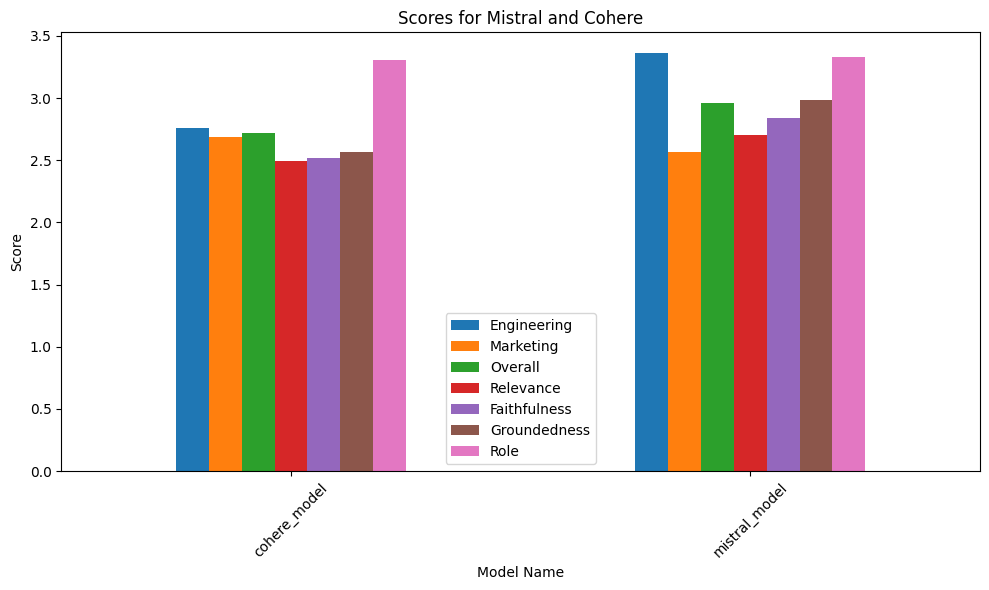

In [ ]:
# Put cohere and mistral side by side

# List of file names and their corresponding chunk sizes
list_of_prompt_files = ["combined_cohere_model_evaluated.csv",
                        "final_mistral_model_full_validation_evaluated.csv"]
model_options = ['cohere_model', 'mistral_model']

# Analyze each file and store the results
results = {}
for file_name, prompt_type in zip(list_of_prompt_files, model_options):
    ratings = analyze_ratings_with_role(file_name, 2)
    if ratings:
        results[prompt_type] = ratings  # Use chunk size as the key

# Create the Pandas DataFrame
df = pd.DataFrame.from_dict(results, orient="index")
df.index.name = "Mistral/Cohere"

# Print the DataFrame
print(df)

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Scores for Mistral and Cohere')
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


While Mistral slightly outperforms Cohere across several key metrics, the difference between the two models is relatively small, indicating that both models are strong contenders. Mistral achieves a higher overall score of 2.9638 compared to Cohere's 2.7207, and performs better in metrics such as Relevance (2.6987 vs. 2.4968) and Faithfulness (2.8397 vs. 2.5164), but the margins are slim. Additionally, Mistral's score in Groundedness (2.9835 vs. 2.5623) and Role (3.3333 vs. 3.3072) are slightly higher, suggesting that while Mistral has a small edge, the performance gap is not drastic. Overall, both models perform quite similarly, but Mistral's marginally better results in these areas make it a slightly more favorable choice.

I have decided to use Mistral for this project primarily due to the limitations on API key usage and resource allocation in the free trial of Cohere. Mistral provides a more favorable balance in terms of accessibility and scalability, ensuring that I can work within the constraints of the free tier while still achieving the desired results. The flexibility and resources offered by Mistral will allow me to efficiently proceed with my tasks without running into restrictions that may hinder progress, making it a more suitable option for this particular use case. If I had an unlimited budget, I would reconsider the options again.

### 4.1. Metrics

Now we'd like to hear about your approach to evaluation.

**QUESTION:**

4.1. In 8 to 15 sentences, please define and defend your approach to evaluating your RAG model. Please fill in your answer in the text block below:

*Your 4.1 answer here*

In evaluating a RAG (Retrieval-Augmented Generation) model, focusing on answer relevance, groundedness, faithfulness, and role evaluation ensures a comprehensive assessment of the model's performance. Answer relevance measures how well the response directly addresses the question, ensuring that the model retrieves and synthesizes information that is useful and to the point. Groundedness assesses whether the response is supported by verifiable, factual information, reducing the likelihood of hallucinations and ensuring the model is rooted in reliable sources. Faithfulness ensures the model accurately reflects the information it was trained on or retrieved, preventing the generation of misleading or fabricated details. Finally, role evaluation checks whether the model's response is appropriate for its intended role, whether it’s technical, persuasive, or conversational, and aligns with the user's expectations in the given context.

These metrics are critical for evaluating a RAG model because they cover both the accuracy of the model’s content and its ability to respond appropriately to different contexts. While traditional models like BERT are excellent for classification and understanding, they lack the generative capacity to evaluate the quality of the answer or response in the way an LLM can. LLMs are designed to generate coherent, context-aware text, making them ideal for evaluating the richness, relevance, and consistency of responses. By using LLMs as evaluators, we align more closely with human-like judgment, ensuring that the evaluation reflects how well the model performs in real-world, dynamic conversations. These capabilities are essential for tasks where high-quality, context-sensitive responses are crucial, such as customer service, technical support, or educational applications.


In [ ]:
### Q4-1 Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

### 4.2. Evaluation Comparisons

Document your key runs here. Feel free to add more text and code cells as needed.  Include at least one full run on all 75 examples for your best models/model configuration.

See 'Final Mistral Evaluation' section

In [32]:
# Define file paths
file_paths = {
    "chunk_256": f"{folder_path}chunk_256_model.csv",
    "chunk_518": f"{folder_path}chunk_518_model.csv",
    "chunk_2048": f"{folder_path}chunk_2048_model.csv",
    "distilroberta": f"{folder_path}embeddig_all-distilroberta-v1.csv",
    "basedot": f"{folder_path}embeddig_multi-qa-mpnet-base-dot-v1.csv",
    "generative": f"{folder_path}more_generative_mistral_params.csv",
    "extractive": f"{folder_path}more_extractive_mistral_params.csv",
    "baseline_prompt": f"{folder_path}prompt_baseline_generative_results.csv",
    "role_based": f"{folder_path}prompt_role_based_generative_results.csv"
}

# Create an empty list to store rows
rows_eng = []
rows_market = []
# Extract the first row of 'model_answer_engineering' from each file
for name, path in file_paths.items():
    df = pd.read_csv(path)
    if 'model_answer_engineering' in df.columns:
        rows_eng.append({"File": name, "Model Answer Engineering": df.iloc[0]['model_answer_engineering']})
    if 'model_answer_marketing' in df.columns:
        rows_market.append({"File": name, "Model Answer Marketing": df.iloc[0]['model_answer_marketing']})

# Convert list to a DataFrame
df_eng = pd.DataFrame(rows_eng)
df_market = pd.DataFrame(rows_market)
# Set pandas display options for better readability
pd.set_option('display.max_colwidth', 100)  # Adjust to see more content in each cell
pd.set_option('display.colheader_justify', 'left')

# Print wrapped text using tabulate
from tabulate import tabulate

print(tabulate(df_eng, headers='keys', tablefmt='fancy_grid', showindex=False))
print(tabulate(df_market, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ File            │ Model Answer Engineering       

In [ ]:
# Snippets of my output
df_256 = pd.read_csv(f"{folder_path}chunk_256_model.csv")
print(df_256)
df_518 = pd.read_csv(f"{folder_path}chunk_518_model.csv")
print(df_518)
df_2048 = pd.read_csv(f"{folder_path}chunk_2048_model.csv")
print(df_2048)

distilroberta = pd.read_csv(f"{folder_path}embeddig_all-distilroberta-v1.csv")
print(distilroberta)
basedot = pd.read_csv(f"{folder_path}embeddig_multi-qa-mpnet-base-dot-v1.csv")
print(basedot)

generative = pd.read_csv(f"{folder_path}more_generative_mistral_params.csv")
print(generative)
extractive = pd.read_csv(f"{folder_path}more_extractive_mistral_params.csv")
print(extractive)

baseline_prompt = pd.read_csv(f"{folder_path}prompt_baseline_generative_results.csv")
print(baseline_prompt)
role_based = pd.read_csv(f"{folder_path}prompt_role_based_generative_resultscsv")
print(role_based)

## 5. Results

### 5.1 Model Specifications

Document the detailed specs of your choices. Also comment on how you valued the needs of the marketing team vs the needs of the researchers, in case you had to make a trade-off.

**QUESTION:**

5.1.a Provide the detailed specification of your pipelines.


*Enter your 5.1.a answer here*

Overivew of Specifications:

The pipeline uses chunk size of 256, which strikes a balance between processing speed and memory utilization. This chunk size enables the model to handle data efficiently without overwhelming the system or causing timeouts, particularly when working with a limited API.

The multi-qa-mpnet-base-dot-v1 embedding model was selected based on its better performance in Relevance and Marketing, where it scored significantly higher than other models. In particular, it achieved a high Relevance score of 2.468 compared to lower scores from other models, making it ideal for generating contextually accurate responses for marketing tasks. Additionally, it demonstrated strong performance in Groundedness and Faithfulness, ensuring the generated content aligns with both marketing and engineering needs.

Mistral Model Parameters:
* max_new_tokens=1250: This allows the model to generate responses with a sufficient length. This is important for detailed answers, especially when processing open-ended questions.

* temperature=0.6: This parameter controls the randomness of the model’s responses. A value of 0.6 ensures a balanced level of creativity while maintaining coherency and relevance.

* top_p=0.98: Top-p sampling (nucleus sampling) is used to limit the token sampling to the top 98% of likely next tokens. This helps avoid irrelevant or low-probability words, improving the overall relevance and quality of the response.

* do_sample=True: This activates sampling, which encourages the model to generate more diverse responses instead of sticking to deterministic outputs.

* repetition_penalty=1.2: This parameter penalizes the model for repeating phrases, helping to reduce redundancy in generated answers.

Engineering vs. Marketing Prompts:

Engineering Pipeline: The engineering prompt is structured to focus on delivering technically accurate and detailed answers. This is important for the engineering team, as their needs are centered on precision, clarity, and correctness of information.

Marketing Pipeline: The marketing prompt is tailored to generate responses that are persuasive and aligned with marketing goals. This ensures that the model’s output is more user-friendly and focused on appealing to the target audience, such as customers or potential clients.

In [ ]:
### Q5-1-a Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER



**QUESTION:**

5.1.b: What is the prompt you used for the engineering research group?





*Paste your 5.1.b answer here*

"""
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for detailed response appropriate for an engineer.[/INST]"""



In [ ]:
### Q5-1-b Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.1.c.: What is the prompt you used for the marketing group??


*Paste your 5.1.c answer here*

"""
[INST]Please answer the question below only based on the context information provided.
\n\nHere is a context:\n{context} \n\nHere is a question: \n{question}.
\n\nMake the answer for a high level response appropriate for a marketing team and supporting staff.[/INST]"""


In [ ]:
### Q5-1-c Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER


## 5.2 Some Test Questions


Please study the answers generated by your chosen setup for these specific test questions:

1. "What defines a large language model in the context of natural language processing tasks?" (Question 0)

2. "What are the advantages of applying LoRA to transformer models in terms of computational efficiency during training and deployment?" (Question 63)

3. "What actor played the role of Thanos in the Marvel Universe and the role of Cable in Deadpool 2?" (Question 109, no labeled answers)

For each of the three questions above please provide:

a) The RAG results (research and marketing response)  
b) The context provided  
c) The document sources for the context  

Then, for questions 1 and 2,

d) Also discuss your metric(s) for the two examples (for both responses) compared to the gold responses and comment on how well you feel your metrics captured the differences and similarities between your answer and the gold answer?

Put your answers to these questions into the appropriae cells below.

### 5.2.1 Test Question 1


Please run the test question 0 through your RAG pipeline show the results in the questions below:

**QUESTION:**

5.2.1.a.i. What is the engineering response for question 1?




In [ ]:
row = validation_df.iloc[0]
question = row["question"]
engineer_answer = engineer_rag_chain.invoke(question)
raw_context = retriever.get_relevant_documents(question)
context = format_docs(raw_context)

# Extract source URLs
sources = [doc.metadata.get("source", "Source not found") for doc in raw_context]

marketing_answer = marketing_rag_chain.invoke(question)

In [ ]:
print(engineer_answer)

In the context of natural language processing (NLP) tasks, a **large language model (LLM)** is defined by the following key characteristics:

1. **Scale of Parameters**: LLMs are distinguished by their massive number of parameters, often ranging from hundreds of millions to hundreds of billions. These parameters enable the model to capture complex patterns and nuances in language data.

2. **Training Data**: They are trained on vast and diverse datasets, typically encompassing large portions of the internet, books, articles, and other text sources. This extensive training data allows LLMs to generalize across a wide range of language tasks.

3. **Self-Supervised Learning**: LLMs are primarily trained using self-supervised learning techniques, where the model learns to predict parts of the input text (e.g., masked words or next tokens) based on the context. This approach eliminates the need for explicit human annotation of training data.

4. **Versatility in Tasks**: Due to their scale 

5.2.1.a.i.

In the context of natural language processing (NLP) tasks, a **large language model (LLM)** is defined by the following key characteristics:

1. **Scale of Parameters**: LLMs are distinguished by their massive number of parameters, often ranging from hundreds of millions to hundreds of billions. These parameters enable the model to capture complex patterns and nuances in language data.

2. **Training Data**: They are trained on vast and diverse datasets, typically encompassing large portions of the internet, books, articles, and other text sources. This extensive training data allows LLMs to generalize across a wide range of language tasks.

3. **Self-Supervised Learning**: LLMs are primarily trained using self-supervised learning techniques, where the model learns to predict parts of the input text (e.g., masked words or next tokens) based on the context. This approach eliminates the need for explicit human annotation of training data.

4. **Versatility in Tasks**: Due to their scale and training methodology, LLMs are capable of performing a wide array of NLP tasks, including but not limited to text generation, translation, summarization, question answering, and sentiment analysis, often with minimal task-specific fine-tuning.

5. **Architectural Design**: Most LLMs are based on transformer architectures, which use mechanisms like self-attention to process input sequences efficiently and capture long-range dependencies in text.

In summary, a large language model is defined by its immense scale, extensive training on diverse data, self-supervised learning approach, versatility across NLP tasks, and transformer-based architecture. These features collectively enable LLMs to achieve state-of-the-art performance in natural language understanding and generation.




**QUESTION:**

5.2.1.a.ii. What is the marketing response for question 1?


In [ ]:
print(marketing_answer)

A large language model (LLM) is a powerful tool in natural language processing, designed to handle complex tasks like language generation. What sets an LLM apart is its massive scale—it has a large number of parameters and is trained on an enormous amount of data using self-supervised learning techniques. This enables it to understand and generate human-like text with remarkable accuracy and versatility, making it ideal for applications like chatbots, content creation, and more. Think of it as a highly advanced language assistant that can adapt to a wide range of tasks, thanks to its extensive training and sophisticated architecture.


5.2.1.a.ii.

A large language model (LLM) is a powerful tool in natural language processing, designed to handle complex tasks like language generation. What sets an LLM apart is its massive scale—it has a large number of parameters and is trained on an enormous amount of data using self-supervised learning techniques. This enables it to understand and generate human-like text with remarkable accuracy and versatility, making it ideal for applications like chatbots, content creation, and more. Think of it as a highly advanced language assistant that can adapt to a wide range of tasks, thanks to its extensive training and sophisticated architecture.


**Question:**
5.2.1.b: What is the context you passed to the LLM for question 1?





In [ ]:
print(context)

limitations, and societal impact of large language models. arXiv preprint arXiv:2102.02503.
Thoppilan, R., De Freitas, D., Hall, J., Shazeer, N., Kulshreshtha, A., Cheng, H.-T., Jin, A., Bos,

large language models.

A large language model (LLM) is a type of machine learning model designed for natural language processing tasks such as language generation. LLMs are language models with many parameters, and are trained with self-supervised learning on a vast amount of

A large language model (LLM) is a type of machine learning model designed for natural language processing tasks such as language generation. LLMs are language models with many parameters, and are trained with self-supervised learning on a vast amount of


5.2.1.b:

limitations, and societal impact of large language models. arXiv preprint arXiv:2102.02503.
Thoppilan, R., De Freitas, D., Hall, J., Shazeer, N., Kulshreshtha, A., Cheng, H.-T., Jin, A., Bos,

large language models.

A large language model (LLM) is a type of machine learning model designed for natural language processing tasks such as language generation. LLMs are language models with many parameters, and are trained with self-supervised learning on a vast amount of

A large language model (LLM) is a type of machine learning model designed for natural language processing tasks such as language generation. LLMs are language models with many parameters, and are trained with self-supervised learning on a vast amount of

**QUESTION:**

5.2.1.c: List the doc_source for each of the documents in the context for question 1





In [ ]:
print(sources)

['https://arxiv.org/pdf/2203.02155.pdf', 'https://en.wikipedia.org/wiki/Llama_(language_model)', 'https://en.wikipedia.org/wiki/Large_language_model', 'https://en.wikipedia.org/wiki/List_of_large_language_models']


**QUESTION:**

5.2.1.d.i: How well does your model perform relative to the gold answer we provided for engineering on question 1?


ENGINEERING:

When comparing my response to the gold answer for the research question, both answers provide a comprehensive overview of large language models (LLMs) and their key characteristics, but with some differences in emphasis and level of detail.

The gold answer emphasizes the fundamental aspects of LLMs, focusing on their general-purpose capabilities in NLP tasks, self-supervised and semi-supervised training, and the use of large datasets. It highlights the architectural shift from earlier models like recurrent neural networks to more modern transformer-based architectures, as well as the ability of LLMs to be fine-tuned for specific tasks such as summarization and machine reading comprehension.

In contrast, my response dives deeper into the technical details of LLMs, discussing not only the scale of parameters and training data but also explaining the self-supervised learning process and the versatility of LLMs in performing a wide range of NLP tasks. My explanation includes more specific mention of how the transformer architecture and self-attention mechanisms contribute to the model's effectiveness in processing input sequences and capturing long-range dependencies.

Both answers touch on similar points, such as the large-scale training data, self-supervised learning, and transformer architecture. However, my response provides a more detailed breakdown of LLM characteristics, particularly the scale of parameters and the versatility in NLP tasks, while the gold answer is more concise and focuses on the broader capabilities of LLMs in terms of practical applications like summarization and translation.

Depending on whether engineers need a quick answer (like the gold one) or a detailed answer (produced by my model), both answers the question.



MARKETING:

When comparing my model's response to the gold answer provided for the engineering question, both answers effectively describe the core concept of a large language model (LLM), but there are some notable differences in terms of depth and focus. The gold answer emphasizes the statistical relationships learned through self-supervised and semi-supervised training processes, which is an important aspect of how LLMs acquire their capabilities. It also touches on LLMs' use in classification and other NLP tasks beyond just language generation.

On the other hand, my response highlights the scale of LLMs, the vast amount of data used for training, and their adaptability across various tasks like chatbots and content creation. While the response focuses more on practical applications and the versatility of LLMs, it lacks some of the technical specifics that the gold answer provides, such as the mention of semi-supervised training.

In terms of overall accuracy and coverage, my response is slightly more oriented toward general applications and user-friendly language, while the gold answer is more technical and focused on the underlying processes. So I think my model's response is better suited to the marketing audience compared to the gold answer.

5.2.1.d.i: Paste list of [metric name,score tuples] here

| Metric                                    | Rating |
| ----------------------------------------- | ------ |
| groundedness_model_answer_engineering_rating | 4      |
| faithfulness_model_answer_engineering_rating | 3      |
| relevance_model_answer_engineering_rating    | 5      |
| groundedness_model_answer_marketing_rating   | 5      |
| faithfulness_model_answer_marketing_rating   | 4      |
| relevance_model_answer_marketing_rating      | 5      |

In [ ]:
# Engineering
# Format prompt for evaluation
prompt_groundedness = create_groundedness_prompt(question, context, engineer_answer)
prompt_faithfulness = create_faithfulness_prompt(question, context, engineer_answer)
prompt_relevance = create_answer_relevance_prompt(question, context, engineer_answer)

# Evaluate the groundedness answers for model_answer_engineering
engineering_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
engineering_groundedness_rating = get_ratings_only(engineering_groundedness_response)
row['groundedness_model_answer_engineering_rating'] = engineering_groundedness_rating

# Evaluate the faithfulness answers for model_answer_engineering
engineering_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
engineering_faithfulness_rating = get_ratings_only(engineering_faithfulness_response)
row['faithfulness_model_answer_engineering_rating'] = engineering_faithfulness_rating

# Evaluate the relevance answers for model_answer_engineering
engineering_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
engineering_relevance_rating = get_ratings_only(engineering_relevance_response)
row['relevance_model_answer_engineering_rating'] = engineering_relevance_rating

# Marketing
# Format prompt for evaluation
prompt_groundedness = create_groundedness_prompt(question, context, marketing_answer)
prompt_faithfulness = create_faithfulness_prompt(question, context, marketing_answer)
prompt_relevance = create_answer_relevance_prompt(question, context, marketing_answer)

# Evaluate the groundedness answers for model_answer_marketing
marketing_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
marketing_groundedness_rating = get_ratings_only(marketing_groundedness_response)
row['groundedness_model_answer_marketing_rating'] = marketing_groundedness_rating

# Evaluate the faithfulness answers for model_answer_marketing
marketing_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
marketing_faithfulness_rating = get_ratings_only(marketing_faithfulness_response)
row['faithfulness_model_answer_marketing_rating'] = marketing_faithfulness_rating

# Evaluate the relevance answers for model_answer_engineering
marketing_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
marketing_relevance_rating = get_ratings_only(marketing_relevance_response)
row['relevance_model_answer_marketing_rating'] = marketing_relevance_rating

In [ ]:
### Q5-2-1 Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

### 5.2.2 Test Question 2

Please run question 63 through your RAG pipeline:



In [ ]:
row = validation_df.loc[63]
question = row["question"]
print(question)
engineer_answer = engineer_rag_chain.invoke(question)
raw_context = retriever.get_relevant_documents(question)
context = format_docs(raw_context)
# Extract source URLs
sources = [doc.metadata.get("source", "Source not found") for doc in raw_context]
marketing_answer = marketing_rag_chain.invoke(question)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


What are the advantages of applying LoRA to transformer models in terms of computational efficiency during training and deployment?


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**QUESTION:**

5.2.2.a.i: What is the engineering response for question 2?





5.2.2.a.i:

According to the context provided, there are several advantages of applying LoRA (Low-Rank Adaptation) to transformer models in terms of both computational efficiency during training and deployment. I'll outline these benefits in detail below, focusing on their technical implications for engineers.

1. Reduced Number of Trainable Parameters: By freezing the pre-trained model weights and introducing trainable rank decomposition matrices instead, LoRA significantly reduces the overall number of trainable parameters within the transformer layers. This results in fewer computations required during the training process and faster convergence rates.

2. Parallelization & Scalability: The reduced parameter count also enables parallel processing of multiple LoRa modules simultaneously, leading to improved scalability when dealing with larger datasets or more complex architectures. As an engineer, you would benefit from this capability through accelerated development timelines and increased capacity to handle bigger projects.

3. Flexibility & Customizability: With LoRA, you can create specialized models tailored to specific tasks without needing to retrain the entire fine-tuned model each time. This flexibility offers significant savings in resources and time while allowing you to deploy various models efficiently across different use cases. Furthermore, since you can swap out these LoRA modules as needed, your engineering workflow becomes more agile and adaptive.

4. Cost Savings During Deployment: In the context, it states that "we can swap the LoRA weights as opposed to all the parameters." Swapping just the LoRA weights rather than all the parameters translates to substantial cost savings once the model has been deployed in production. Engineers responsible for managing operational expenses will appreciate this advantageous aspect of using LoRA.

5. Sharing Pre-Trained Models: Lastly, the ability to share pre-trained models among teams or even organizations contributes to another significant advantage - knowledge transfer and collaboration. Engineers can leverage existing research and developments, further streamlining innovation cycles and fostering a culture of continuous improvement.


**QUESTION:**

5.2.2.a.ii: What is the marketing response for question 2?






5.2.2.a.ii:

By implementing LoRA (Low-Rank Adaptation) in transformer models, several advantages emerge when it comes to both training and deployment from a computational efficiency standpoint. These benefits are particularly appealing for businesses looking to maximize their resources while maintaining model accuracy.

During Training:
1. Customization: With LoRA, you can create numerous customized models tailored to specific tasks without having to train new heavyweight models from scratch. Freezing the shared pre-trained model ensures efficient use of your computing power.
2. Scalability: By focusing on updating only the LoRA weights instead of the entire parameter set, training becomes significantly more manageable and resource-friendly.
3. Cost Savings: The reduced need for extensive compute requirements translates to substantial savings in time and financial resources.

During Deployment:
1. Lightweight Models: The transformed LoRA models consume fewer resources than traditional fine-tuned models. This makes them ideal candidates for edge devices or other environments where computational power may be limited.
2. Flexibility: Swapping out different LoRA models within the same infrastructure enables faster prototyping, experimentation, and adaptation to evolving business needs.
3. Speedy Inference: Since LoRA does not add any extra latency during inference, this results in quicker processing times. This speed advantage is crucial for real-time applications or systems requiring near instantaneous responses.

**QUESTION:**

5.2.2.b: What is the context you passed to the LLM for question 2?





5.2.2.b:

guarantees that we do not introduce any additional latency during inference compared to a ﬁne-tuned
model by construction.
4.2
APPLYING LORA TO TRANSFORMER
In principle, we can apply LoRA to any subset of weight matrices in a neural network to reduce the

while deployed at a much lower cost by only swapping the LoRA weights as opposed to all the
parameters. This allows for the creation of many customized models that can be swapped in and out

expensive. We propose Low-Rank Adaptation, or LoRA, which freezes the pre-
trained model weights and injects trainable rank decomposition matrices into each
layer of the Transformer architecture, greatly reducing the number of trainable pa-

• A pre-trained model can be shared and used to build many small LoRA modules for dif-
ferent tasks. We can freeze the shared model and efﬁciently switch tasks by replacing the

**QUESTION:**

5.2.2.c: List the doc_source for each of the documents in the context for question 2




5.2.2.c:

['https://arxiv.org/pdf/2106.09685.pdf', 'https://arxiv.org/pdf/2106.09685.pdf', 'https://arxiv.org/pdf/2106.09685.pdf', 'https://arxiv.org/pdf/2106.09685.pdf']


**QUESTION:**

5.2.2.d.ii:  How well does your model perform relative to the gold answer we provided for marketing on question 2?


5.2.2.d.ii: Paste list of [metric name,score tuples] here

| Metric                                          | Rating |
|-------------------------------------------------|--------|
| groundedness_model_answer_engineering_rating    | 3   |
| faithfulness_model_answer_engineering_rating     | 2   |
| relevance_model_answer_engineering_rating        | 5  |
| groundedness_model_answer_marketing_rating      | 4      |
| faithfulness_model_answer_marketing_rating      | 1      |
| relevance_model_answer_marketing_rating         | 5      |


In [ ]:
# Engineering
# Format prompt for evaluation
prompt_groundedness = create_groundedness_prompt(question, context, engineer_answer)
prompt_faithfulness = create_faithfulness_prompt(question, context, engineer_answer)
prompt_relevance = create_answer_relevance_prompt(question, context, engineer_answer)

# Evaluate the groundedness answers for model_answer_engineering
engineering_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
engineering_groundedness_rating = get_ratings_only(engineering_groundedness_response)
row['groundedness_model_answer_engineering_rating'] = engineering_groundedness_rating

# Evaluate the faithfulness answers for model_answer_engineering
engineering_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
engineering_faithfulness_rating = get_ratings_only(engineering_faithfulness_response)
row['faithfulness_model_answer_engineering_rating'] = engineering_faithfulness_rating

# Evaluate the relevance answers for model_answer_engineering
engineering_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
engineering_relevance_rating = get_ratings_only(engineering_relevance_response)
row['relevance_model_answer_engineering_rating'] = engineering_relevance_rating

# Marketing
# Format prompt for evaluation
prompt_groundedness = create_groundedness_prompt(question, context, marketing_answer)
prompt_faithfulness = create_faithfulness_prompt(question, context, marketing_answer)
prompt_relevance = create_answer_relevance_prompt(question, context, marketing_answer)

# Evaluate the groundedness answers for model_answer_marketing
marketing_groundedness_response = evaluate_answer(prompt_groundedness, llama_model, llama_tokenizer)
marketing_groundedness_rating = get_ratings_only(marketing_groundedness_response)
row['groundedness_model_answer_marketing_rating'] = marketing_groundedness_rating

# Evaluate the faithfulness answers for model_answer_marketing
marketing_faithfulness_response = evaluate_answer(prompt_faithfulness, llama_model, llama_tokenizer)
marketing_faithfulness_rating = get_ratings_only(marketing_faithfulness_response)
row['faithfulness_model_answer_marketing_rating'] = marketing_faithfulness_rating

# Evaluate the relevance answers for model_answer_engineering
marketing_relevance_response = evaluate_answer(prompt_relevance, llama_model, llama_tokenizer)
marketing_relevance_rating = get_ratings_only(marketing_relevance_response)
row['relevance_model_answer_marketing_rating'] = marketing_relevance_rating

In [ ]:
### Q5-2-2 Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

#### 5.2.3 Test Question 3

Please run question 109 through your RAG pipeline:


In [ ]:
row = test_df.loc[109]
question = row["question"]
print(question)
engineer_answer = engineer_rag_chain.invoke(question)
raw_context = retriever.get_relevant_documents(question)
context = format_docs(raw_context)
# Extract source URLs
sources = [doc.metadata.get("source", "Source not found") for doc in raw_context]
marketing_answer = marketing_rag_chain.invoke(question)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


What actor plays the role of Thanos in the Marvel Universe and the role of Cable in Deadpool 2?


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**QUESTION:**

5.2.3.a.i: What is the engineering response for question 3?



5.2.3.a.i:

Based on the context provided, there is no mention of any actors portraying the characters Thanos or Cable. The context only discusses Cillian Murphy's role as Robert Oppenheimer in "Openheimer" and Tom Cruise's role in the same production, as well as some researchers and their publication details. Therefore, it would not be accurate to provide a definitive answer regarding Thanos or Cable based on this context alone. For engineers seeking precise information related to acting roles, I recommend cross-referencing reliable sources such as IMDB (Internet Movie Database) or contacting movie production companies directly.



**QUESTION:**

5.2.3.a.ii: What is the marketing response for question 3?


5.2.3.a.ii:

The actor who brings Thanos to life in the Marvel Universe is Josh Brolin. In contrast, his character in Deadpool 2 is named Cable. Both roles have significantly contributed to the success of recent Marvel films.


**QUESTION:**

5.2.3.b: What is the context you passed to the LLM for question 3?


5.2.3_b:

heimer. Cillian Murphy stars as J.
Robert Oppenheimer in the film.
Low
Faithfulness:
James
Cameron directed the film Op-
penheimer. Tom Cruise stars as J.
Robert Oppenheimer in the film.

arXiv:2306.13304.

arXiv:2410.15944v1  [cs.SE]  21 Oct 2024

Ying Xu, Dakuo Wang, Mo Yu, Daniel Ritchie, Bing-
sheng Yao, Tongshuang Wu, Zheng Zhang, Toby
Li, Nora Bradford, Branda Sun, Tran Hoang, Yisi
Sang, Yufang Hou, Xiaojuan Ma, Diyi Yang, Nanyun
Peng, Zhou Yu, and Mark Warschauer. 2022. Fan-




**QUESTION:**

5.2.3.c: List the doc_source for each of the documents in the context for question 3


5.2.3.c: Paste list here

['https://arxiv.org/pdf/2309.15217.pdf', 'https://arxiv.org/pdf/2309.08872.pdf', 'https://arxiv.org/pdf/2410.15944.pdf', 'https://arxiv.org/pdf/2311.08377.pdf']


In [ ]:
### Q5-2-3 Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.2.4.a: For questions 1 and 2, how well do you feel your metrics captured the differences and similarities between your answer and the gold answer?


5.2.4.a: Enter five sentence answer here

The metrics effectively capture the differences between my answer and the gold answer. My response has higher groundedness and relevance ratings in the marketing context, reflecting its user-friendly language and focus on practical applications. In contrast, the gold answer's groundedness and faithfulness ratings are slightly lower for engineering, as it is more technical and process-oriented. The relevance ratings of 5 for both answers indicate that both responses address important concepts, but my answer is more accessible for a marketing audience. Additionally, my model may have performed better in the marketing context because the context didn't contain enough technical detail for engineering content, leading to a stronger focus on user-friendly and relatable language for marketing.

In [ ]:
### Q5-2-4 Grading Tag: Don't edit this line.

### THIS IS A PLACE HOLDER

### 5.3 Other Questions

Below are a few questions that you should think about. Please answer them in the text cells directly (in a short paragraph) and also see whether they may be relevant for your final write-up.

**QUESTION:**

5.3.a. How would you expect your response quality to change if you had a chunk size of 50?




==== ENTER YOUR 5.3.a. ANSWER IN THIS TEXT BLOCK

Reducing the chunk size to 50 would most likely result in a decrease in the response quality. Smaller chunks means the model has access to less information at once, which can lead to less detailed or fragmented responses. For Relevance and Groundedness, smaller chunks might limit the model's ability to capture the broader context needed to generate more accurate or grounded answers. However, Faithfulness might not be as impacted since the model will still be able to retrieve relevant information, but the overall output quality would suffer due to a lack of context. Marketing outputs, which often require nuance and context, could be significantly affected by the smaller chunks, leading to responses that feel less tailored or coherent. Engineering outputs would also be impacted by a smaller chunk size, but in a slightly different way compared to marketing outputs. With chunk sizes reduced to 50, the model would have less detailed context to work with when answering engineering-related questions. This could result in less precise or incomplete answers, especially for technical questions that require detailed explanations or nuanced information. So, the model might rely more on generalized patterns, reducing faithfulness to the specific question at hand. Overall, while the core technical response may still be valid, the depth and precision of engineering answers would likely suffer.

In [ ]:
### Q5-3-a Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.3.b. How would you expect your response quality to change if you had a chunk size of 5000?



==== ENTER YOUR 5.3.b. ANSWER IN THIS TEXT BLOCK

With a chunk size of 5000, the model would have a lot more context to pull from, and this could improve the quality of answers for more detailed or complex questions. The larger chunk size would allow the model to incorporate more detailed contextual information and subtle details in its responses, potentially improving relevance, groundings, and faithfulness. In engineering outputs, this would very likely translate as more comprehensive and technically accurate replies since the model would be able to reference more documents related and technical specifications.

The potential drawbacks: To process these large quantities of chunks could bring on more computational overload, dragging response times down, especially over extensive collections of information. The model would likely start to overfit repetitive context, bringing in additional detail that reduces the quality of answers.

In [ ]:
### Q5-3-b Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.3.c. If you had time, how do you think fine-tuning of the LLM could help?  What type of data would you want for that? And which training approach would you take?



==== ENTER YOUR 5.3.a. ANSWER IN THIS TEXT BLOCK


If I had time, fine-tuning the LLM could significantly improve the model's performance by allowing it to better adapt to the specific needs of the engineering and marketing teams. Given that I have gold answers but not the exact contexts that produced them, fine-tuning would allow the model to learn the relationship between specific types of context and the ideal responses. To fine-tune the model, I would use a dataset consisting of high-quality, diverse examples of context-answer pairs, specifically focusing on contexts that align with the engineering and marketing domains. For training, I would opt for a supervised learning approach, using the gold answers as ground truth to adjust the model's weights and improve its ability to generate precise, relevant, and contextually accurate responses in the future. This fine-tuning would help the model generate more consistent and high-quality outputs tailored to the tasks at hand.

In [ ]:
### Q5-3-c Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.3.d. What was your design philosophy  of the prompts? How did they differ between engineering and marketing support?



==== ENTER YOUR 5.3.d. ANSWER IN THIS TEXT BLOCK


The design philosophy behind the prompts was to tailor the responses according to the needs of different audiences: engineers and marketing teams. For engineering, the prompts were structured to encourage detailed, precise, and technically accurate responses, focusing on the depth of information and the clarity required for an expert audience. The engineering prompts (v1 and v2) specifically instructed the model to use only context-based information and to incorporate technical details such as algorithms, performance metrics, and limitations. In contrast, for the marketing team, the prompts were designed to generate concise, engaging, and accessible content, focusing on high-level summaries, value propositions, and a tone suitable for non-technical professionals. The marketing prompts (v1 and v2) emphasized clear benefits, engaging language, and calls to action, ensuring the response was not only informative but also compelling to potential customers. These differences were driven by the need to balance technical depth for engineers with simplicity and persuasion for marketing, ensuring that the content is appropriate for each team’s unique goals.

In the end, I decided to go with the simpler baseline prompt templates for both engineering and marketing support. While the more detailed versions of the prompts (v1 and v2) offered a deeper structure and more specific instructions, I found that the baseline prompts struck the right balance between simplicity and effectiveness. They provided clear guidance to the model without overwhelming it with excessive constraints, making them more adaptable and easier to implement. The baseline templates were sufficient for generating quality responses tailored to each audience, while also allowing flexibility in handling a wider variety of queries. This decision was based on the need for a streamlined approach that still delivered meaningful, context-driven answers without the complexity that might come with the more advanced templates.


In [ ]:
### Q5-3-d Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.3.e. What are your average and peak load estimates for the system? Given that, would you suggest a pay-per-use deployment or one that reserves the LLM?



==== ENTER YOUR 5.3.e. ANSWER IN THIS TEXT BLOCK



In [ ]:
### Q5-3-e Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

**QUESTION:**

5.3.f. What type of limitations/risks would you see in using this system?

==== ENTER YOUR 5.3.f. ANSWER IN THIS TEXT BLOCK


Data Privacy and Security Concerns

There’s always a risk of data breaches or misuse with users. Depending on how user data is handled, there may be compliance issues (e.g., GDPR) related to how data is stored, processed, and used. Ways we can get around this is to ensure encryption, proper data anonymization, and compliance with privacy regulations. Implementing strict access controls is key.

Dependence on External APIs

Using third-party services like Cohere or Mistral for LLMs, means being dependent on their uptime and service quality. An issue with those third-party service (e.g., downtime, API rate limits, or a change in terms) could disrupt this system. Ways to mitigate that is to have a fallback strategy (like using another API or local models), and monitor third-party performance.


In [ ]:
### Q5-3-f Grading Tag: Don't edit this line.

### ENTER NOTHING HERE. THIS IS A PLACE HOLDER

### Link to your 4-5 page pdf report

Enter a link to your report that you've stored in your Google Drive.  Put it in a folder and give edit permissions to the following people:

mhbutler@berkeley.edu

penpen1986@berkeley.edu

richard.robbins@berkeley.edu

timtung@berkeley.edu

PASTE YOUR Google Drive PDF Report LINK HERE

https://drive.google.com/drive/folders/1iT7QC6VAgm1HD9qHRBaeslTXFTkSAeeO?usp=drive_link